In [1]:
def featureExtraction(fileDir, minCount, maxCount, leftLight):
    userHp1 = []
    userLp1 = []
    userLhpl1 = []
    userLlpl1 = []
    userHpl1 = []
    userLpl1 = []
    userLhpg1 = []
    userLlpg1 = []
    userRhpg1 = []
    userRlpg1 = []
    userBlink1 = []
    userNotBlink1 = []
    
    for count in range(minCount, maxCount):
        file = open(fileDir + '/file' + str(count) + '-' + str(leftLight) + '.txt', 'r')
        x = file.read()
        file.close()
    
        x = x.split(',')
    
        data1 = []
    
        for index, item in enumerate(x):
            data1.append(float(item))
        
        for index, item in enumerate(x):
            if(index != len(data1) -1):
                data1[index] = data1[index + 1]
            
        temp = 0
        index = 0

        start1 = []
        middle1 = []
        finish1 = []

        for i in range(0, len(data1)):
            if((temp + 150 < i) and (data1[i] > 100)):
                for j in range(i, 0, -1):
                    if(data1[j] <= 0):
                        start1.append(j)
                        break
                
                for j in range(start1[index] + 1, len(data1)):
                    if(data1[j] <= 0):
                        middle1.append(j)
                        break
                
                for j in range(middle1[index] + 1, len(data1)):
                    if(data1[j] >= 0):
                        finish1.append(j)
                        break
                
                i = finish1[index]
                index = index + 1
                temp = i
   
        temp = 0
    
        hp1 = []
        lp1 = []
        lhpl1 = []
        llpl1 = []
        hpl1 = []
        lpl1 = []
        lhpg1 = []
        llpg1 = []
        rhpg1 = []
        rlpg1 = []
        blink1 = []
        notBlink1 = []
    
        index = 0;
    
        for i in range(start1[0], finish1[len(finish1) - 1]):
            hp1.append(0)
            lp1.append(0)
            lhpl1.append(0)
            llpl1.append(0)
            hpl1.append(0)
            lpl1.append(0)
            lhpg1.append(0)
            llpg1.append(0)
            rhpg1.append(0)
            rlpg1.append(0)
            blink1.append(0)
            notBlink1.append(0)
    
            for j in range(start1[index], finish1[index]):
                if(hp1[index] < data1[j]):
                    hp1[index] = data1[j]
                    lhpl1[index] = j - start1[index]
    
            for j in range(start1[index], finish1[index]):
                if(hp1[index] > data1[j]):
                    lp1[index] = data1[j]
                    llpl1[index] = j - start1[index]
            
            hpl1[index] = middle1[index] - start1[index]
            lpl1[index] = finish1[index] - middle1[index]
    
            lhpg1[index] = hp1[index] / lhpl1[index]
            llpg1[index] = lp1[index] / llpl1[index]
            rhpg1[index] = hp1[index] / (hpl1[index] - lhpg1[index])
            rlpg1[index] = lp1[index] / (lpl1[index] - llpl1[index])
    
            index = index + 1
    
            if(len(start1) == index):
                break
    
            i = start1[index]
        
        index = 0;
        
        for i in range(0, len(finish1)):
            blink1[i] = finish1[i] - start1[i]

        for i in range(0, len(finish1) - 1):
            notBlink1[i] = start1[i + 1] - finish1[i]
        
        for i in range(0, len(finish1)):
            userHp1.append(hp1[i])
            userLp1.append(lp1[i])
            userLhpl1.append(lhpl1[i])
            userLlpl1.append(llpl1[i])
            userHpl1.append(hpl1[i])
            userLpl1.append(lpl1[i])
            userLhpg1.append(lhpg1[i])
            userLlpg1.append(llpg1[i])
            userRhpg1.append(rhpg1[i])
            userRlpg1.append(rlpg1[i])
            userBlink1.append(blink1[i])
            userNotBlink1.append(notBlink1[i])
            
    return userHp1, userLp1, userLhpl1, userLlpl1, userHpl1, userLpl1, userLhpg1, userLlpg1, userRhpg1, userRlpg1, userBlink1, userNotBlink1

In [2]:
user1Data  = []
user1Label = []

In [3]:
userHp1, userLp1, userLhpl1, userLlpl1, userHpl1, userLpl1, userLhpg1, userLlpg1, userRhpg1, userRlpg1, userBlink1, userNotBlink1 = featureExtraction('C:/EOGData/user1', 0, 49, 1)

In [4]:
userHp2, userLp2, userLhpl2, userLlpl2, userHpl2, userLpl2, userLhpg2, userLlpg2, userRhpg2, userRlpg2, userBlink2, userNotBlink2 = featureExtraction('C:/EOGData/user1', 0, 49, 2)

In [5]:
sum = len(userHp1) +len(userHp2)

In [6]:
userHp1 = userHp1 + userHp2
userLp1 = userLp1 + userLp2
userLhpl1 = userLhpl1 + userLhpl2
userLlpl1 = userLlpl1 + userLlpl2
userHpl1 = userHpl1 + userHpl2
userLpl1 = userLpl1 + userLpl2
userLhpg1 = userLhpg1 + userLhpg2
userLlpg1 = userLlpg1 + userLlpg2
userRhpg1 = userRhpg1 + userRhpg2
userRlpg1 = userRlpg1 + userRlpg2
userBlink1 = userBlink1 + userBlink2
userNotBlink1 = userNotBlink1 + userNotBlink2

In [7]:
for i in range(0, sum):
    user1Data.append([userHp1[i], userLp1[i], userLhpl1[i], userLlpl1[i], userHpl1[i], userLpl1[i], userLhpg1[i], userLlpg1[i], userRhpg1[i], userRlpg1[i], userBlink1[i], userNotBlink1[i]])
    user1Label.append(0)

In [8]:
user2Data  = []
user2Label = []

In [9]:
userHp1, userLp1, userLhpl1, userLlpl1, userHpl1, userLpl1, userLhpg1, userLlpg1, userRhpg1, userRlpg1, userBlink1, userNotBlink1 = featureExtraction('C:/EOGData/user2', 0, 49, 1)

In [10]:
userHp2, userLp2, userLhpl2, userLlpl2, userHpl2, userLpl2, userLhpg2, userLlpg2, userRhpg2, userRlpg2, userBlink2, userNotBlink2 = featureExtraction('C:/EOGData/user2', 0, 49, 2)

In [11]:
sum = len(userHp1) +len(userHp2)

In [12]:
userHp1 = userHp1 + userHp2
userLp1 = userLp1 + userLp2
userLhpl1 = userLhpl1 + userLhpl2
userLlpl1 = userLlpl1 + userLlpl2
userHpl1 = userHpl1 + userHpl2
userLpl1 = userLpl1 + userLpl2
userLhpg1 = userLhpg1 + userLhpg2
userLlpg1 = userLlpg1 + userLlpg2
userRhpg1 = userRhpg1 + userRhpg2
userRlpg1 = userRlpg1 + userRlpg2
userBlink1 = userBlink1 + userBlink2
userNotBlink1 = userNotBlink1 + userNotBlink2

In [13]:
for i in range(0, sum):
    user2Data.append([userHp1[i], userLp1[i], userLhpl1[i], userLlpl1[i], userHpl1[i], userLpl1[i], userLhpg1[i], userLlpg1[i], userRhpg1[i], userRlpg1[i], userBlink1[i], userNotBlink1[i]])
    user2Label.append(1)

In [14]:
user3Data  = []
user3Label = []

In [15]:
userHp1, userLp1, userLhpl1, userLlpl1, userHpl1, userLpl1, userLhpg1, userLlpg1, userRhpg1, userRlpg1, userBlink1, userNotBlink1 = featureExtraction('C:/EOGData/artifact/doridori', 0, 3, 1)

In [16]:
userHp2, userLp2, userLhpl2, userLlpl2, userHpl2, userLpl2, userLhpg2, userLlpg2, userRhpg2, userRlpg2, userBlink2, userNotBlink2 = featureExtraction('C:/EOGData/artifact/doridori', 0, 3, 2)

In [17]:
sum = len(userHp1) +len(userHp2)

In [18]:
userHp1 = userHp1 + userHp2
userLp1 = userLp1 + userLp2
userLhpl1 = userLhpl1 + userLhpl2
userLlpl1 = userLlpl1 + userLlpl2
userHpl1 = userHpl1 + userHpl2
userLpl1 = userLpl1 + userLpl2
userLhpg1 = userLhpg1 + userLhpg2
userLlpg1 = userLlpg1 + userLlpg2
userRhpg1 = userRhpg1 + userRhpg2
userRlpg1 = userRlpg1 + userRlpg2
userBlink1 = userBlink1 + userBlink2
userNotBlink1 = userNotBlink1 + userNotBlink2

In [19]:
for i in range(0, sum):
    user3Data.append([userHp1[i], userLp1[i], userLhpl1[i], userLlpl1[i], userHpl1[i], userLpl1[i], userLhpg1[i], userLlpg1[i], userRhpg1[i], userRlpg1[i], userBlink1[i], userNotBlink1[i]])
    user3Label.append(2)

In [20]:
import numpy as np

In [21]:
user1Data = np.array(user1Data)
user2Data = np.array(user2Data)
user3Data = np.array(user3Data)

user1Label = np.array(user1Label)
user2Label = np.array(user2Label)
user3Label = np.array(user3Label)

In [22]:
len(user1Data)

841

In [23]:
len(user2Data)

1516

In [24]:
len(user3Data)

882

In [25]:
data = np.concatenate((user1Data, user2Data, user3Data), axis=0)

In [26]:
len(data)

3239

In [27]:
label = np.concatenate((user1Label, user2Label, user3Label), axis=0)

In [28]:
len(label)

3239

In [29]:
s = np.arange(data.shape[0])
np.random.shuffle(s)

In [30]:
data = data[s]
label = label[s]

In [31]:
label

array([0, 1, 1, ..., 1, 0, 1])

In [32]:
tempLabel = []
testLabel = label[2600:]

In [33]:
for i in range(0, len(label)):
    if(label[i] == 0):
        tempLabel.append([1, 0, 0])
    elif(label[i] == 1):
        tempLabel.append([0, 1, 0])
    else:
        tempLabel.append([0, 0, 1])

In [34]:
label = tempLabel

In [35]:
label = np.array(label)

In [36]:
train_data = data[:2000]
val_data = data[2000:2600]
test_data = data[2600:]

train_label = label[:2000]
val_label = label[2000:2600]
test_label = label[2600:]

In [37]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

val_data -= mean
val_data /= std

test_data -= mean
test_data /= std

In [38]:
from keras import models
from keras import layers
from keras import regularizers
from keras import optimizers

Using TensorFlow backend.
C:\Users\HongGi-hyeon\anaconda3\envs\test_tensor\lib\site-packages\tensorflow\python\framework\dtypes.py:493: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\HongGi-hyeon\anaconda3\envs\test_tensor\lib\site-packages\tensorflow\python\framework\dtypes.py:494: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\HongGi-hyeon\anaconda3\envs\test_tensor\lib\site-packages\tensorflow\python\framework\dtypes.py:495: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

import pandas as pd
from sklearn.metrics import auc
from sklearn.metrics import roc_curve, roc_auc_score


import matplotlib as mpl
import matplotlib.pyplot as plt

In [40]:
def build_model(actiFunc, lossFunc, hidden, node, dropout):
    model = models.Sequential()
    
    model.add(layers.Dense(node[0], activation=actiFunc, input_shape=(12, )))
    model.add(layers.Dropout(dropout))
    
    if(hidden == 2):
        model.add(layers.Dense(node[1], activation=actiFunc))
        model.add(layers.Dropout(dropout))
    
    if(hidden == 3):
        model.add(layers.Dense(node[1], activation=actiFunc))
        model.add(layers.Dropout(dropout))
        model.add(layers.Dense(node[2], activation=actiFunc))
        model.add(layers.Dropout(dropout))
    
    model.add(layers.Dense(3, activation='softmax'))
    model.compile(optimizer='rmsprop', loss=lossFunc, metrics=['accuracy'])
    return model

Activation: relu   Loss: categorical_crossentropy   HiddenLayer: 3   Node:[ 16 , 8 , 4 ]  BatchSize: 512   Dropout: 0.1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                208       
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 136       
_________________________________________________________________
dropout_2 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 36        
_________________________________________________________________
dropout_3 (Dropout)          (None, 4)                 0         
______________________

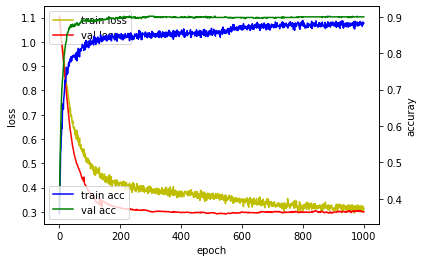

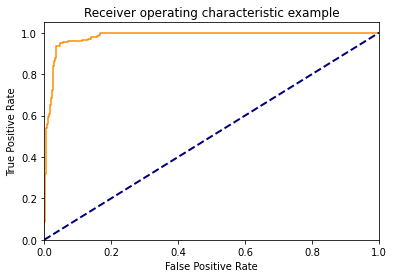


fpr : [0.         0.         0.         0.00215054 0.00215054 0.00430108
 0.00430108 0.00645161 0.00645161 0.00860215 0.00860215 0.01075269
 0.01075269 0.01290323 0.01290323 0.01505376 0.01505376 0.0172043
 0.0172043  0.01935484 0.01935484 0.02150538 0.02150538 0.02365591
 0.02365591 0.02580645 0.02580645 0.02795699 0.02795699 0.03225806
 0.03225806 0.0344086  0.0344086  0.03655914 0.03655914 0.04731183
 0.04731183 0.05591398 0.05591398 0.07096774 0.07096774 0.11397849
 0.11397849 0.1311828  0.1311828  0.13978495 0.13978495 0.15913978
 0.15913978 0.16344086 0.16344086 0.1655914  0.1655914  0.16774194
 0.16774194 0.22150538 0.22580645 0.3827957  0.39139785 0.41075269
 0.41505376 0.51612903 0.52043011 0.6        0.60430108 0.69462366
 0.69892473 0.78064516 0.78494624 0.80215054 0.80645161 1.        ]

tpr : [0.         0.01149425 0.0862069  0.0862069  0.31609195 0.31609195
 0.48850575 0.48850575 0.54022989 0.54022989 0.55747126 0.55747126
 0.59195402 0.59195402 0.59770115 0.59770115 0.6

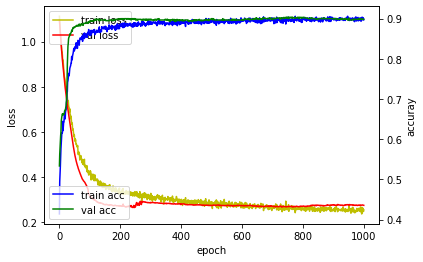

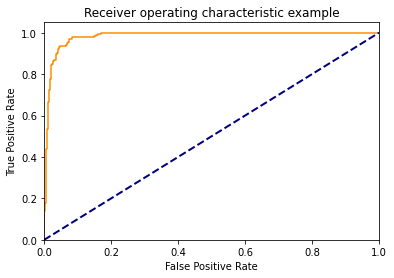


fpr : [0.         0.         0.         0.00215054 0.00215054 0.00430108
 0.00430108 0.00645161 0.00645161 0.00860215 0.00860215 0.01075269
 0.01075269 0.01505376 0.01505376 0.0172043  0.0172043  0.01935484
 0.01935484 0.02150538 0.02150538 0.02365591 0.02365591 0.02580645
 0.02580645 0.03010753 0.03010753 0.0344086  0.0344086  0.03655914
 0.03655914 0.03870968 0.03870968 0.04086022 0.04086022 0.04516129
 0.04516129 0.04731183 0.04731183 0.06451613 0.06451613 0.06666667
 0.06666667 0.07096774 0.07096774 0.07311828 0.07311828 0.07526882
 0.07526882 0.08387097 0.08387097 0.1483871  0.1483871  0.15483871
 0.15483871 0.16129032 0.16129032 0.16989247 0.16989247 0.2172043
 0.22150538 0.23655914 0.24086022 0.46666667 0.47096774 0.55483871
 0.55913978 0.57204301 0.57634409 0.58709677 0.59139785 0.69247312
 0.69677419 0.87741935 0.88172043 0.90752688 0.91182796 0.92043011
 0.92473118 0.93978495 0.94408602 0.98924731 0.99354839 1.        ]

tpr : [0.         0.00574713 0.13793103 0.13793103 0.1

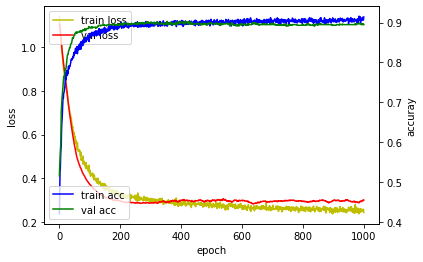

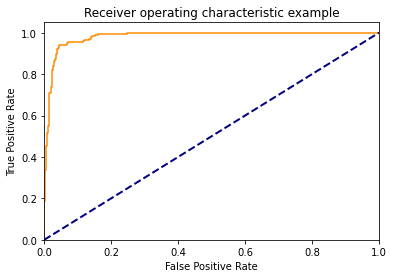


fpr : [0.         0.         0.         0.00215054 0.00215054 0.00430108
 0.00430108 0.00645161 0.00645161 0.00860215 0.00860215 0.01075269
 0.01075269 0.01290323 0.01290323 0.01505376 0.01505376 0.01935484
 0.01935484 0.02150538 0.02150538 0.02365591 0.02365591 0.02580645
 0.02580645 0.02795699 0.02795699 0.03010753 0.03010753 0.03225806
 0.03225806 0.03655914 0.03655914 0.03870968 0.03870968 0.04086022
 0.04086022 0.04301075 0.04301075 0.04516129 0.04516129 0.0688172
 0.0688172  0.07096774 0.07096774 0.11612903 0.11612903 0.11827957
 0.11827957 0.13333333 0.13333333 0.13978495 0.13978495 0.14408602
 0.14408602 0.15268817 0.15268817 0.16129032 0.16129032 0.21935484
 0.22365591 0.24731183 0.24731183 0.4        0.40430108 0.47096774
 0.47526882 0.50322581 0.50752688 0.53548387 0.53978495 0.65806452
 0.66236559 0.6688172  0.67311828 0.7655914  0.76989247 0.80215054
 0.80645161 0.89462366 0.89892473 0.90967742 0.91397849 1.        ]

tpr : [0.         0.00574713 0.18965517 0.18965517 0.3

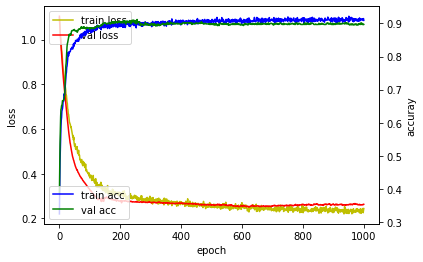

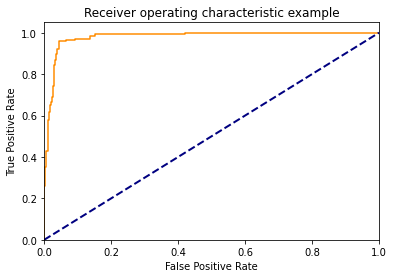


fpr : [0.         0.         0.         0.00215054 0.00215054 0.00430108
 0.00430108 0.00645161 0.00645161 0.01075269 0.01075269 0.01290323
 0.01290323 0.01505376 0.01505376 0.0172043  0.0172043  0.01935484
 0.01935484 0.02365591 0.02365591 0.02580645 0.02580645 0.02795699
 0.02795699 0.03010753 0.03010753 0.03225806 0.03225806 0.0344086
 0.0344086  0.03655914 0.03655914 0.03870968 0.03870968 0.04301075
 0.04301075 0.04516129 0.04516129 0.06451613 0.06451613 0.09247312
 0.09247312 0.13763441 0.13763441 0.15053763 0.15053763 0.15268817
 0.15268817 0.18494624 0.18924731 0.23225806 0.23655914 0.3827957
 0.38709677 0.41935484 0.41935484 0.44946237 0.45376344 0.46236559
 0.46666667 0.53763441 0.54193548 0.55913978 0.56344086 0.73978495
 0.74408602 0.8516129  0.85591398 0.90752688 0.91182796 0.92043011
 0.92473118 0.93763441 0.94193548 1.        ]

tpr : [0.         0.00574713 0.25862069 0.25862069 0.35057471 0.35057471
 0.42528736 0.42528736 0.43103448 0.43103448 0.58045977 0.58045977
 0.5

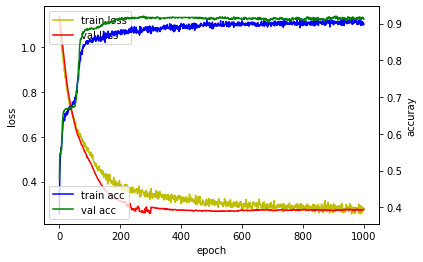

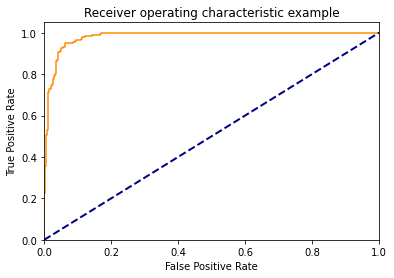


fpr : [0.         0.         0.         0.00215054 0.00215054 0.00430108
 0.00430108 0.00645161 0.00645161 0.00860215 0.00860215 0.01075269
 0.01075269 0.01290323 0.01290323 0.01505376 0.01505376 0.01935484
 0.01935484 0.02365591 0.02365591 0.02580645 0.02580645 0.02795699
 0.02795699 0.03225806 0.03225806 0.0344086  0.0344086  0.03655914
 0.03655914 0.03870968 0.03870968 0.04086022 0.04086022 0.04731183
 0.04731183 0.0516129  0.0516129  0.05591398 0.05591398 0.06236559
 0.06236559 0.08602151 0.08602151 0.09247312 0.09247312 0.09462366
 0.09462366 0.10967742 0.10967742 0.11182796 0.11182796 0.12258065
 0.12258065 0.14408602 0.14408602 0.1655914  0.1655914  0.16989247
 0.16989247 0.20860215 0.21290323 0.25806452 0.26236559 0.27096774
 0.27526882 0.49247312 0.49677419 0.52688172 0.5311828  0.66451613
 0.6688172  0.75483871 0.75913978 0.83225806 0.83655914 0.87311828
 0.87741935 1.        ]

tpr : [0.         0.00574713 0.22413793 0.22413793 0.35632184 0.35632184
 0.45977011 0.45977011 0

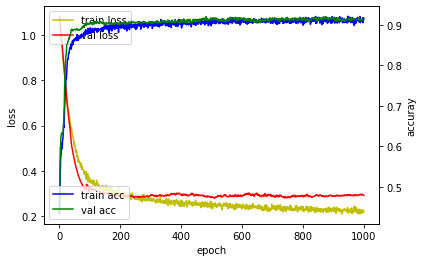

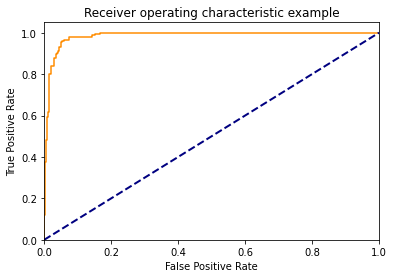


fpr : [0.         0.         0.         0.00215054 0.00215054 0.00430108
 0.00430108 0.00645161 0.00645161 0.00860215 0.00860215 0.01075269
 0.01075269 0.01290323 0.01290323 0.01505376 0.01505376 0.01935484
 0.01935484 0.02150538 0.02150538 0.02795699 0.02795699 0.03010753
 0.03010753 0.0344086  0.0344086  0.03870968 0.03870968 0.04086022
 0.04086022 0.04301075 0.04301075 0.04516129 0.04516129 0.04946237
 0.04946237 0.0516129  0.0516129  0.05376344 0.05376344 0.05806452
 0.05806452 0.07526882 0.07526882 0.14193548 0.14193548 0.14408602
 0.14408602 0.15053763 0.15053763 0.1655914  0.1655914  0.25376344
 0.25806452 0.38494624 0.38924731 0.52903226 0.53333333 0.57419355
 0.57849462 0.59354839 0.59784946 0.61290323 0.6172043  0.64516129
 0.64946237 0.6516129  0.65591398 0.73978495 0.74408602 0.80215054
 0.80645161 0.86666667 0.87096774 1.        ]

tpr : [0.         0.00574713 0.12068966 0.12068966 0.37356322 0.37356322
 0.47701149 0.47701149 0.48275862 0.48275862 0.59195402 0.59195402
 0

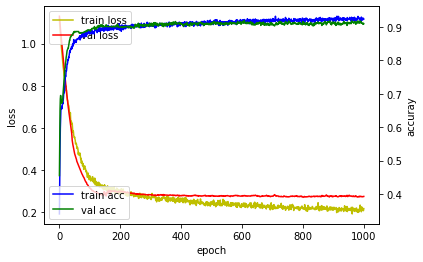

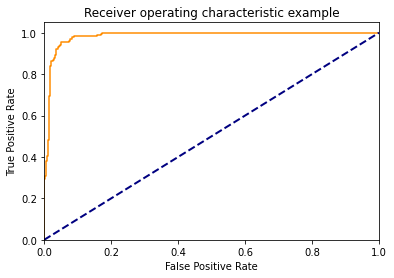


fpr : [0.         0.         0.         0.00215054 0.00215054 0.00430108
 0.00430108 0.00645161 0.00645161 0.00860215 0.00860215 0.01075269
 0.01075269 0.01290323 0.01290323 0.01505376 0.01505376 0.0172043
 0.0172043  0.02150538 0.02150538 0.02580645 0.02580645 0.03010753
 0.03010753 0.03225806 0.03225806 0.0344086  0.0344086  0.03655914
 0.03655914 0.04086022 0.04086022 0.04516129 0.04516129 0.04731183
 0.04731183 0.04946237 0.04946237 0.07311828 0.07311828 0.07741935
 0.07741935 0.08387097 0.08387097 0.09032258 0.09032258 0.15913978
 0.15913978 0.16989247 0.16989247 0.17204301 0.17204301 0.20430108
 0.20860215 0.26021505 0.26451613 0.49032258 0.49462366 0.52688172
 0.5311828  0.6172043  0.62150538 0.64301075 0.64731183 0.75483871
 0.75913978 0.8688172  0.87311828 0.93763441 0.94193548 1.        ]

tpr : [0.         0.00574713 0.29310345 0.29310345 0.31034483 0.31034483
 0.35632184 0.35632184 0.37931034 0.37931034 0.40229885 0.40229885
 0.48275862 0.48275862 0.49425287 0.49425287 0.6

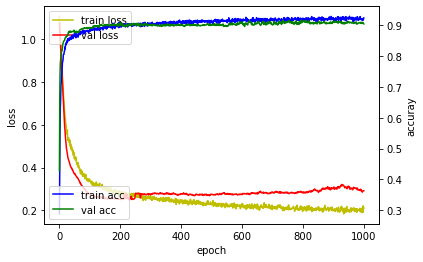

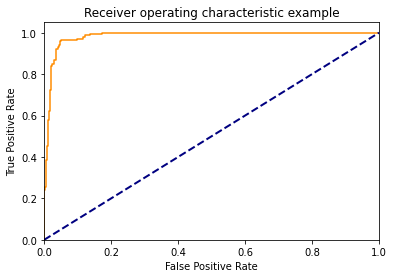


fpr : [0.         0.         0.         0.00215054 0.00215054 0.00430108
 0.00430108 0.00645161 0.00645161 0.00860215 0.00860215 0.01075269
 0.01075269 0.01290323 0.01290323 0.01505376 0.01505376 0.0172043
 0.0172043  0.01935484 0.01935484 0.02150538 0.02150538 0.02365591
 0.02365591 0.02795699 0.02795699 0.03010753 0.03010753 0.0344086
 0.0344086  0.03655914 0.03655914 0.04086022 0.04086022 0.04301075
 0.04301075 0.04516129 0.04516129 0.04731183 0.04731183 0.0516129
 0.0516129  0.09892473 0.09892473 0.11612903 0.11612903 0.12043011
 0.12043011 0.13763441 0.13763441 0.17204301 0.17204301 0.18064516
 0.18494624 0.41505376 0.41935484 0.42150538 0.42580645 0.53548387
 0.53978495 0.60860215 0.61290323 0.69677419 0.70107527 0.76774194
 0.77204301 0.80215054 0.80645161 0.86451613 0.8688172  0.92043011
 0.92473118 0.92688172 0.9311828  0.93333333 0.93763441 0.94408602
 0.9483871  0.97204301 0.97634409 1.        ]

tpr : [0.         0.01149425 0.24137931 0.24137931 0.25287356 0.25287356
 0.27

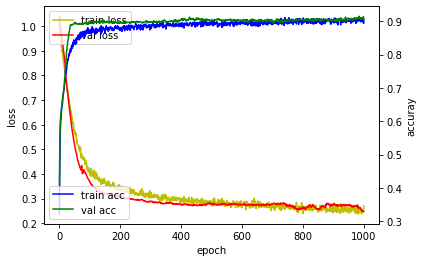

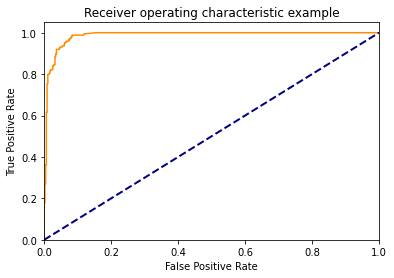


fpr : [0.         0.         0.         0.00215054 0.00215054 0.00430108
 0.00430108 0.00645161 0.00645161 0.00860215 0.00860215 0.01075269
 0.01075269 0.01505376 0.01505376 0.0172043  0.0172043  0.01935484
 0.01935484 0.02580645 0.02580645 0.02795699 0.02795699 0.03225806
 0.03225806 0.0344086  0.0344086  0.03655914 0.03655914 0.04516129
 0.04516129 0.04731183 0.04731183 0.05376344 0.05376344 0.06021505
 0.06021505 0.06236559 0.06236559 0.06666667 0.06666667 0.07311828
 0.07311828 0.07526882 0.07526882 0.07956989 0.07956989 0.08172043
 0.08172043 0.08387097 0.08387097 0.11827957 0.11827957 0.15483871
 0.17419355 0.17849462 0.26666667 0.27096774 0.44086022 0.44516129
 0.47956989 0.48387097 0.49032258 0.49462366 0.51612903 0.52043011
 0.56774194 0.57204301 0.58064516 0.58494624 0.6516129  0.65591398
 0.66236559 0.66666667 0.98924731 0.99354839 1.        ]

tpr : [0.         0.01149425 0.17816092 0.17816092 0.27011494 0.27011494
 0.36206897 0.36206897 0.61494253 0.61494253 0.75287356 0.

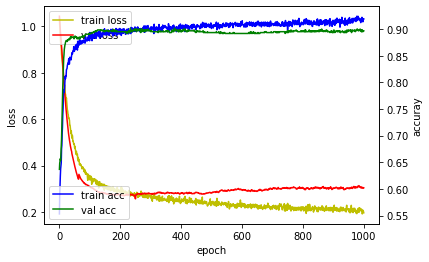

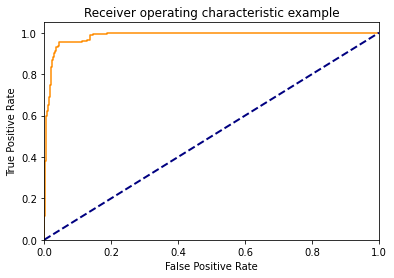


fpr : [0.         0.         0.         0.00215054 0.00215054 0.00430108
 0.00430108 0.00645161 0.00645161 0.00860215 0.00860215 0.01075269
 0.01075269 0.01290323 0.01290323 0.01505376 0.01505376 0.0172043
 0.0172043  0.01935484 0.01935484 0.02150538 0.02150538 0.02365591
 0.02365591 0.02580645 0.02580645 0.03010753 0.03010753 0.03225806
 0.03225806 0.0344086  0.0344086  0.04086022 0.04086022 0.04301075
 0.04301075 0.04516129 0.04516129 0.11397849 0.11397849 0.12903226
 0.12903226 0.13548387 0.13548387 0.14623656 0.14623656 0.18709677
 0.18709677 0.20215054 0.20645161 0.24946237 0.25376344 0.32688172
 0.3311828  0.47526882 0.47956989 0.49677419 0.50107527 0.56989247
 0.57419355 0.6        0.60430108 0.62795699 0.63225806 0.73333333
 0.73763441 0.75913978 0.76344086 0.8172043  0.82150538 0.84301075
 0.84731183 0.84946237 0.85376344 0.86451613 0.8688172  0.93763441
 0.94193548 0.94408602 0.9483871  0.9655914  0.96989247 0.97634409
 0.98064516 1.        ]

tpr : [0.         0.01724138 0.

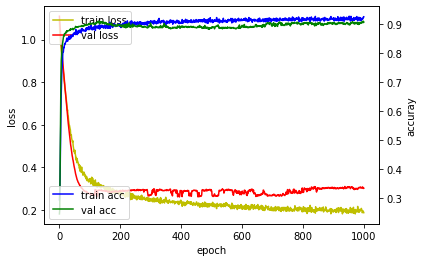

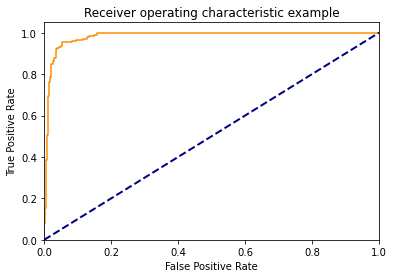


fpr : [0.         0.         0.         0.00215054 0.00215054 0.00430108
 0.00430108 0.00645161 0.00645161 0.00860215 0.00860215 0.01075269
 0.01075269 0.01290323 0.01290323 0.01505376 0.01505376 0.0172043
 0.0172043  0.01935484 0.01935484 0.02150538 0.02150538 0.02580645
 0.02580645 0.02795699 0.02795699 0.03010753 0.03010753 0.03655914
 0.03655914 0.03870968 0.03870968 0.04301075 0.04301075 0.04946237
 0.04946237 0.05376344 0.05376344 0.08387097 0.08387097 0.09462366
 0.09462366 0.11612903 0.11612903 0.12903226 0.12903226 0.13333333
 0.13333333 0.1483871  0.1483871  0.15698925 0.15698925 0.19139785
 0.19569892 0.28817204 0.29247312 0.44086022 0.44516129 0.46666667
 0.47096774 0.49677419 0.50107527 0.6        0.60430108 0.66666667
 0.67096774 0.75053763 0.75483871 0.81075269 0.81505376 0.83225806
 0.83655914 0.84731183 0.8516129  0.89462366 0.89892473 0.90322581
 0.90967742 0.91182796 0.91612903 0.93763441 0.94193548 0.94408602
 0.9483871  0.96344086 0.96989247 0.98494624 0.98924731 

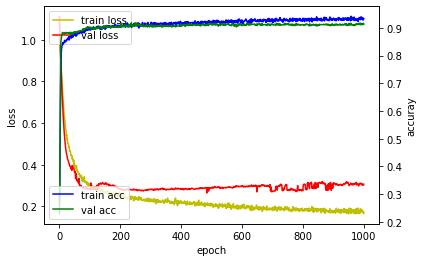

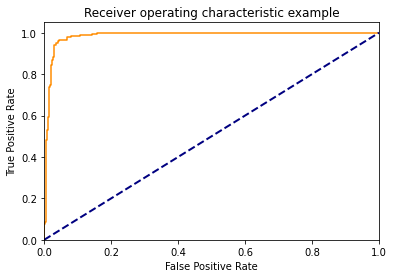


fpr : [0.         0.         0.         0.00215054 0.00215054 0.00430108
 0.00430108 0.00645161 0.00645161 0.00860215 0.00860215 0.01075269
 0.01075269 0.01290323 0.01290323 0.01505376 0.01505376 0.0172043
 0.0172043  0.01935484 0.01935484 0.02365591 0.02365591 0.02580645
 0.02580645 0.02795699 0.02795699 0.03010753 0.03010753 0.0344086
 0.0344086  0.04086022 0.04086022 0.04516129 0.04516129 0.06666667
 0.06666667 0.0688172  0.0688172  0.07956989 0.07956989 0.10752688
 0.10752688 0.14408602 0.14408602 0.15698925 0.15698925 0.25806452
 0.26236559 0.27741935 0.28172043 0.46236559 0.46666667 0.52903226
 0.53333333 0.55913978 0.56344086 0.60645161 0.61075269 0.69677419
 0.70107527 0.7311828  0.73548387 0.7655914  0.76989247 0.79139785
 0.79569892 0.83870968 0.84301075 0.85806452 0.86236559 0.87096774
 0.87526882 0.89892473 0.90322581 0.94193548 0.94623656 0.9483871
 0.95268817 0.99139785 0.99569892 1.        ]

tpr : [0.         0.01149425 0.07471264 0.07471264 0.0862069  0.0862069
 0.419

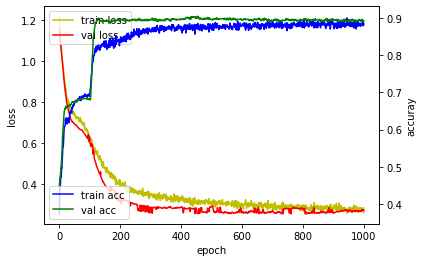

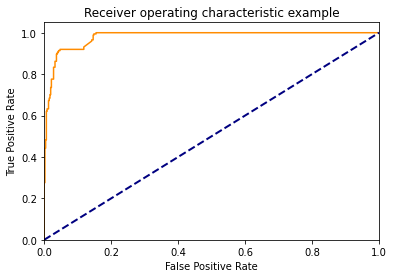


fpr : [0.         0.         0.         0.00215054 0.00215054 0.00430108
 0.00430108 0.00645161 0.00645161 0.00860215 0.00860215 0.01290323
 0.01290323 0.01505376 0.01505376 0.0172043  0.0172043  0.01935484
 0.01935484 0.02150538 0.02150538 0.02795699 0.02795699 0.03225806
 0.03225806 0.03655914 0.03655914 0.03870968 0.03870968 0.04086022
 0.04086022 0.04301075 0.04301075 0.04731183 0.04731183 0.11827957
 0.11827957 0.14193548 0.14193548 0.14623656 0.14623656 0.1483871
 0.1483871  0.15483871 0.15483871 0.20430108 0.20860215 0.36344086
 0.36774194 0.48817204 0.49247312 0.49892473 0.50322581 0.65806452
 0.66236559 0.71612903 0.72043011 0.77634409 0.78064516 0.8172043
 0.82150538 0.83870968 0.84301075 0.88172043 0.88602151 0.94408602
 0.9483871  0.97204301 0.97634409 1.        ]

tpr : [0.         0.02298851 0.27586207 0.27586207 0.44252874 0.44252874
 0.48275862 0.48275862 0.62068966 0.62068966 0.63218391 0.63218391
 0.67241379 0.67241379 0.68390805 0.68390805 0.70114943 0.70114943
 0.7

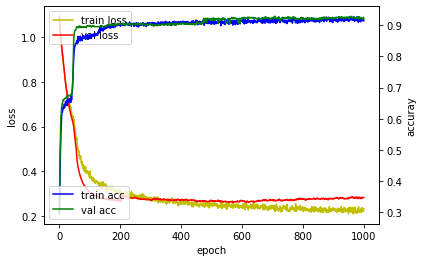

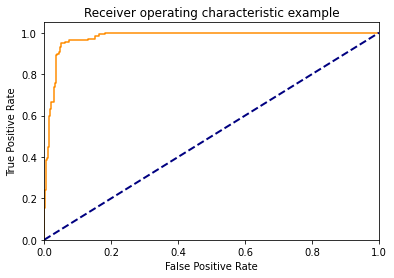


fpr : [0.         0.         0.         0.00215054 0.00215054 0.00430108
 0.00430108 0.00860215 0.00860215 0.01075269 0.01075269 0.01290323
 0.01290323 0.01505376 0.01505376 0.0172043  0.0172043  0.01935484
 0.01935484 0.02150538 0.02150538 0.02795699 0.02795699 0.03010753
 0.03010753 0.03225806 0.03225806 0.0344086  0.0344086  0.03655914
 0.03655914 0.03870968 0.03870968 0.04301075 0.04301075 0.04516129
 0.04516129 0.04731183 0.04731183 0.04946237 0.04946237 0.06236559
 0.06236559 0.07311828 0.07311828 0.12258065 0.1311828  0.1311828
 0.15053763 0.15053763 0.16344086 0.16344086 0.1827957  0.1827957
 0.19784946 0.20215054 0.29677419 0.30107527 0.36129032 0.3655914
 0.50322581 0.50752688 0.52688172 0.5311828  0.71182796 0.71612903
 0.75913978 0.76344086 0.81075269 0.81505376 0.82150538 0.82580645
 0.83010753 0.8344086  0.83870968 0.84731183 0.8688172  0.87311828
 0.88817204 0.89247312 0.89677419 0.90107527 0.90752688 0.91182796
 0.91827957 0.92688172 0.93548387 0.93763441 0.94193548 0.

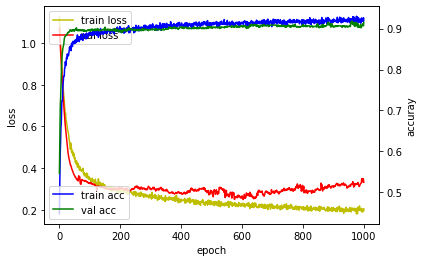

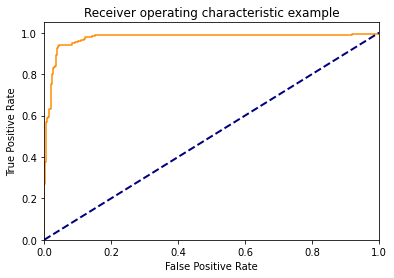


fpr : [0.         0.         0.         0.00215054 0.00215054 0.00645161
 0.00645161 0.00860215 0.00860215 0.01075269 0.01075269 0.01290323
 0.01290323 0.01505376 0.01505376 0.01935484 0.01935484 0.02150538
 0.02150538 0.02365591 0.02365591 0.02580645 0.02580645 0.03010753
 0.03010753 0.03225806 0.03225806 0.0344086  0.0344086  0.03870968
 0.03870968 0.04086022 0.04086022 0.04301075 0.04301075 0.08387097
 0.08387097 0.09247312 0.09247312 0.10107527 0.10107527 0.10967742
 0.10967742 0.11827957 0.11827957 0.12258065 0.12258065 0.14408602
 0.14408602 0.15268817 0.15268817 0.19784946 0.20215054 0.23655914
 0.24086022 0.41505376 0.41935484 0.48817204 0.49247312 0.59569892
 0.6        0.72903226 0.73763441 0.79784946 0.80645161 0.8688172
 0.87311828 0.90322581 0.90752688 0.92043011 0.92043011 0.96989247
 0.97419355 1.         1.        ]

tpr : [0.         0.00574713 0.27011494 0.27011494 0.37356322 0.37356322
 0.56896552 0.56896552 0.5862069  0.5862069  0.59195402 0.59195402
 0.6091954  0.

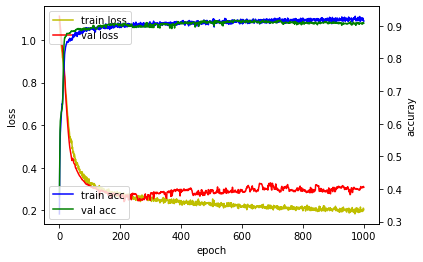

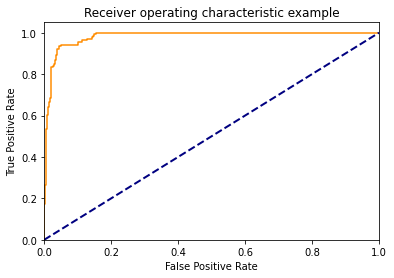


fpr : [0.         0.         0.         0.00215054 0.00215054 0.00430108
 0.00430108 0.00645161 0.00645161 0.00860215 0.00860215 0.01075269
 0.01075269 0.01290323 0.01290323 0.01505376 0.01505376 0.0172043
 0.0172043  0.01935484 0.01935484 0.02150538 0.02150538 0.02580645
 0.02580645 0.02795699 0.02795699 0.03225806 0.03225806 0.0344086
 0.0344086  0.03655914 0.03655914 0.03870968 0.03870968 0.04301075
 0.04301075 0.04516129 0.04516129 0.0516129  0.0516129  0.05591398
 0.09677419 0.10107527 0.10107527 0.11397849 0.11397849 0.12903226
 0.12903226 0.14193548 0.14193548 0.14623656 0.14623656 0.1483871
 0.1483871  0.15483871 0.15483871 0.23010753 0.2344086  0.31827957
 0.32258065 0.43010753 0.4344086  0.46666667 0.47096774 0.63010753
 0.6344086  0.68602151 0.69032258 0.69677419 0.70107527 0.84946237
 0.85376344 0.90107527 0.90537634 0.98064516 0.98494624 1.        ]

tpr : [0.         0.01724138 0.17241379 0.17241379 0.26436782 0.26436782
 0.41954023 0.41954023 0.53448276 0.53448276 0.603

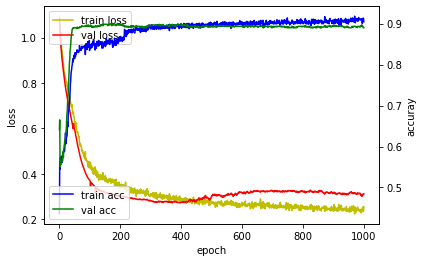

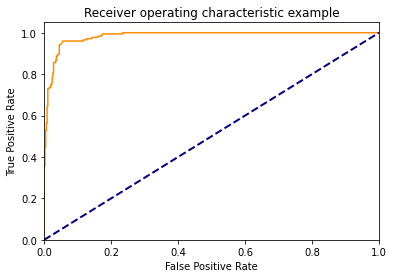


fpr : [0.         0.         0.         0.00215054 0.00215054 0.00430108
 0.00430108 0.00645161 0.00645161 0.00860215 0.00860215 0.01075269
 0.01075269 0.01505376 0.01505376 0.01935484 0.01935484 0.02150538
 0.02150538 0.02365591 0.02365591 0.02580645 0.02580645 0.02795699
 0.02795699 0.0344086  0.0344086  0.03655914 0.03655914 0.03870968
 0.03870968 0.04086022 0.04086022 0.04516129 0.04516129 0.04946237
 0.05591398 0.11612903 0.11612903 0.12688172 0.12688172 0.14193548
 0.14193548 0.15913978 0.15913978 0.16989247 0.16989247 0.17419355
 0.17419355 0.21075269 0.21505376 0.2344086  0.2344086  0.30752688
 0.31182796 0.47526882 0.47956989 0.59354839 0.59784946 0.61075269
 0.61505376 0.63010753 0.6344086  0.6688172  0.67311828 0.74408602
 0.7483871  0.78494624 0.78924731 0.80860215 0.81290323 0.83225806
 0.83655914 0.84731183 0.85591398 0.86021505 0.86451613 0.87526882
 0.88387097 0.88602151 0.89462366 0.89677419 0.90107527 0.90537634
 0.91612903 0.92043011 0.92903226 0.94193548 0.94408602

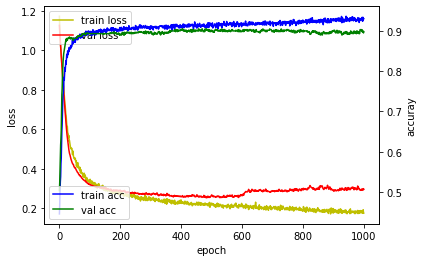

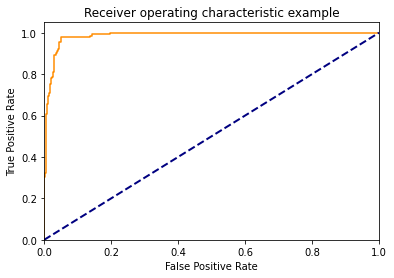


fpr : [0.         0.         0.         0.00215054 0.00215054 0.00430108
 0.00430108 0.00645161 0.00645161 0.00860215 0.00860215 0.01075269
 0.01075269 0.01290323 0.01290323 0.0172043  0.0172043  0.01935484
 0.01935484 0.02150538 0.02150538 0.02365591 0.02365591 0.02580645
 0.02580645 0.02795699 0.02795699 0.03010753 0.03010753 0.0344086
 0.0344086  0.03655914 0.03655914 0.03870968 0.03870968 0.04086022
 0.04086022 0.04516129 0.04516129 0.0516129  0.0516129  0.13548387
 0.13548387 0.14193548 0.14193548 0.19784946 0.19784946 0.24946237
 0.25376344 0.32043011 0.32473118 0.4        0.40430108 0.44946237
 0.45376344 0.49462366 0.49892473 0.52903226 0.53333333 0.54623656
 0.55053763 0.56344086 0.56774194 0.5827957  0.58709677 0.60860215
 0.61290323 0.61505376 0.62150538 0.62580645 0.63010753 0.67096774
 0.67526882 0.70107527 0.70752688 0.71827957 0.72258065 0.72903226
 0.73333333 0.73548387 0.74193548 0.75053763 0.75913978 0.77419355
 0.77849462 0.78924731 0.79354839 0.81290323 0.83010753 

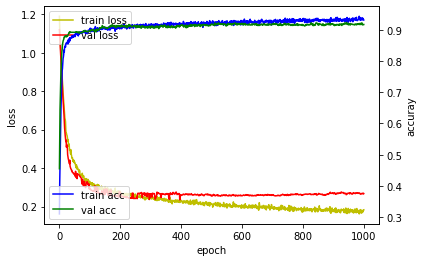

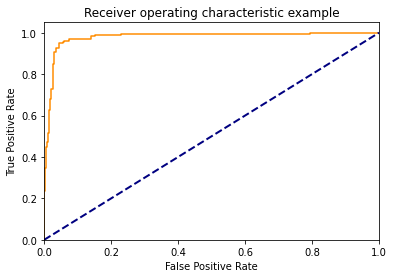


fpr : [0.         0.         0.         0.00215054 0.00215054 0.00430108
 0.00430108 0.00645161 0.00645161 0.00860215 0.00860215 0.01075269
 0.01075269 0.01290323 0.01290323 0.01505376 0.01505376 0.0172043
 0.0172043  0.01935484 0.01935484 0.02150538 0.02150538 0.02580645
 0.02580645 0.02795699 0.02795699 0.03010753 0.03010753 0.0344086
 0.0344086  0.03655914 0.03655914 0.04301075 0.04301075 0.04516129
 0.04516129 0.05591398 0.05591398 0.06021505 0.06021505 0.07311828
 0.07311828 0.07526882 0.07526882 0.13978495 0.13978495 0.15053763
 0.15053763 0.1827957  0.18709677 0.23010753 0.23010753 0.23225806
 0.23655914 0.28172043 0.28602151 0.51827957 0.52258065 0.53548387
 0.53978495 0.6344086  0.63870968 0.70322581 0.70752688 0.71397849
 0.71827957 0.79354839 0.79354839 0.83870968 0.84301075 0.86236559
 0.86666667 0.87096774 0.87741935 0.89462366 0.89892473 0.91182796
 0.91612903 0.92688172 0.9311828  0.93333333 0.93978495 0.95053763
 0.95913978 0.96129032 0.9655914  0.96989247 0.97419355 0

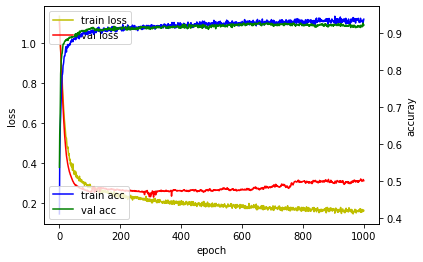

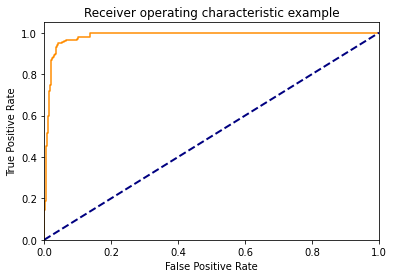


fpr : [0.         0.         0.         0.00215054 0.00215054 0.00430108
 0.00430108 0.00645161 0.00645161 0.00860215 0.00860215 0.01075269
 0.01075269 0.01290323 0.01290323 0.01505376 0.01505376 0.0172043
 0.0172043  0.01935484 0.01935484 0.02150538 0.02150538 0.02365591
 0.02365591 0.02580645 0.02580645 0.02795699 0.02795699 0.03225806
 0.03225806 0.0344086  0.0344086  0.03870968 0.03870968 0.04086022
 0.04086022 0.05376344 0.05376344 0.06021505 0.06021505 0.06451613
 0.06451613 0.09677419 0.09677419 0.10107527 0.10107527 0.13548387
 0.13548387 0.13763441 0.13763441 0.2        0.20430108 0.27526882
 0.27956989 0.3483871  0.35268817 0.49462366 0.49892473 0.55913978
 0.56344086 0.62150538 0.62580645 0.63225806 0.63655914 0.63870968
 0.64301075 0.6516129  0.66021505 0.67096774 0.67526882 0.68172043
 0.68602151 0.76774194 0.77419355 0.78709677 0.79139785 0.79569892
 0.8        0.81290323 0.8172043  0.82365591 0.82795699 0.8344086
 0.83870968 0.85591398 0.86021505 0.86236559 0.86666667 0

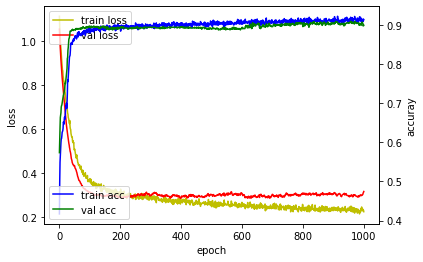

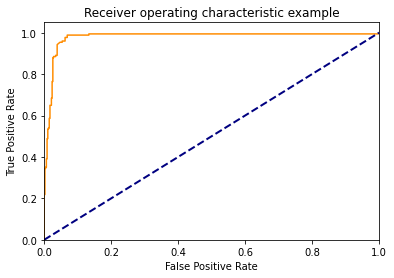


fpr : [0.         0.         0.         0.00215054 0.00215054 0.00430108
 0.00430108 0.00645161 0.00645161 0.00860215 0.00860215 0.01075269
 0.01075269 0.01290323 0.01290323 0.01505376 0.01505376 0.0172043
 0.0172043  0.02150538 0.02150538 0.02365591 0.02365591 0.02580645
 0.02580645 0.02795699 0.02795699 0.0344086  0.0344086  0.03870968
 0.03870968 0.04731183 0.05376344 0.05376344 0.06236559 0.06236559
 0.0688172  0.0688172  0.13333333 0.13333333 0.20215054 0.20645161
 0.2172043  0.22150538 0.42580645 0.43010753 0.54193548 0.54623656
 0.5655914  0.56989247 0.6172043  0.62150538 0.76989247 0.77634409
 0.78064516 0.78494624 0.79784946 0.80215054 0.80645161 0.81075269
 0.81290323 0.81935484 0.82365591 0.82795699 0.83010753 0.83655914
 0.84086022 0.84301075 0.84731183 0.85806452 0.86236559 0.86451613
 0.8688172  0.87311828 0.89247312 0.89892473 0.90537634 0.90752688
 0.91182796 0.92043011 0.93763441 0.95053763 0.95483871 0.95698925
 0.97204301 0.97634409 0.98064516 0.98709677 0.98924731 

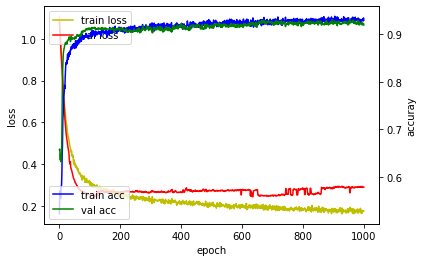

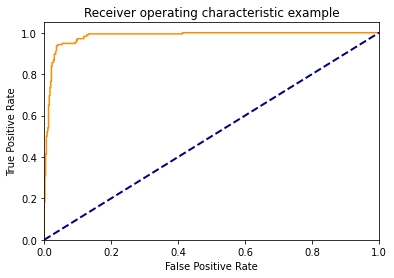


fpr : [0.         0.         0.         0.00215054 0.00215054 0.00430108
 0.00430108 0.00645161 0.00645161 0.00860215 0.00860215 0.01075269
 0.01075269 0.01290323 0.01290323 0.01505376 0.01505376 0.0172043
 0.0172043  0.01935484 0.01935484 0.02150538 0.02150538 0.02365591
 0.02365591 0.02795699 0.02795699 0.03010753 0.03010753 0.0344086
 0.0344086  0.03655914 0.03655914 0.04086022 0.04086022 0.05376344
 0.05376344 0.09247312 0.09247312 0.09677419 0.09677419 0.09892473
 0.09892473 0.11827957 0.11827957 0.12688172 0.12688172 0.1311828
 0.1311828  0.21075269 0.21505376 0.28817204 0.29247312 0.36344086
 0.36774194 0.41290323 0.41290323 0.44946237 0.45376344 0.57634409
 0.58064516 0.58494624 0.58924731 0.60860215 0.61290323 0.6344086
 0.63870968 0.64731183 0.6516129  0.67956989 0.68387097 0.69892473
 0.70537634 0.70967742 0.71612903 0.71827957 0.72258065 0.72473118
 0.72903226 0.73333333 0.74623656 0.75698925 0.76129032 0.7655914
 0.76989247 0.77419355 0.78064516 0.78924731 0.79139785 0.8


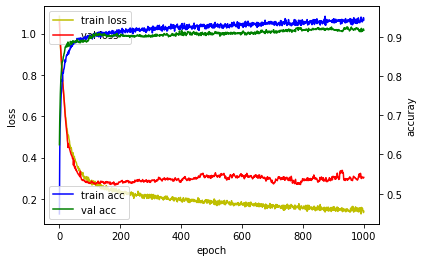

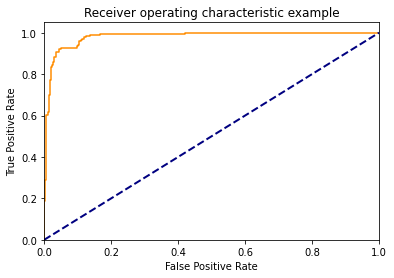


fpr : [0.         0.         0.         0.         0.00215054 0.00215054
 0.00430108 0.00430108 0.00645161 0.00645161 0.01075269 0.01075269
 0.01290323 0.01290323 0.01505376 0.01505376 0.0172043  0.0172043
 0.01935484 0.01935484 0.02150538 0.02150538 0.02365591 0.02365591
 0.02580645 0.02580645 0.02795699 0.02795699 0.03010753 0.03010753
 0.0344086  0.0344086  0.03655914 0.03655914 0.04516129 0.04516129
 0.04946237 0.04946237 0.09892473 0.09892473 0.10107527 0.10107527
 0.10537634 0.10537634 0.10967742 0.10967742 0.11182796 0.11182796
 0.11827957 0.11827957 0.12473118 0.12473118 0.13548387 0.13548387
 0.16774194 0.16774194 0.22795699 0.23225806 0.29247312 0.29677419
 0.4        0.40430108 0.41935484 0.41935484 0.50967742 0.51397849
 0.52688172 0.5311828  0.56774194 0.57204301 0.60645161 0.61505376
 0.62580645 0.63010753 0.64301075 0.6516129  0.67096774 0.67956989
 0.73763441 0.74193548 0.74623656 0.75053763 0.77204301 0.77634409
 0.78064516 0.79354839 0.8        0.80860215 0.81075269 

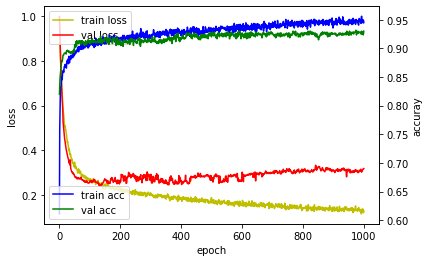

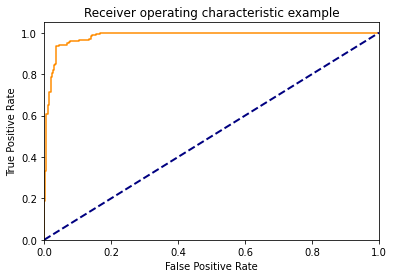


fpr : [0.         0.         0.         0.00215054 0.00215054 0.00430108
 0.00430108 0.00645161 0.00645161 0.01075269 0.01075269 0.01505376
 0.01505376 0.01935484 0.01935484 0.02150538 0.02150538 0.02365591
 0.02365591 0.02580645 0.02580645 0.02795699 0.02795699 0.03225806
 0.03225806 0.0344086  0.0344086  0.03655914 0.03655914 0.04516129
 0.04516129 0.06666667 0.06666667 0.07526882 0.07526882 0.07741935
 0.07741935 0.10322581 0.10322581 0.13333333 0.13333333 0.13978495
 0.13978495 0.14193548 0.14193548 0.15483871 0.15483871 0.16774194
 0.16774194 0.20860215 0.21290323 0.31397849 0.31827957 0.42365591
 0.42795699 0.44086022 0.44516129 0.49032258 0.49462366 0.50752688
 0.51182796 0.54193548 0.54623656 0.62150538 0.62580645 0.63225806
 0.63655914 0.68387097 0.68817204 0.71182796 0.72043011 0.75913978
 0.76344086 0.8        0.80430108 0.80645161 0.81075269 0.81505376
 0.81935484 0.82795699 0.8344086  0.83870968 0.84301075 0.8516129
 0.86666667 0.87311828 0.88387097 0.89247312 0.89677419 

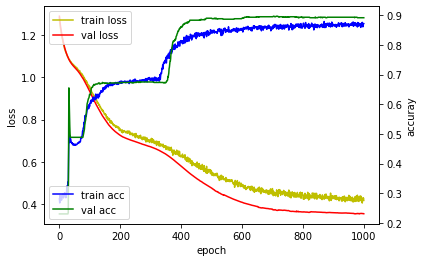

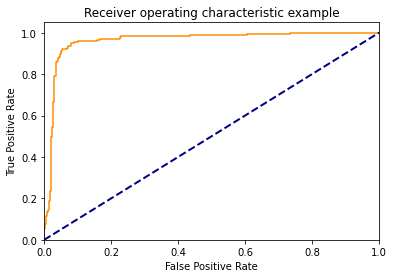


fpr : [0.         0.         0.         0.00215054 0.00215054 0.00430108
 0.00430108 0.00860215 0.00860215 0.01075269 0.01075269 0.01290323
 0.01290323 0.01505376 0.01505376 0.0172043  0.0172043  0.01935484
 0.01935484 0.02150538 0.02150538 0.02365591 0.02365591 0.02580645
 0.02580645 0.03010753 0.03010753 0.0344086  0.0344086  0.03655914
 0.03655914 0.03870968 0.03870968 0.04086022 0.04086022 0.04516129
 0.04516129 0.04731183 0.04731183 0.04946237 0.04946237 0.0516129
 0.0516129  0.05376344 0.05376344 0.0688172  0.0688172  0.07096774
 0.07096774 0.07956989 0.07956989 0.08817204 0.08817204 0.10107527
 0.10107527 0.10537634 0.15698925 0.15698925 0.1655914  0.1655914
 0.22580645 0.22580645 0.23010753 0.23010753 0.29032258 0.29462366
 0.4344086  0.4344086  0.49032258 0.49462366 0.51827957 0.52258065
 0.57419355 0.57849462 0.60645161 0.60645161 0.64301075 0.64731183
 0.69032258 0.69462366 0.73548387 0.73548387 0.77849462 0.7827957
 0.79354839 0.79784946 0.81290323 0.8172043  0.82150538 0.

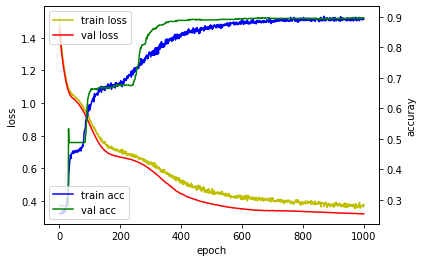

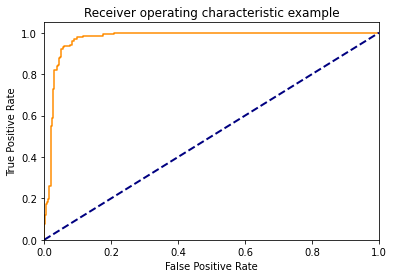


fpr : [0.         0.         0.         0.00215054 0.00215054 0.00430108
 0.00430108 0.00645161 0.00645161 0.00860215 0.00860215 0.01075269
 0.01075269 0.01290323 0.01290323 0.01505376 0.01505376 0.01935484
 0.01935484 0.02150538 0.02150538 0.02365591 0.02365591 0.02580645
 0.02580645 0.02795699 0.02795699 0.03010753 0.03010753 0.03870968
 0.03870968 0.04086022 0.04086022 0.04301075 0.04301075 0.04516129
 0.04516129 0.04731183 0.04731183 0.04946237 0.04946237 0.0516129
 0.0516129  0.05591398 0.05591398 0.05806452 0.05806452 0.07741935
 0.07741935 0.08387097 0.08387097 0.09032258 0.09032258 0.09677419
 0.09677419 0.09892473 0.10322581 0.11612903 0.11612903 0.17419355
 0.17419355 0.17634409 0.17634409 0.20860215 0.20860215 0.26236559
 0.26666667 0.40430108 0.40860215 0.4172043  0.42150538 0.60645161
 0.61075269 0.6516129  0.65591398 0.68387097 0.68817204 0.76774194
 0.77204301 0.78709677 0.79139785 0.83870968 0.84301075 1.        ]

tpr : [0.         0.00574713 0.07471264 0.07471264 0.1

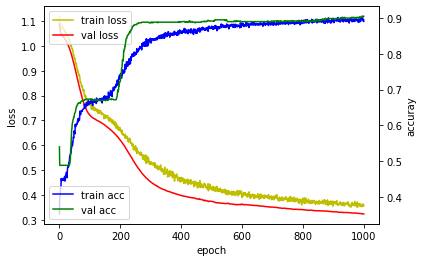

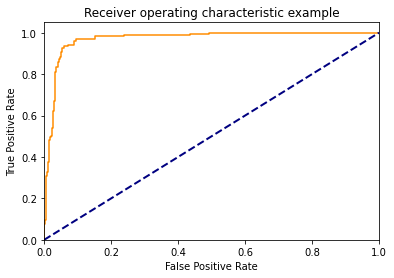


fpr : [0.         0.         0.         0.00215054 0.00215054 0.00430108
 0.00430108 0.00645161 0.00645161 0.00860215 0.00860215 0.01075269
 0.01075269 0.01290323 0.01290323 0.01505376 0.01505376 0.0172043
 0.0172043  0.02150538 0.02150538 0.02365591 0.02365591 0.02580645
 0.02580645 0.02795699 0.02795699 0.03010753 0.03010753 0.03225806
 0.03225806 0.03655914 0.03655914 0.04086022 0.04086022 0.04301075
 0.04301075 0.04516129 0.04516129 0.04731183 0.04731183 0.04946237
 0.04946237 0.0516129  0.0516129  0.05376344 0.05376344 0.05806452
 0.05806452 0.07096774 0.07096774 0.08817204 0.08817204 0.09032258
 0.09032258 0.09462366 0.09462366 0.15268817 0.15268817 0.23870968
 0.23870968 0.28817204 0.29247312 0.38064516 0.38494624 0.40430108
 0.40860215 0.43655914 0.43655914 0.45806452 0.46236559 0.49247312
 0.49247312 0.64516129 0.64946237 0.65806452 0.66236559 0.67956989
 0.68387097 0.82580645 0.83010753 0.85591398 0.86021505 0.86666667
 0.87096774 1.        ]

tpr : [0.         0.00574713 0.

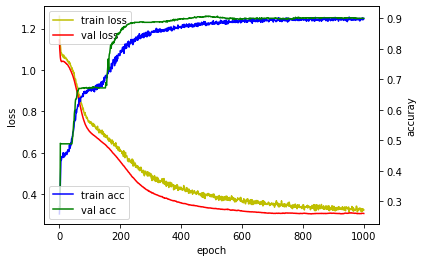

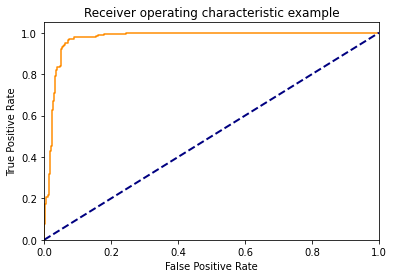


fpr : [0.         0.         0.         0.00215054 0.00215054 0.00645161
 0.00645161 0.01075269 0.01075269 0.01290323 0.01290323 0.01505376
 0.01505376 0.0172043  0.0172043  0.01935484 0.01935484 0.02365591
 0.02365591 0.02580645 0.02580645 0.02795699 0.02795699 0.03010753
 0.03010753 0.03225806 0.03225806 0.0344086  0.0344086  0.03655914
 0.03655914 0.03870968 0.03870968 0.04731183 0.04731183 0.04946237
 0.04946237 0.0516129  0.0516129  0.05376344 0.05376344 0.05591398
 0.05591398 0.05806452 0.05806452 0.06236559 0.06236559 0.07096774
 0.07096774 0.07526882 0.07526882 0.08817204 0.08817204 0.15483871
 0.15483871 0.16129032 0.16129032 0.17849462 0.17849462 0.18709677
 0.19139785 0.23010753 0.2344086  0.24516129 0.24516129 0.41935484
 0.42365591 0.42580645 0.43010753 0.6516129  0.65591398 0.70107527
 0.70537634 0.8        0.80430108 0.80645161 0.81075269 0.89247312
 0.89677419 0.98064516 0.98494624 1.        ]

tpr : [0.         0.00574713 0.07471264 0.07471264 0.17241379 0.17241379
 0

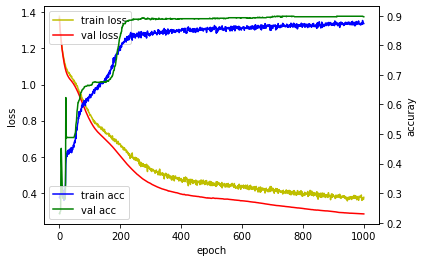

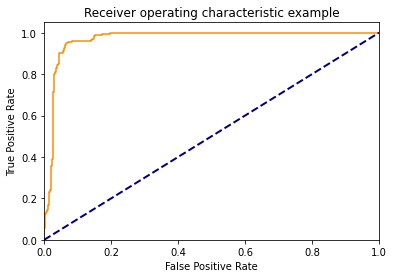


fpr : [0.         0.         0.         0.00215054 0.00215054 0.00430108
 0.00430108 0.00860215 0.00860215 0.01075269 0.01075269 0.01290323
 0.01290323 0.01505376 0.01505376 0.0172043  0.0172043  0.01935484
 0.01935484 0.02150538 0.02150538 0.02365591 0.02365591 0.02580645
 0.02580645 0.02795699 0.02795699 0.03010753 0.03010753 0.03225806
 0.03225806 0.0344086  0.0344086  0.03870968 0.03870968 0.04086022
 0.04086022 0.04301075 0.04301075 0.04516129 0.04516129 0.05591398
 0.05591398 0.05806452 0.05806452 0.06236559 0.06236559 0.06451613
 0.06451613 0.07096774 0.07096774 0.08387097 0.08387097 0.13978495
 0.13978495 0.14193548 0.14193548 0.1483871  0.1483871  0.15053763
 0.15053763 0.17204301 0.17204301 0.19569892 0.19569892 0.2172043
 0.22150538 0.28817204 0.29247312 0.42365591 0.43225806 0.44516129
 0.44946237 0.55268817 0.55698925 0.76129032 0.7655914  0.95483871
 0.95913978 0.96344086 0.96774194 1.        ]

tpr : [0.         0.00574713 0.05747126 0.05747126 0.12643678 0.12643678
 0.

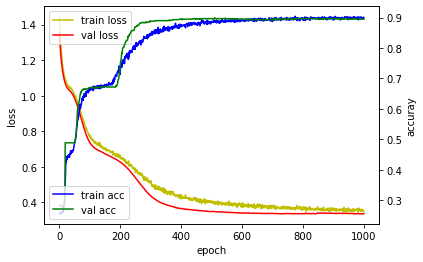

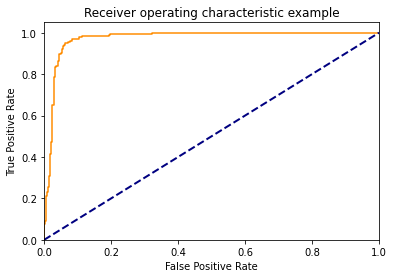


fpr : [0.         0.         0.         0.00215054 0.00215054 0.00430108
 0.00430108 0.00645161 0.00645161 0.00860215 0.00860215 0.01075269
 0.01075269 0.01290323 0.01290323 0.01505376 0.01505376 0.0172043
 0.0172043  0.02150538 0.02150538 0.02365591 0.02365591 0.02365591
 0.02365591 0.02795699 0.02795699 0.03010753 0.03010753 0.03225806
 0.03225806 0.03655914 0.03655914 0.04086022 0.04086022 0.04301075
 0.04301075 0.04516129 0.04516129 0.0516129  0.0516129  0.05376344
 0.05376344 0.05591398 0.05591398 0.06021505 0.06021505 0.06236559
 0.06236559 0.07096774 0.07096774 0.07741935 0.07741935 0.08172043
 0.08172043 0.08387097 0.08387097 0.10322581 0.10322581 0.10752688
 0.11397849 0.11397849 0.19354839 0.19354839 0.19569892 0.19569892
 0.32258065 0.32258065 0.34623656 0.35483871 0.45806452 0.46236559
 0.65591398 0.66021505 0.68602151 0.69032258 0.79784946 0.80215054
 0.81075269 0.81505376 0.90107527 0.90537634 1.        ]

tpr : [0.         0.00574713 0.07471264 0.07471264 0.09195402 0.0

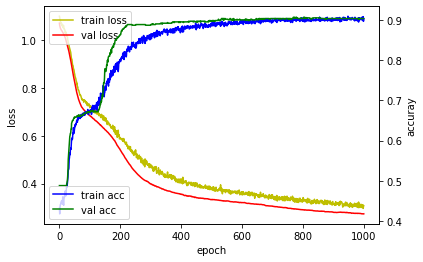

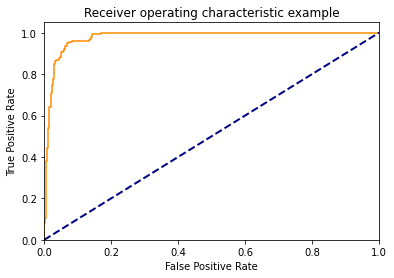


fpr : [0.         0.         0.         0.00215054 0.00215054 0.00430108
 0.00430108 0.00645161 0.00645161 0.00860215 0.00860215 0.01075269
 0.01075269 0.01290323 0.01290323 0.01505376 0.01505376 0.01935484
 0.01935484 0.02150538 0.02150538 0.02365591 0.02365591 0.02580645
 0.02580645 0.02795699 0.02795699 0.03010753 0.03010753 0.03225806
 0.03225806 0.0344086  0.0344086  0.04301075 0.04301075 0.04731183
 0.04731183 0.04946237 0.04946237 0.05591398 0.05591398 0.06021505
 0.06021505 0.06236559 0.06236559 0.0688172  0.0688172  0.07311828
 0.07311828 0.08172043 0.08172043 0.13333333 0.13333333 0.13548387
 0.13548387 0.13978495 0.13978495 0.14193548 0.14193548 0.14408602
 0.14408602 0.16989247 0.16989247 0.17634409 0.18064516 0.19354839
 0.19784946 0.39354839 0.39784946 0.45376344 0.45806452 0.63010753
 0.6344086  0.67956989 0.68387097 0.82795699 0.83225806 0.8688172
 0.87311828 0.88817204 0.89247312 1.        ]

tpr : [0.         0.00574713 0.08045977 0.08045977 0.10344828 0.10344828
 0.

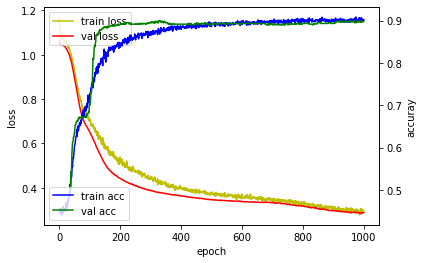

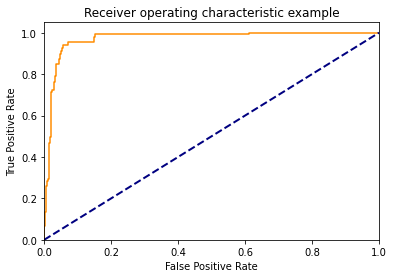


fpr : [0.         0.         0.         0.00215054 0.00215054 0.00430108
 0.00430108 0.00645161 0.00645161 0.00860215 0.00860215 0.01075269
 0.01075269 0.01290323 0.01290323 0.01505376 0.01505376 0.0172043
 0.0172043  0.01935484 0.01935484 0.02150538 0.02150538 0.02365591
 0.02365591 0.02795699 0.02795699 0.03010753 0.03010753 0.03225806
 0.03225806 0.0344086  0.0344086  0.03655914 0.03655914 0.04301075
 0.04301075 0.04731183 0.04731183 0.04946237 0.04946237 0.0516129
 0.0516129  0.05376344 0.05376344 0.05591398 0.05591398 0.07096774
 0.07096774 0.1483871  0.1483871  0.15053763 0.15053763 0.18924731
 0.19354839 0.22150538 0.22580645 0.44086022 0.44516129 0.49892473
 0.50322581 0.61075269 0.61075269 0.61505376 0.7311828  0.73548387
 0.7655914  0.76989247 0.80430108 0.80860215 0.90322581 0.90752688
 1.        ]

tpr : [0.         0.00574713 0.06896552 0.06896552 0.13218391 0.13218391
 0.17241379 0.17241379 0.25862069 0.25862069 0.2816092  0.2816092
 0.29310345 0.29310345 0.41954023 0.41

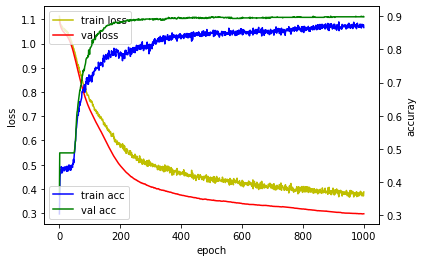

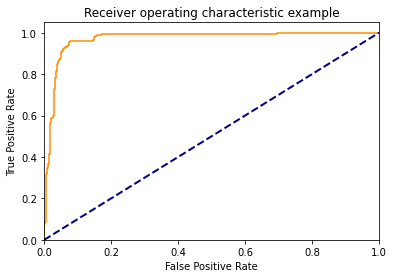


fpr : [0.         0.         0.         0.00215054 0.00215054 0.00430108
 0.00430108 0.00645161 0.00645161 0.00860215 0.00860215 0.01075269
 0.01075269 0.01290323 0.01290323 0.01505376 0.01505376 0.0172043
 0.0172043  0.01935484 0.01935484 0.02150538 0.02150538 0.02580645
 0.02580645 0.02795699 0.02795699 0.03225806 0.03225806 0.0344086
 0.0344086  0.03655914 0.03655914 0.03870968 0.03870968 0.04086022
 0.04086022 0.04516129 0.04516129 0.04946237 0.04946237 0.0516129
 0.0516129  0.05376344 0.05376344 0.05591398 0.05591398 0.05806452
 0.05806452 0.06236559 0.06236559 0.06666667 0.06666667 0.07096774
 0.07096774 0.07311828 0.07311828 0.07741935 0.07741935 0.14623656
 0.14623656 0.1483871  0.1483871  0.15268817 0.15268817 0.15698925
 0.15698925 0.17204301 0.17204301 0.18709677 0.19139785 0.22150538
 0.22580645 0.41075269 0.41505376 0.49462366 0.49892473 0.60215054
 0.60645161 0.67741935 0.68172043 0.69677419 0.69677419 0.78064516
 0.78494624 0.84946237 0.85376344 0.9311828  0.93548387 1.

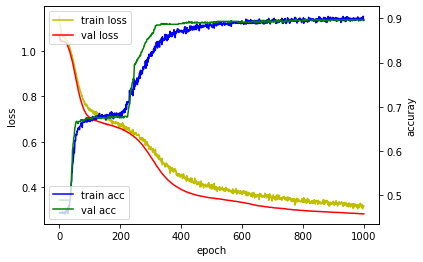

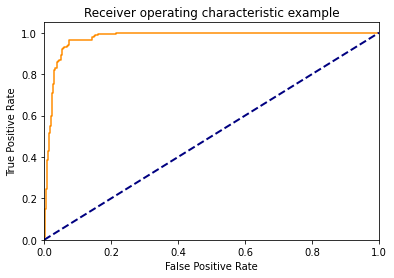


fpr : [0.         0.         0.         0.00215054 0.00215054 0.00430108
 0.00430108 0.00645161 0.00645161 0.00860215 0.00860215 0.01075269
 0.01075269 0.01290323 0.01290323 0.01505376 0.01505376 0.0172043
 0.0172043  0.01935484 0.01935484 0.02150538 0.02150538 0.02365591
 0.02365591 0.02580645 0.02580645 0.02795699 0.02795699 0.03010753
 0.03010753 0.03225806 0.03225806 0.03870968 0.03870968 0.04086022
 0.04086022 0.04301075 0.04301075 0.04946237 0.04946237 0.0516129
 0.0516129  0.05376344 0.05376344 0.05591398 0.05591398 0.05806452
 0.05806452 0.0688172  0.0688172  0.07096774 0.07096774 0.07311828
 0.07311828 0.14408602 0.14408602 0.1483871  0.1483871  0.15268817
 0.15268817 0.16129032 0.16129032 0.18494624 0.18924731 0.21505376
 0.21505376 0.24946237 0.25376344 0.41290323 0.4172043  0.49032258
 0.49462366 0.51397849 0.51827957 0.57849462 0.5827957  0.67311828
 0.67741935 0.75913978 0.76344086 0.79139785 0.79569892 0.89677419
 0.90107527 1.        ]

tpr : [0.         0.00574713 0.0

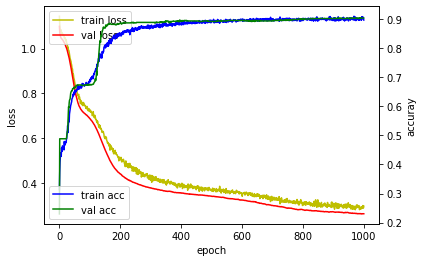

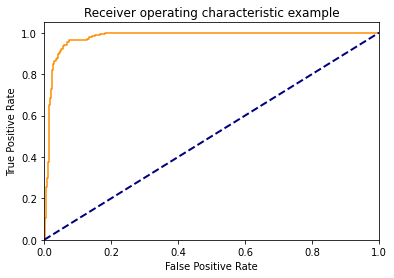


fpr : [0.         0.00215054 0.00215054 0.00430108 0.00430108 0.00645161
 0.00645161 0.00860215 0.00860215 0.01075269 0.01075269 0.01290323
 0.01290323 0.01505376 0.01505376 0.0172043  0.0172043  0.01935484
 0.01935484 0.02365591 0.02365591 0.02580645 0.02580645 0.02795699
 0.02795699 0.0344086  0.0344086  0.03870968 0.03870968 0.04086022
 0.04086022 0.04516129 0.04516129 0.04731183 0.04731183 0.0516129
 0.0516129  0.05591398 0.05591398 0.06021505 0.06021505 0.06666667
 0.06666667 0.07311828 0.07311828 0.07526882 0.07526882 0.12688172
 0.12688172 0.13333333 0.13333333 0.14193548 0.14193548 0.15053763
 0.15053763 0.16774194 0.16774194 0.1827957  0.1827957  0.20645161
 0.21075269 0.23870968 0.24301075 0.35053763 0.35483871 0.44086022
 0.44516129 0.51827957 0.52258065 0.57634409 0.58064516 0.73763441
 0.74193548 0.77634409 0.78064516 0.79354839 0.79784946 0.87741935
 0.88172043 1.        ]

tpr : [0.         0.         0.10344828 0.10344828 0.20689655 0.20689655
 0.25287356 0.25287356 0.

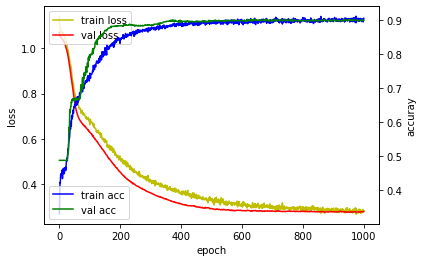

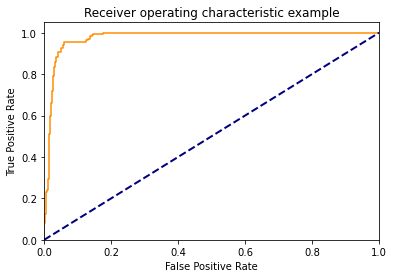


fpr : [0.         0.         0.         0.00215054 0.00215054 0.00430108
 0.00430108 0.00645161 0.00645161 0.00860215 0.00860215 0.01075269
 0.01075269 0.01290323 0.01290323 0.01505376 0.01505376 0.0172043
 0.0172043  0.01935484 0.01935484 0.02150538 0.02150538 0.02365591
 0.02365591 0.02580645 0.02580645 0.03010753 0.03010753 0.03225806
 0.03225806 0.0344086  0.0344086  0.03655914 0.03655914 0.04086022
 0.04086022 0.04946237 0.04946237 0.05591398 0.05591398 0.05806452
 0.05806452 0.12473118 0.12473118 0.1311828  0.1311828  0.13548387
 0.13548387 0.13763441 0.13763441 0.14408602 0.14408602 0.14623656
 0.14623656 0.17419355 0.17419355 0.19569892 0.2        0.23010753
 0.2344086  0.45806452 0.46451613 0.59354839 0.59784946 0.69677419
 0.70107527 0.74193548 0.74623656 0.77634409 0.78064516 0.78494624
 0.78924731 0.88172043 0.88602151 1.        ]

tpr : [0.         0.00574713 0.08045977 0.08045977 0.12643678 0.12643678
 0.18390805 0.18390805 0.22988506 0.22988506 0.24137931 0.24137931
 0.

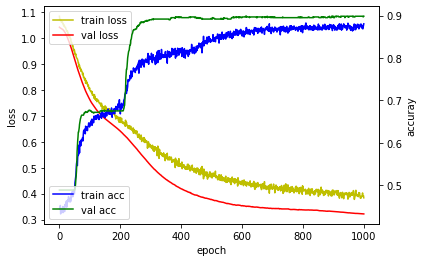

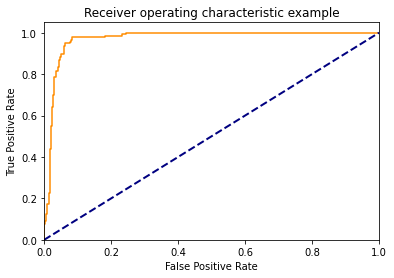


fpr : [0.         0.         0.         0.00215054 0.00215054 0.00430108
 0.00430108 0.00860215 0.00860215 0.01290323 0.01290323 0.01505376
 0.01505376 0.0172043  0.0172043  0.0172043  0.0172043  0.01935484
 0.01935484 0.02150538 0.02150538 0.02365591 0.02365591 0.02580645
 0.02580645 0.02795699 0.02795699 0.03010753 0.03010753 0.0344086
 0.0344086  0.03655914 0.03655914 0.04086022 0.04086022 0.04301075
 0.04301075 0.04516129 0.04516129 0.04731183 0.04731183 0.04946237
 0.04946237 0.05806452 0.05806452 0.06021505 0.06021505 0.06236559
 0.06236559 0.07741935 0.07741935 0.07956989 0.07956989 0.08172043
 0.08172043 0.08387097 0.08387097 0.10967742 0.11397849 0.18064516
 0.18064516 0.23225806 0.23225806 0.24301075 0.24301075 0.27956989
 0.28387097 0.39139785 0.39569892 0.46236559 0.46666667 0.55268817
 0.55698925 0.69247312 0.69677419 0.78709677 0.79139785 0.8
 0.80430108 0.84086022 0.84516129 1.        ]

tpr : [0.         0.00574713 0.07471264 0.07471264 0.09195402 0.09195402
 0.1264367

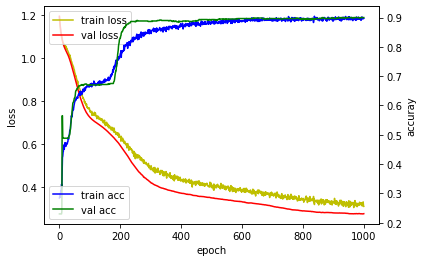

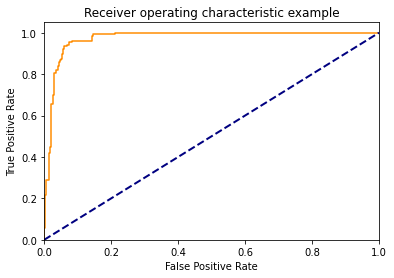


fpr : [0.         0.         0.         0.00215054 0.00215054 0.00430108
 0.00430108 0.01290323 0.01290323 0.01505376 0.01505376 0.0172043
 0.0172043  0.01935484 0.01935484 0.02150538 0.02150538 0.02580645
 0.02580645 0.02795699 0.02795699 0.03010753 0.03010753 0.0344086
 0.0344086  0.03655914 0.03655914 0.04086022 0.04086022 0.04301075
 0.04301075 0.04516129 0.04516129 0.04731183 0.04731183 0.04946237
 0.04946237 0.05376344 0.05376344 0.05591398 0.05591398 0.05806452
 0.05806452 0.06021505 0.06021505 0.0688172  0.0688172  0.07311828
 0.07311828 0.07526882 0.07526882 0.08387097 0.08387097 0.14408602
 0.14408602 0.14623656 0.14623656 0.18924731 0.19354839 0.21075269
 0.21075269 0.21290323 0.2172043  0.43870968 0.44301075 0.57849462
 0.5827957  0.58709677 0.59139785 0.63655914 0.64086022 0.77849462
 0.7827957  0.80860215 0.81290323 0.89247312 0.89677419 1.        ]

tpr : [0.         0.00574713 0.05747126 0.05747126 0.2183908  0.2183908
 0.28735632 0.28735632 0.31034483 0.31034483 0.419

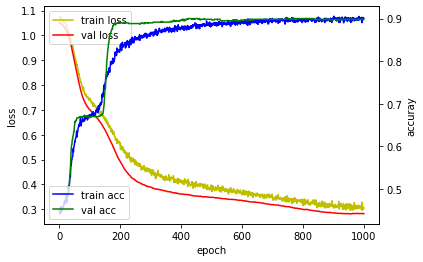

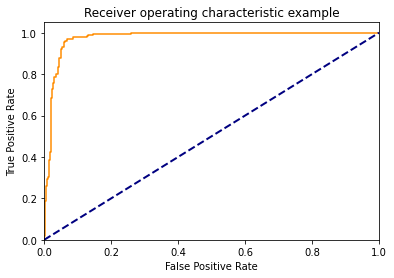


fpr : [0.         0.         0.         0.00215054 0.00215054 0.00430108
 0.00430108 0.00645161 0.00645161 0.00860215 0.00860215 0.01075269
 0.01075269 0.01290323 0.01290323 0.01505376 0.01505376 0.0172043
 0.0172043  0.01935484 0.01935484 0.02150538 0.02150538 0.02365591
 0.02365591 0.02580645 0.02580645 0.02795699 0.02795699 0.03010753
 0.03010753 0.03655914 0.03655914 0.04086022 0.04086022 0.04301075
 0.04301075 0.04946237 0.04946237 0.0516129  0.0516129  0.05376344
 0.05376344 0.05806452 0.05806452 0.06236559 0.06236559 0.06666667
 0.06666667 0.0688172  0.0688172  0.08602151 0.08602151 0.12903226
 0.12903226 0.1311828  0.1311828  0.14623656 0.14623656 0.19139785
 0.19569892 0.21505376 0.21935484 0.26021505 0.26021505 0.46451613
 0.4688172  0.48387097 0.48817204 0.49462366 0.49892473 0.68172043
 0.68602151 0.69892473 0.70322581 0.76344086 0.76774194 0.78709677
 0.79139785 0.89247312 0.89677419 0.93548387 0.93978495 0.97849462
 0.9827957  1.        ]

tpr : [0.         0.00574713 0.

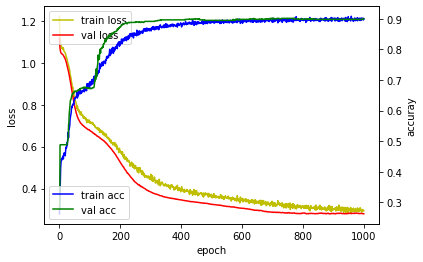

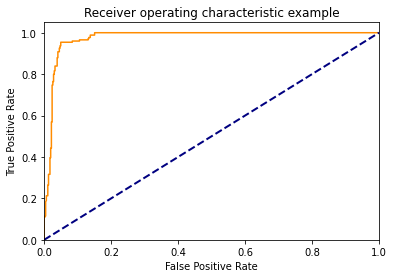


fpr : [0.         0.         0.         0.00215054 0.00215054 0.00430108
 0.00430108 0.00645161 0.00645161 0.01075269 0.01075269 0.01290323
 0.01290323 0.0172043  0.0172043  0.01935484 0.01935484 0.02150538
 0.02150538 0.02365591 0.02365591 0.02580645 0.02580645 0.02795699
 0.02795699 0.03010753 0.03010753 0.03225806 0.03225806 0.03870968
 0.03870968 0.04086022 0.04086022 0.04516129 0.04516129 0.04731183
 0.04731183 0.04946237 0.04946237 0.08387097 0.08387097 0.10537634
 0.10537634 0.1311828  0.1311828  0.13333333 0.13333333 0.13763441
 0.13763441 0.15053763 0.15053763 0.17849462 0.1827957  0.2172043
 0.22150538 0.47096774 0.47526882 0.52903226 0.53333333 0.66451613
 0.6688172  0.68602151 0.69032258 0.76774194 0.77204301 0.77849462
 0.7827957  0.86021505 0.86451613 0.98494624 0.98924731 1.        ]

tpr : [0.         0.00574713 0.1091954  0.1091954  0.11494253 0.11494253
 0.18390805 0.18965517 0.21264368 0.21264368 0.26436782 0.26436782
 0.31609195 0.31609195 0.39655172 0.39655172 0.4

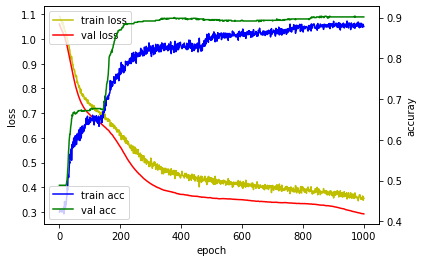

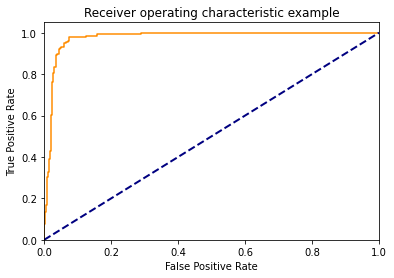


fpr : [0.         0.         0.         0.00215054 0.00215054 0.00430108
 0.00430108 0.00645161 0.00645161 0.00860215 0.00860215 0.01075269
 0.01075269 0.01290323 0.01290323 0.01505376 0.01505376 0.0172043
 0.0172043  0.01935484 0.01935484 0.02150538 0.02150538 0.02365591
 0.02365591 0.02580645 0.02580645 0.02795699 0.02795699 0.03010753
 0.03010753 0.0344086  0.0344086  0.03655914 0.03655914 0.03870968
 0.03870968 0.04301075 0.04301075 0.04731183 0.04731183 0.04946237
 0.04946237 0.05806452 0.05806452 0.06021505 0.06021505 0.06451613
 0.06451613 0.07096774 0.07096774 0.07311828 0.07311828 0.12473118
 0.12473118 0.15698925 0.15698925 0.15913978 0.15913978 0.19569892
 0.2        0.25591398 0.26021505 0.29032258 0.29032258 0.44946237
 0.45376344 0.47311828 0.47741935 0.6        0.60430108 0.69462366
 0.69892473 0.78709677 0.79139785 0.79354839 0.79784946 0.90537634
 0.90967742 1.        ]

tpr : [0.         0.00574713 0.07471264 0.07471264 0.13218391 0.13218391
 0.14942529 0.14942529 0.

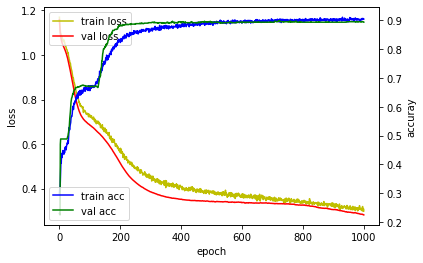

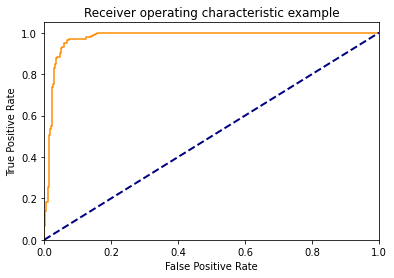


fpr : [0.         0.         0.         0.00215054 0.00215054 0.00430108
 0.00430108 0.00645161 0.00645161 0.01075269 0.01075269 0.01290323
 0.01290323 0.01505376 0.01505376 0.0172043  0.0172043  0.01935484
 0.01935484 0.02150538 0.02150538 0.02365591 0.02365591 0.02580645
 0.02580645 0.02795699 0.02795699 0.03010753 0.03010753 0.03225806
 0.03225806 0.03655914 0.03655914 0.03870968 0.03870968 0.04731183
 0.04731183 0.04946237 0.04946237 0.0516129  0.0516129  0.05376344
 0.05376344 0.06021505 0.06021505 0.06666667 0.06666667 0.0688172
 0.0688172  0.07311828 0.07311828 0.12473118 0.12473118 0.13978495
 0.13978495 0.14623656 0.14623656 0.15268817 0.15268817 0.15913978
 0.15913978 0.22150538 0.22580645 0.23010753 0.2344086  0.41505376
 0.41935484 0.51182796 0.51612903 0.66021505 0.66451613 0.71182796
 0.71612903 0.77204301 0.77634409 0.79784946 0.80215054 0.85591398
 0.86021505 1.        ]

tpr : [0.         0.00574713 0.06896552 0.06896552 0.13793103 0.13793103
 0.14367816 0.14367816 0.

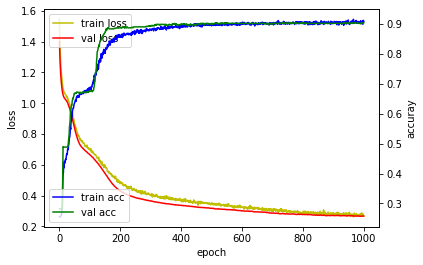

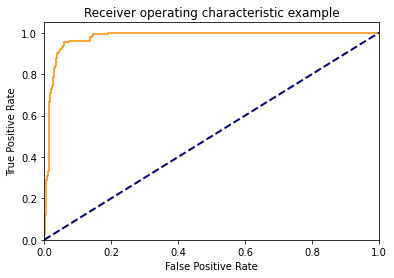


fpr : [0.         0.         0.         0.00215054 0.00215054 0.00430108
 0.00430108 0.00645161 0.00645161 0.00860215 0.00860215 0.01075269
 0.01075269 0.01290323 0.01290323 0.01505376 0.01505376 0.0172043
 0.0172043  0.01935484 0.01935484 0.02150538 0.02150538 0.02365591
 0.02365591 0.02580645 0.02580645 0.02795699 0.02795699 0.03010753
 0.03010753 0.03225806 0.03225806 0.0344086  0.0344086  0.03655914
 0.03655914 0.03870968 0.03870968 0.04301075 0.04301075 0.04731183
 0.04731183 0.05376344 0.05376344 0.05591398 0.05591398 0.05806452
 0.05806452 0.07526882 0.07526882 0.13548387 0.13548387 0.13763441
 0.13763441 0.14408602 0.14408602 0.14623656 0.14623656 0.17849462
 0.1827957  0.19139785 0.19139785 0.23010753 0.2344086  0.36344086
 0.36774194 0.40215054 0.40645161 0.48817204 0.49247312 0.64086022
 0.64516129 0.66021505 0.66451613 0.75698925 0.76129032 0.83225806
 0.83655914 0.8688172  0.87311828 1.        ]

tpr : [0.         0.00574713 0.02298851 0.02298851 0.12068966 0.12068966
 0.

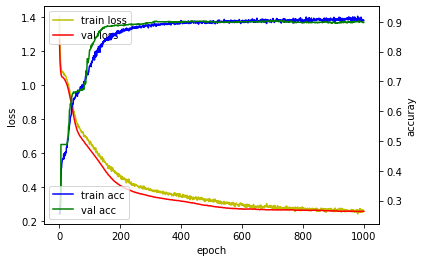

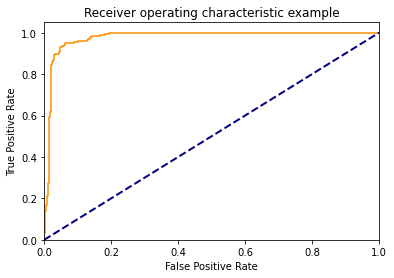


fpr : [0.         0.         0.         0.00215054 0.00215054 0.00430108
 0.00430108 0.00645161 0.00645161 0.00860215 0.00860215 0.01075269
 0.01075269 0.01290323 0.01290323 0.01505376 0.01505376 0.0172043
 0.0172043  0.01935484 0.01935484 0.02150538 0.02150538 0.02365591
 0.02365591 0.02580645 0.02580645 0.02795699 0.02795699 0.03010753
 0.03010753 0.03225806 0.03225806 0.04301075 0.04301075 0.04731183
 0.04731183 0.05376344 0.05376344 0.05806452 0.05806452 0.06236559
 0.06236559 0.08817204 0.08817204 0.10107527 0.10107527 0.12688172
 0.12688172 0.1311828  0.1311828  0.13763441 0.13763441 0.14408602
 0.14408602 0.16774194 0.16774194 0.17849462 0.1827957  0.1827957
 0.19354839 0.19354839 0.19784946 0.20215054 0.39354839 0.39784946
 0.49032258 0.49462366 0.6516129  0.65591398 0.67311828 0.67741935
 0.69892473 0.70322581 0.72258065 0.72688172 0.80215054 0.80645161
 0.8688172  0.87311828 0.92043011 0.92473118 1.        ]

tpr : [0.         0.00574713 0.03448276 0.03448276 0.13793103 0.13

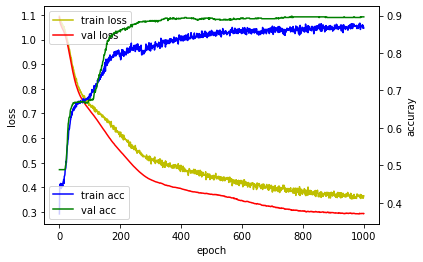

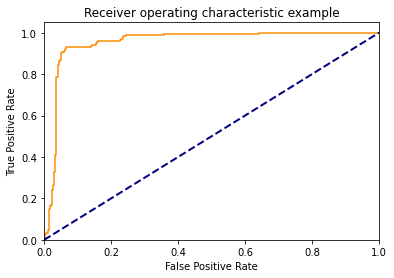


fpr : [0.         0.00215054 0.00215054 0.00430108 0.00430108 0.01075269
 0.01075269 0.01290323 0.01290323 0.01505376 0.01505376 0.0172043
 0.0172043  0.02150538 0.02150538 0.02365591 0.02365591 0.02580645
 0.02580645 0.02795699 0.02795699 0.03010753 0.03010753 0.03225806
 0.03225806 0.0344086  0.0344086  0.03655914 0.03655914 0.04086022
 0.04086022 0.04516129 0.04516129 0.04731183 0.04731183 0.04946237
 0.04946237 0.0516129  0.0516129  0.05376344 0.05376344 0.05806452
 0.05806452 0.06236559 0.06236559 0.06451613 0.06451613 0.13978495
 0.13978495 0.14193548 0.14193548 0.15483871 0.15483871 0.15913978
 0.15913978 0.16129032 0.16129032 0.18924731 0.19354839 0.22580645
 0.22580645 0.22795699 0.22795699 0.23655914 0.23655914 0.24301075
 0.24301075 0.32473118 0.32903226 0.35698925 0.35698925 0.38709677
 0.39139785 0.42795699 0.43225806 0.50752688 0.51182796 0.63655914
 0.64086022 0.64086022 0.70537634 0.70967742 0.76344086 0.76774194
 0.80215054 0.80645161 0.84301075 0.84731183 1.        ]

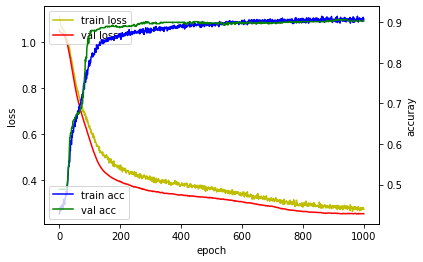

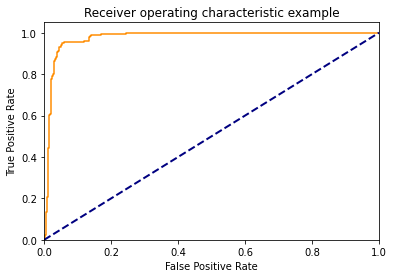


fpr : [0.         0.00215054 0.00215054 0.00430108 0.00430108 0.00645161
 0.00645161 0.00860215 0.00860215 0.01075269 0.01075269 0.01505376
 0.01505376 0.0172043  0.0172043  0.01935484 0.01935484 0.02150538
 0.02150538 0.02365591 0.02365591 0.02580645 0.02580645 0.02795699
 0.02795699 0.03010753 0.03010753 0.03225806 0.03225806 0.0344086
 0.0344086  0.03870968 0.03870968 0.04086022 0.04086022 0.04516129
 0.04516129 0.04946237 0.04946237 0.0516129  0.0516129  0.05376344
 0.05376344 0.06021505 0.06021505 0.11827957 0.11827957 0.13333333
 0.13333333 0.13548387 0.13548387 0.13978495 0.13978495 0.16989247
 0.16989247 0.18709677 0.19139785 0.20645161 0.21075269 0.24301075
 0.24301075 0.4516129  0.45591398 0.48602151 0.49032258 0.61505376
 0.61935484 0.73333333 0.73763441 0.75913978 0.76344086 0.80860215
 0.81290323 0.84731183 0.8516129  0.85806452 0.86236559 0.95698925
 0.96129032 1.        ]

tpr : [0.         0.         0.02298851 0.02298851 0.09195402 0.09195402
 0.13218391 0.13218391 0.

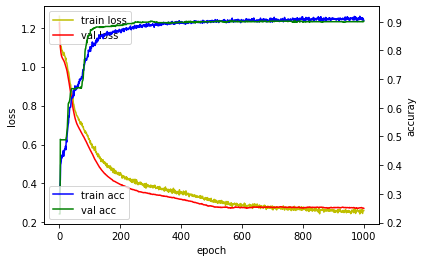

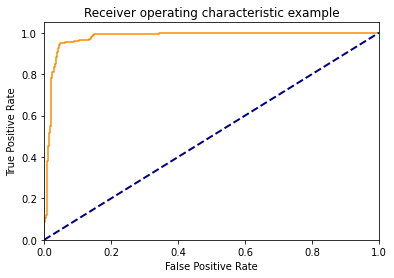


fpr : [0.         0.         0.         0.00215054 0.00215054 0.00645161
 0.00645161 0.00860215 0.00860215 0.01075269 0.01075269 0.01505376
 0.01505376 0.0172043  0.0172043  0.01935484 0.01935484 0.02150538
 0.02150538 0.02365591 0.02365591 0.02795699 0.02795699 0.03010753
 0.03010753 0.03225806 0.03225806 0.0344086  0.0344086  0.03655914
 0.03655914 0.03870968 0.03870968 0.04086022 0.04086022 0.04516129
 0.04516129 0.04731183 0.04731183 0.06236559 0.06236559 0.08817204
 0.08817204 0.10322581 0.10322581 0.13333333 0.13333333 0.13978495
 0.13978495 0.14408602 0.14408602 0.14623656 0.14623656 0.1483871
 0.1483871  0.18924731 0.19354839 0.23655914 0.24086022 0.34408602
 0.34408602 0.50322581 0.51182796 0.51612903 0.52043011 0.61290323
 0.6172043  0.68817204 0.69247312 0.71612903 0.72043011 0.79354839
 0.79784946 0.8516129  0.85591398 0.9311828  0.93548387 1.        ]

tpr : [0.         0.00574713 0.0862069  0.0862069  0.10344828 0.10344828
 0.12068966 0.12068966 0.37931034 0.37931034 0.4

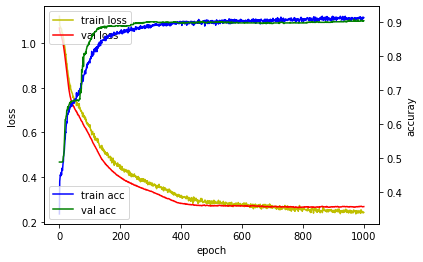

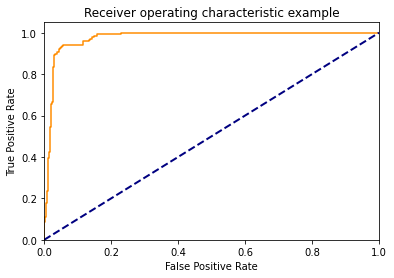


fpr : [0.         0.         0.         0.00215054 0.00215054 0.00430108
 0.00430108 0.00645161 0.00645161 0.00860215 0.00860215 0.01075269
 0.01075269 0.01290323 0.01290323 0.01505376 0.01505376 0.0172043
 0.0172043  0.01935484 0.01935484 0.02150538 0.02150538 0.02365591
 0.02365591 0.02580645 0.02580645 0.02795699 0.02795699 0.03010753
 0.03010753 0.03225806 0.03225806 0.03870968 0.03870968 0.04301075
 0.04301075 0.04516129 0.04516129 0.04731183 0.04731183 0.04946237
 0.04946237 0.05376344 0.05376344 0.05591398 0.05591398 0.11612903
 0.11612903 0.13333333 0.13333333 0.13763441 0.13763441 0.14193548
 0.14193548 0.1483871  0.1483871  0.15698925 0.15698925 0.20430108
 0.20860215 0.22795699 0.22795699 0.23225806 0.49247312 0.49677419
 0.50537634 0.50967742 0.57204301 0.57634409 0.64516129 0.64946237
 0.65591398 0.66021505 0.74193548 0.74623656 0.80215054 0.80645161
 0.86666667 0.87096774 0.91827957 0.92258065 1.        ]

tpr : [0.         0.00574713 0.0862069  0.0862069  0.1091954  0.1

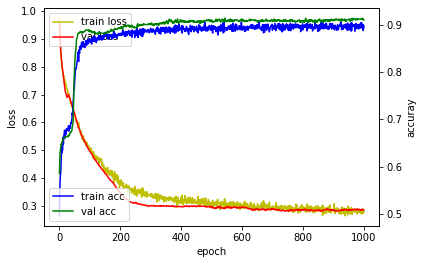

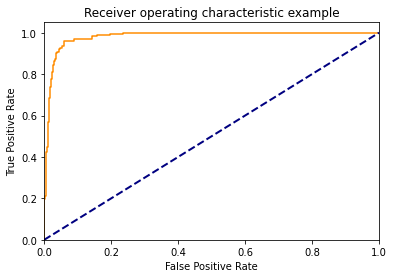


fpr : [0.         0.         0.         0.00215054 0.00215054 0.00430108
 0.00430108 0.00645161 0.00645161 0.00860215 0.00860215 0.01075269
 0.01075269 0.01290323 0.01290323 0.01505376 0.01505376 0.0172043
 0.0172043  0.01935484 0.01935484 0.02150538 0.02150538 0.02365591
 0.02365591 0.02580645 0.02580645 0.03010753 0.03010753 0.03225806
 0.03225806 0.0344086  0.0344086  0.03655914 0.03655914 0.03870968
 0.03870968 0.04301075 0.04301075 0.04516129 0.04516129 0.04731183
 0.04731183 0.05376344 0.05376344 0.05806452 0.05806452 0.09032258
 0.09032258 0.14193548 0.14193548 0.14408602 0.14408602 0.15913978
 0.15913978 0.19784946 0.19784946 0.2344086  0.2344086  0.24086022
 0.24516129 0.33548387 0.33978495 0.44731183 0.4516129  0.49032258
 0.49462366 0.52043011 0.52473118 0.71397849 0.71827957 0.81290323
 0.8172043  0.84516129 0.84946237 0.8516129  0.85591398 1.        ]

tpr : [0.         0.00574713 0.1954023  0.1954023  0.21264368 0.21264368
 0.36206897 0.36206897 0.42528736 0.42528736 0.4

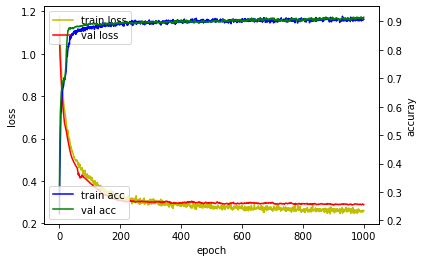

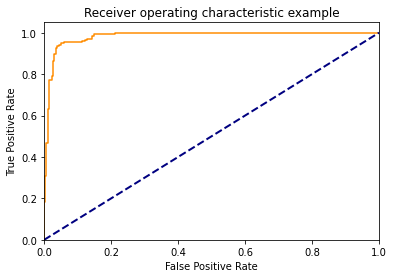


fpr : [0.         0.         0.         0.00215054 0.00215054 0.00430108
 0.00430108 0.00645161 0.00645161 0.01075269 0.01075269 0.01290323
 0.01290323 0.01505376 0.01505376 0.02365591 0.02365591 0.02580645
 0.02580645 0.02795699 0.02795699 0.03010753 0.03010753 0.0344086
 0.0344086  0.03870968 0.03870968 0.04516129 0.04516129 0.04946237
 0.04946237 0.05806452 0.05806452 0.11397849 0.11397849 0.12258065
 0.12258065 0.12903226 0.12903226 0.14193548 0.14193548 0.14408602
 0.14408602 0.1483871  0.1483871  0.21075269 0.21075269 0.21505376
 0.21935484 0.23655914 0.24086022 0.50537634 0.50967742 0.53333333
 0.53763441 0.5655914  0.56989247 0.57634409 0.58064516 0.74193548
 0.74623656 0.82795699 0.83225806 0.87311828 0.87741935 0.96774194
 0.97204301 1.        ]

tpr : [0.         0.00574713 0.18390805 0.18390805 0.31034483 0.31034483
 0.43678161 0.43678161 0.46551724 0.46551724 0.63218391 0.63218391
 0.72413793 0.72413793 0.77011494 0.77011494 0.79310345 0.79310345
 0.86206897 0.86206897 0.

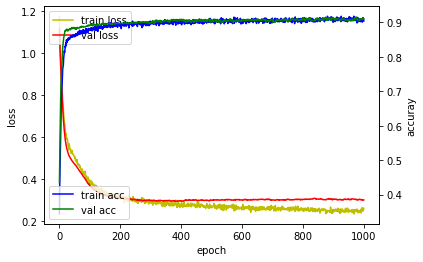

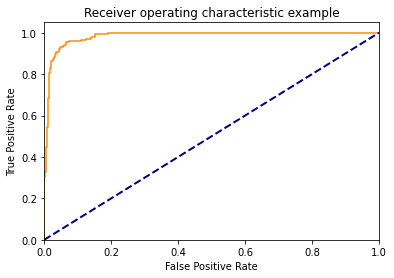


fpr : [0.         0.         0.         0.00215054 0.00215054 0.00430108
 0.00430108 0.00645161 0.00645161 0.00860215 0.00860215 0.01075269
 0.01075269 0.01290323 0.01290323 0.01505376 0.01505376 0.0172043
 0.0172043  0.01935484 0.01935484 0.02150538 0.02150538 0.02580645
 0.02580645 0.02795699 0.02795699 0.03225806 0.03225806 0.0344086
 0.0344086  0.03655914 0.03655914 0.04301075 0.04301075 0.04731183
 0.04731183 0.05591398 0.05591398 0.06021505 0.06021505 0.06451613
 0.06451613 0.07311828 0.07311828 0.10967742 0.10967742 0.12473118
 0.12473118 0.13978495 0.13978495 0.15053763 0.15053763 0.15268817
 0.15268817 0.19139785 0.19139785 0.19569892 0.24086022 0.24516129
 0.40430108 0.40860215 0.55268817 0.55698925 0.59784946 0.60215054
 0.67311828 0.67741935 0.70322581 0.70752688 0.81075269 0.81505376
 0.84301075 0.84731183 1.        ]

tpr : [0.         0.00574713 0.3045977  0.3045977  0.32758621 0.32758621
 0.37931034 0.37931034 0.44827586 0.44827586 0.54597701 0.54597701
 0.68390805 0.6

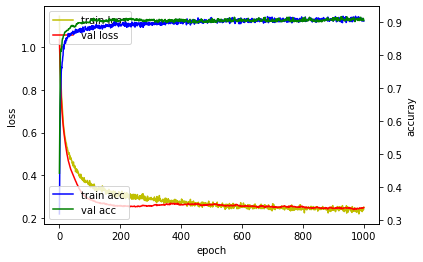

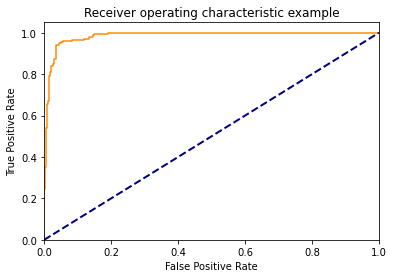


fpr : [0.         0.         0.         0.00215054 0.00215054 0.00430108
 0.00430108 0.00645161 0.00645161 0.00860215 0.00860215 0.01075269
 0.01075269 0.01290323 0.01290323 0.01505376 0.01505376 0.0172043
 0.0172043  0.01935484 0.01935484 0.02580645 0.02580645 0.02795699
 0.02795699 0.03010753 0.03010753 0.0344086  0.0344086  0.04516129
 0.04516129 0.04946237 0.04946237 0.05591398 0.05591398 0.08172043
 0.08172043 0.11827957 0.11827957 0.13333333 0.13333333 0.14623656
 0.14623656 0.1483871  0.1483871  0.18924731 0.18924731 0.21075269
 0.21505376 0.38709677 0.39139785 0.43225806 0.43655914 0.58494624
 0.58924731 0.6516129  0.65591398 0.7311828  0.73548387 0.73763441
 0.74193548 0.75053763 0.75483871 0.84086022 0.84516129 0.90752688
 0.91182796 1.        ]

tpr : [0.         0.00574713 0.24712644 0.24712644 0.35057471 0.35057471
 0.48275862 0.48275862 0.54022989 0.54022989 0.65517241 0.65517241
 0.67241379 0.67241379 0.68965517 0.68965517 0.79310345 0.79310345
 0.81034483 0.81034483 0.

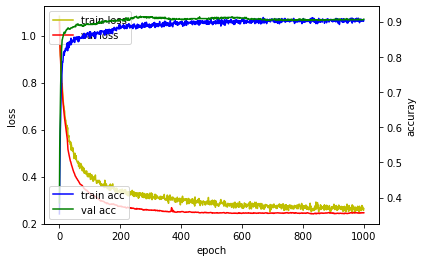

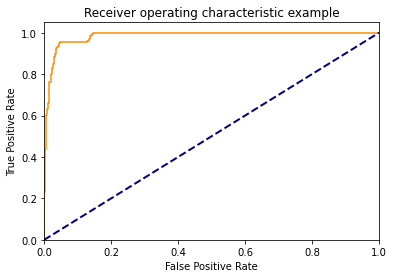


fpr : [0.         0.         0.         0.00215054 0.00215054 0.00430108
 0.00430108 0.00645161 0.00645161 0.00860215 0.00860215 0.01075269
 0.01075269 0.01290323 0.01290323 0.01505376 0.01505376 0.01935484
 0.01935484 0.02150538 0.02150538 0.02365591 0.02365591 0.02580645
 0.02580645 0.02795699 0.02795699 0.03010753 0.03010753 0.03225806
 0.03225806 0.0344086  0.0344086  0.03655914 0.03655914 0.03870968
 0.03870968 0.04086022 0.04086022 0.04516129 0.04516129 0.04731183
 0.04731183 0.12688172 0.12688172 0.13333333 0.13333333 0.13763441
 0.13763441 0.13978495 0.13978495 0.14193548 0.14193548 0.14623656
 0.14623656 0.26021505 0.26451613 0.29462366 0.29892473 0.45806452
 0.46236559 0.49462366 0.49892473 0.50107527 0.50537634 0.59354839
 0.59784946 0.68602151 0.69032258 0.80860215 0.81290323 0.84301075
 0.84731183 1.        ]

tpr : [0.         0.00574713 0.22988506 0.22988506 0.43678161 0.43678161
 0.47126437 0.47126437 0.60344828 0.60344828 0.63218391 0.63218391
 0.66091954 0.66091954 0

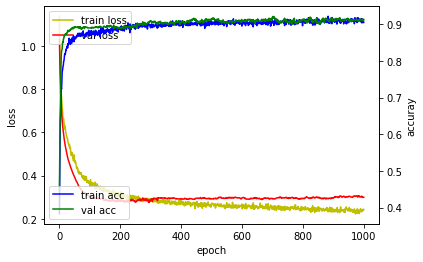

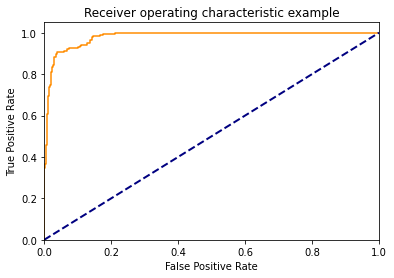


fpr : [0.         0.         0.         0.00215054 0.00215054 0.00430108
 0.00430108 0.00645161 0.00645161 0.00860215 0.00860215 0.01075269
 0.01075269 0.01290323 0.01290323 0.01505376 0.01505376 0.0172043
 0.0172043  0.01935484 0.01935484 0.02150538 0.02150538 0.02365591
 0.02365591 0.02580645 0.02580645 0.02795699 0.02795699 0.03010753
 0.03010753 0.0344086  0.0344086  0.03655914 0.03655914 0.03870968
 0.03870968 0.05806452 0.05806452 0.06666667 0.06666667 0.07526882
 0.07526882 0.10107527 0.10107527 0.10752688 0.10752688 0.10967742
 0.10967742 0.12903226 0.12903226 0.13548387 0.13548387 0.13763441
 0.13763441 0.14193548 0.14193548 0.14408602 0.14408602 0.14623656
 0.14623656 0.1655914  0.1655914  0.17634409 0.17634409 0.21290323
 0.21290323 0.22580645 0.23010753 0.39569892 0.4        0.48387097
 0.48817204 0.51612903 0.52043011 0.5483871  0.55268817 0.71182796
 0.71612903 0.7655914  0.76989247 0.80860215 0.81290323 0.82365591
 0.82795699 1.        ]

tpr : [0.         0.00574713 0.

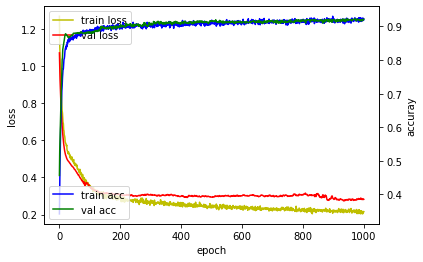

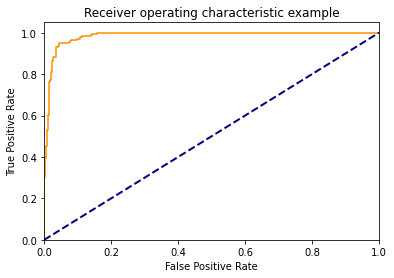


fpr : [0.         0.         0.         0.00215054 0.00215054 0.00430108
 0.00430108 0.00645161 0.00645161 0.00860215 0.00860215 0.01075269
 0.01075269 0.01290323 0.01290323 0.01505376 0.01505376 0.0172043
 0.0172043  0.01935484 0.01935484 0.02150538 0.02150538 0.02365591
 0.02365591 0.02580645 0.02580645 0.0344086  0.0344086  0.03655914
 0.03655914 0.04086022 0.04086022 0.04301075 0.04301075 0.04516129
 0.04516129 0.07311828 0.07311828 0.07741935 0.07741935 0.07956989
 0.07956989 0.09892473 0.09892473 0.10752688 0.10752688 0.11397849
 0.11397849 0.13978495 0.13978495 0.14193548 0.14193548 0.15698925
 0.15698925 0.20645161 0.21075269 0.30322581 0.30752688 0.50322581
 0.50752688 0.52473118 0.52903226 0.54408602 0.5483871  0.6516129
 0.65591398 0.72043011 0.72473118 0.81505376 0.81935484 0.84301075
 0.84731183 0.87311828 0.87741935 1.        ]

tpr : [0.         0.00574713 0.3045977  0.3045977  0.39655172 0.39655172
 0.44252874 0.44252874 0.45402299 0.45402299 0.52873563 0.52873563
 0.6

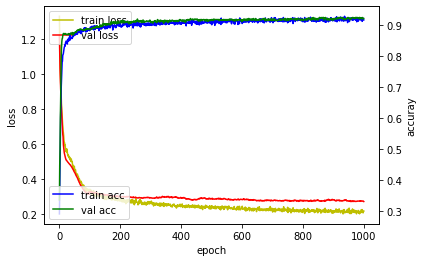

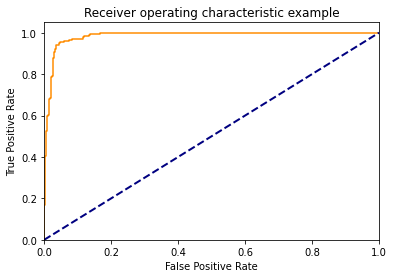


fpr : [0.         0.         0.         0.00215054 0.00215054 0.00430108
 0.00430108 0.00645161 0.00645161 0.00860215 0.00860215 0.01075269
 0.01075269 0.01290323 0.01290323 0.01505376 0.01505376 0.0172043
 0.0172043  0.01935484 0.01935484 0.02150538 0.02150538 0.02365591
 0.02365591 0.02580645 0.02580645 0.02795699 0.02795699 0.03225806
 0.03225806 0.0344086  0.0344086  0.04301075 0.04301075 0.04731183
 0.04731183 0.05806452 0.05806452 0.07526882 0.07526882 0.08172043
 0.08172043 0.11612903 0.11612903 0.11827957 0.11827957 0.13333333
 0.13333333 0.13548387 0.13548387 0.16774194 0.16774194 0.19569892
 0.2        0.22365591 0.22795699 0.48172043 0.48602151 0.49677419
 0.50107527 0.50967742 0.51397849 0.64301075 0.64731183 0.70107527
 0.70537634 0.76129032 0.7655914  0.85806452 0.86236559 1.        ]

tpr : [0.         0.00574713 0.16666667 0.16666667 0.40229885 0.40229885
 0.41954023 0.41954023 0.52298851 0.52298851 0.59770115 0.59770115
 0.60344828 0.60344828 0.63793103 0.63793103 0.6

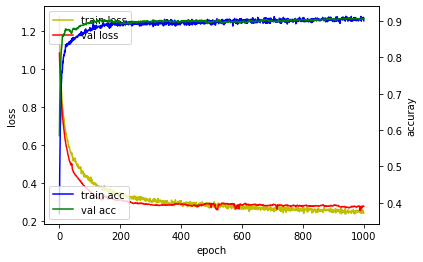

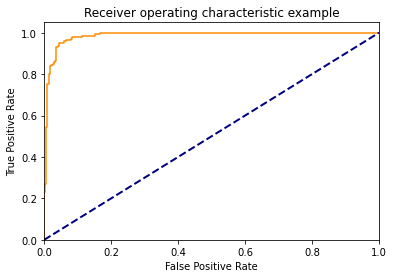


fpr : [0.         0.         0.         0.00215054 0.00215054 0.00430108
 0.00430108 0.00645161 0.00645161 0.00860215 0.00860215 0.01290323
 0.01290323 0.01505376 0.01505376 0.0172043  0.0172043  0.01935484
 0.01935484 0.02580645 0.02580645 0.02795699 0.02795699 0.03225806
 0.03225806 0.0344086  0.0344086  0.03655914 0.03655914 0.04086022
 0.04086022 0.04516129 0.04516129 0.05806452 0.05806452 0.06451613
 0.06451613 0.07956989 0.07956989 0.08387097 0.08387097 0.11182796
 0.11182796 0.15053763 0.15053763 0.16774194 0.16774194 0.23655914
 0.24086022 0.37849462 0.3827957  0.52688172 0.5311828  0.56774194
 0.57204301 0.58924731 0.59354839 0.62795699 0.63225806 0.75698925
 0.76129032 0.80215054 0.81075269 0.87526882 0.87956989 0.90752688
 0.91182796 0.97204301 0.97634409 1.        ]

tpr : [0.         0.00574713 0.22988506 0.22988506 0.27011494 0.27011494
 0.49425287 0.49425287 0.54597701 0.54597701 0.75287356 0.75287356
 0.7816092  0.7816092  0.79885057 0.79885057 0.83908046 0.83908046
 0

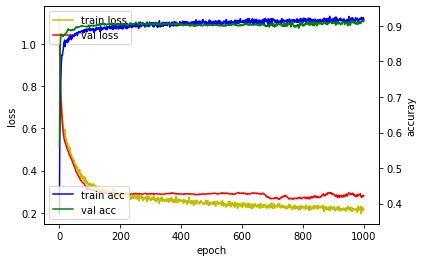

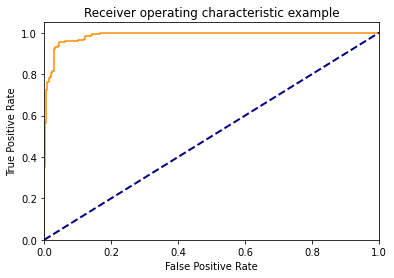


fpr : [0.         0.         0.         0.00215054 0.00215054 0.00430108
 0.00430108 0.00645161 0.00645161 0.00860215 0.00860215 0.01505376
 0.01505376 0.0172043  0.0172043  0.01935484 0.01935484 0.02365591
 0.02365591 0.02795699 0.02795699 0.03225806 0.03225806 0.04086022
 0.04086022 0.04301075 0.04301075 0.04516129 0.04516129 0.06236559
 0.06236559 0.10107527 0.10107527 0.11827957 0.11827957 0.12043011
 0.12043011 0.13978495 0.13978495 0.14193548 0.14193548 0.1655914
 0.1655914  0.19569892 0.2        0.26451613 0.2688172  0.38924731
 0.39354839 0.50537634 0.50967742 0.63655914 0.64086022 0.68387097
 0.68817204 0.7655914  0.76989247 0.80430108 0.80860215 0.82365591
 0.82795699 0.90537634 0.90967742 1.        ]

tpr : [0.         0.00574713 0.35057471 0.35057471 0.56321839 0.56321839
 0.62068966 0.62068966 0.72413793 0.72413793 0.76436782 0.76436782
 0.7816092  0.7816092  0.78735632 0.78735632 0.8045977  0.8045977
 0.81609195 0.81609195 0.91954023 0.91954023 0.93103448 0.93103448
 0.9

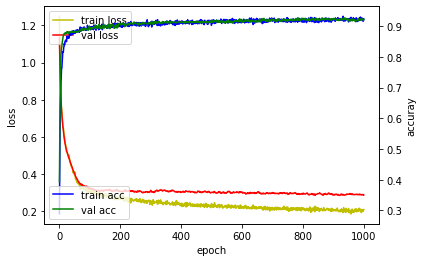

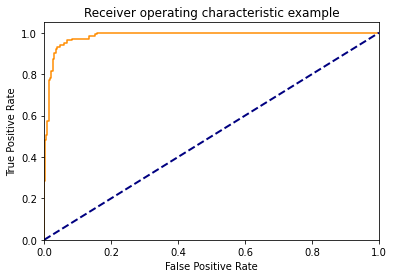


fpr : [0.         0.         0.         0.00215054 0.00215054 0.00430108
 0.00430108 0.00860215 0.00860215 0.01290323 0.01290323 0.01505376
 0.01505376 0.0172043  0.0172043  0.01935484 0.01935484 0.02150538
 0.02150538 0.02580645 0.02580645 0.03010753 0.03010753 0.03655914
 0.03655914 0.03870968 0.03870968 0.04731183 0.04731183 0.05806452
 0.05806452 0.06666667 0.06666667 0.08387097 0.08387097 0.13333333
 0.13333333 0.15268817 0.15268817 0.15913978 0.15913978 0.18924731
 0.19354839 0.40860215 0.41290323 0.52043011 0.52473118 0.5483871
 0.55268817 0.60430108 0.60860215 0.63010753 0.6344086  0.67956989
 0.68387097 0.71182796 0.72043011 0.73333333 0.73763441 0.75053763
 0.75483871 0.82365591 0.82795699 0.84731183 0.8516129  1.        ]

tpr : [0.         0.00574713 0.2816092  0.2816092  0.48275862 0.48275862
 0.50574713 0.50574713 0.57471264 0.57471264 0.74137931 0.74137931
 0.77011494 0.77011494 0.7816092  0.7816092  0.81034483 0.81034483
 0.81609195 0.81609195 0.87356322 0.87356322 0.9

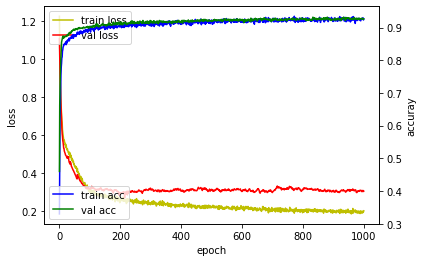

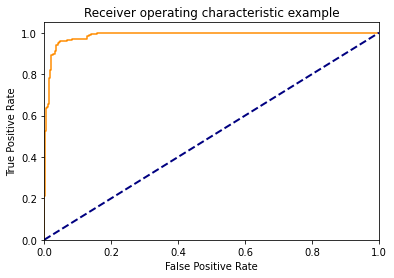


fpr : [0.         0.         0.         0.00215054 0.00215054 0.00430108
 0.00430108 0.00645161 0.00645161 0.00860215 0.00860215 0.01075269
 0.01075269 0.01290323 0.01290323 0.01505376 0.01505376 0.0172043
 0.0172043  0.01935484 0.01935484 0.02150538 0.02150538 0.02580645
 0.02580645 0.03225806 0.03225806 0.0344086  0.0344086  0.04086022
 0.04086022 0.04516129 0.04516129 0.04731183 0.04731183 0.06666667
 0.06666667 0.08387097 0.08387097 0.12688172 0.12688172 0.13333333
 0.13333333 0.13978495 0.13978495 0.15698925 0.15698925 0.19784946
 0.20215054 0.34623656 0.35053763 0.48172043 0.48602151 0.49892473
 0.50322581 0.61505376 0.61935484 0.68602151 0.69032258 0.69247312
 0.69677419 0.84086022 0.84516129 0.85376344 0.85806452 0.89247312
 0.89677419 1.        ]

tpr : [0.         0.00574713 0.21264368 0.21264368 0.52298851 0.52298851
 0.62643678 0.62643678 0.63793103 0.63793103 0.64367816 0.64367816
 0.65517241 0.65517241 0.66666667 0.66666667 0.7816092  0.7816092
 0.82183908 0.82183908 0.8

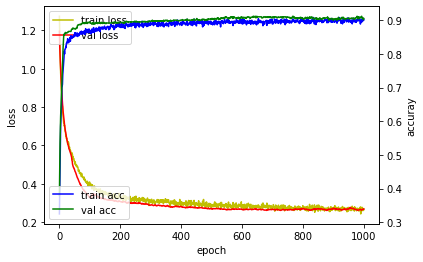

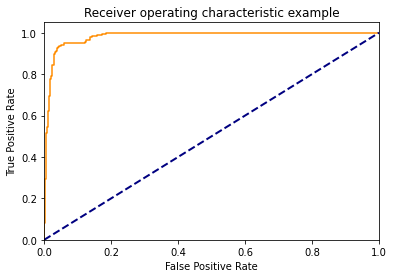


fpr : [0.         0.         0.         0.00215054 0.00215054 0.00430108
 0.00430108 0.00645161 0.00645161 0.00860215 0.00860215 0.01075269
 0.01075269 0.01290323 0.01290323 0.01505376 0.01505376 0.0172043
 0.0172043  0.01935484 0.01935484 0.02150538 0.02150538 0.02365591
 0.02365591 0.02795699 0.02795699 0.03010753 0.03010753 0.03225806
 0.03225806 0.03655914 0.03655914 0.03870968 0.03870968 0.04086022
 0.04086022 0.04516129 0.04516129 0.04946237 0.04946237 0.06021505
 0.06021505 0.12043011 0.12043011 0.12473118 0.12473118 0.13548387
 0.13548387 0.13763441 0.13763441 0.14193548 0.14193548 0.15913978
 0.15913978 0.17204301 0.17204301 0.18494624 0.18494624 0.20645161
 0.21075269 0.35268817 0.35698925 0.39354839 0.40215054 0.49247312
 0.49677419 0.66021505 0.66451613 0.83655914 0.84086022 0.90752688
 0.91182796 0.92688172 0.9311828  0.96344086 0.96774194 1.        ]

tpr : [0.         0.00574713 0.08045977 0.08045977 0.29310345 0.29310345
 0.38505747 0.38505747 0.51724138 0.51724138 0.5

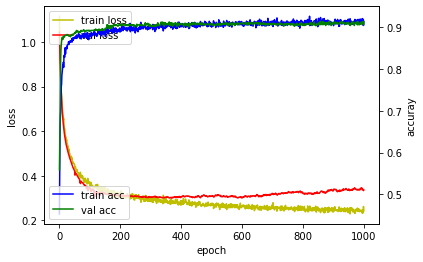

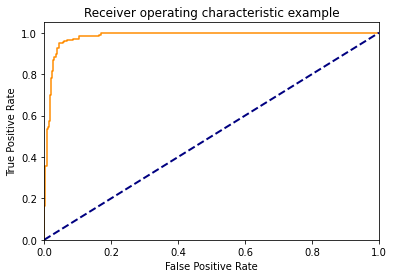


fpr : [0.         0.         0.         0.00215054 0.00215054 0.00860215
 0.00860215 0.01075269 0.01075269 0.01290323 0.01290323 0.01505376
 0.01505376 0.0172043  0.0172043  0.01935484 0.01935484 0.02150538
 0.02150538 0.02365591 0.02365591 0.02580645 0.02580645 0.03010753
 0.03010753 0.0344086  0.0344086  0.03655914 0.03655914 0.03870968
 0.03870968 0.04301075 0.04301075 0.04516129 0.04516129 0.05591398
 0.05591398 0.05806452 0.05806452 0.0688172  0.0688172  0.08602151
 0.08602151 0.10322581 0.10322581 0.16344086 0.16344086 0.16989247
 0.16989247 0.22580645 0.23010753 0.24086022 0.24516129 0.52043011
 0.52473118 0.59139785 0.59569892 0.61505376 0.61935484 0.6688172
 0.67311828 0.7655914  0.76989247 0.81290323 0.8172043  0.85591398
 0.86021505 1.        ]

tpr : [0.         0.00574713 0.16091954 0.16091954 0.35632184 0.35632184
 0.53448276 0.53448276 0.54597701 0.54597701 0.56321839 0.56321839
 0.57471264 0.57471264 0.70114943 0.70114943 0.75287356 0.75287356
 0.7816092  0.7816092  0.

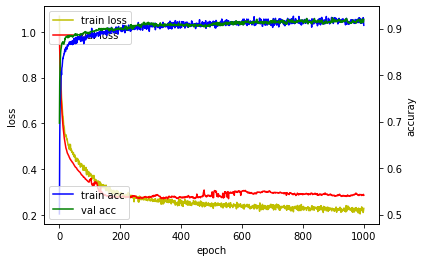

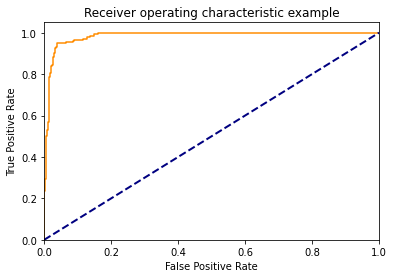


fpr : [0.         0.         0.         0.00215054 0.00215054 0.00430108
 0.00430108 0.00645161 0.00645161 0.00860215 0.00860215 0.01075269
 0.01075269 0.01290323 0.01290323 0.01505376 0.01505376 0.0172043
 0.0172043  0.02150538 0.02150538 0.02365591 0.02365591 0.02580645
 0.02580645 0.02795699 0.02795699 0.03010753 0.03010753 0.03225806
 0.03225806 0.03655914 0.03655914 0.03870968 0.03870968 0.06451613
 0.06451613 0.08602151 0.08602151 0.08817204 0.08817204 0.11612903
 0.11612903 0.12688172 0.12688172 0.13763441 0.13763441 0.1483871
 0.1483871  0.16129032 0.16129032 0.20215054 0.20645161 0.33978495
 0.34408602 0.52473118 0.52903226 0.54623656 0.55053763 0.57419355
 0.57849462 0.66451613 0.6688172  0.70322581 0.70752688 0.72688172
 0.7311828  0.8172043  0.82150538 0.83655914 0.84086022 0.8516129
 0.85806452 0.87741935 0.88172043 0.96989247 0.97419355 1.        ]

tpr : [0.         0.00574713 0.23563218 0.23563218 0.29310345 0.29310345
 0.32183908 0.32183908 0.5        0.5        0.528

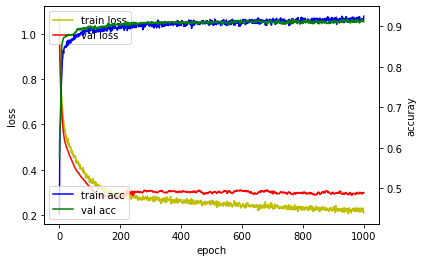

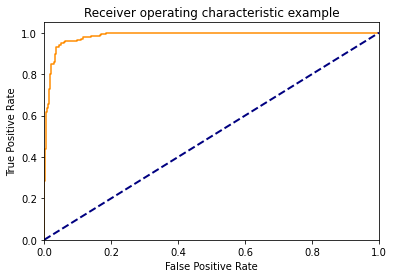


fpr : [0.         0.         0.         0.00215054 0.00215054 0.00430108
 0.00430108 0.00645161 0.00645161 0.00860215 0.00860215 0.01075269
 0.01075269 0.01290323 0.01290323 0.01505376 0.01505376 0.0172043
 0.0172043  0.01935484 0.01935484 0.02150538 0.02150538 0.02795699
 0.02795699 0.03225806 0.03225806 0.03655914 0.03655914 0.04301075
 0.04301075 0.04516129 0.04516129 0.04946237 0.04946237 0.06021505
 0.06021505 0.06236559 0.06236559 0.09677419 0.09677419 0.10967742
 0.10967742 0.11612903 0.11612903 0.13978495 0.13978495 0.1655914
 0.1655914  0.16989247 0.16989247 0.18494624 0.18494624 0.23225806
 0.23655914 0.28817204 0.29247312 0.41290323 0.4172043  0.47741935
 0.48172043 0.68602151 0.69032258 0.69462366 0.69892473 0.72688172
 0.7311828  0.79139785 0.79569892 0.82795699 0.83225806 1.        ]

tpr : [0.         0.00574713 0.2816092  0.2816092  0.43678161 0.43678161
 0.44252874 0.44252874 0.61494253 0.61494253 0.63793103 0.63793103
 0.65517241 0.65517241 0.71264368 0.71264368 0.72

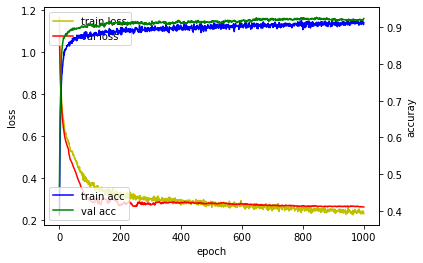

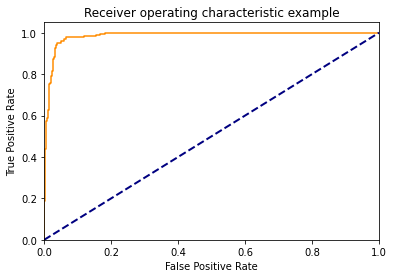


fpr : [0.         0.         0.         0.00215054 0.00215054 0.00430108
 0.00430108 0.00645161 0.00645161 0.00860215 0.00860215 0.01075269
 0.01075269 0.01290323 0.01290323 0.0172043  0.0172043  0.01935484
 0.01935484 0.02150538 0.02150538 0.02365591 0.02365591 0.02580645
 0.02580645 0.03010753 0.03010753 0.03225806 0.03225806 0.03655914
 0.03655914 0.03870968 0.03870968 0.04946237 0.04946237 0.0516129
 0.0516129  0.05806452 0.05806452 0.06451613 0.06451613 0.11827957
 0.11827957 0.15483871 0.15483871 0.16774194 0.16774194 0.1827957
 0.1827957  0.26021505 0.26451613 0.3311828  0.33548387 0.37419355
 0.37849462 0.4172043  0.42150538 0.43225806 0.43655914 0.73763441
 0.74193548 0.76774194 0.77204301 0.91612903 0.92043011 0.94193548
 0.94623656 1.        ]

tpr : [0.         0.00574713 0.18965517 0.18965517 0.43678161 0.43678161
 0.52298851 0.52298851 0.57471264 0.57471264 0.5862069  0.5862069
 0.62643678 0.62643678 0.75287356 0.75287356 0.75862069 0.75862069
 0.77586207 0.77586207 0.79

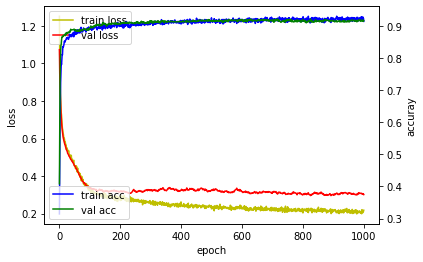

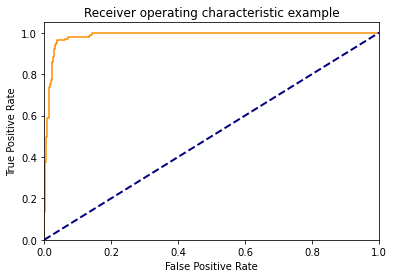


fpr : [0.         0.         0.         0.00215054 0.00215054 0.00645161
 0.00645161 0.00860215 0.00860215 0.01290323 0.01290323 0.01505376
 0.01505376 0.0172043  0.0172043  0.01935484 0.01935484 0.02365591
 0.02365591 0.02580645 0.02580645 0.02795699 0.02795699 0.03010753
 0.03010753 0.03225806 0.03225806 0.03655914 0.03655914 0.03870968
 0.03870968 0.06236559 0.06236559 0.07096774 0.07096774 0.13333333
 0.13333333 0.13548387 0.13548387 0.14193548 0.14193548 0.14408602
 0.14408602 0.17204301 0.17634409 0.42795699 0.43225806 0.48817204
 0.49247312 0.59784946 0.60215054 0.64086022 0.64516129 0.6688172
 0.67311828 0.79139785 0.8        0.88172043 0.88602151 1.        ]

tpr : [0.         0.00574713 0.13218391 0.13218391 0.37356322 0.37356322
 0.49425287 0.49425287 0.5862069  0.5862069  0.60344828 0.60344828
 0.73563218 0.73563218 0.75287356 0.75287356 0.77011494 0.77011494
 0.85632184 0.85632184 0.88505747 0.88505747 0.8908046  0.8908046
 0.91954023 0.91954023 0.94252874 0.94252874 0.94

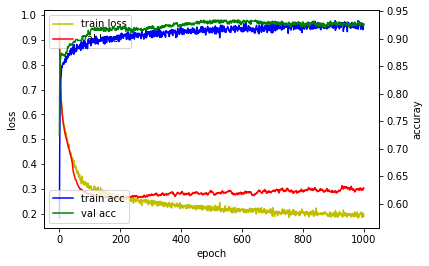

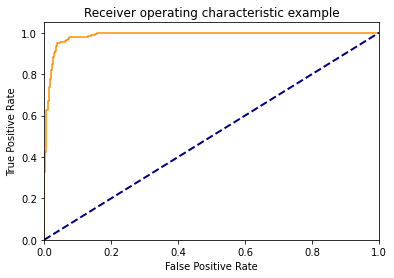


fpr : [0.         0.         0.         0.00215054 0.00215054 0.00430108
 0.00430108 0.00645161 0.00645161 0.01075269 0.01075269 0.01290323
 0.01290323 0.01505376 0.01505376 0.0172043  0.0172043  0.01935484
 0.01935484 0.02150538 0.02150538 0.02365591 0.02365591 0.02580645
 0.02580645 0.03010753 0.03010753 0.03225806 0.03225806 0.0344086
 0.0344086  0.03655914 0.03655914 0.03870968 0.03870968 0.04731183
 0.04731183 0.06236559 0.06236559 0.06451613 0.06451613 0.07096774
 0.07096774 0.07526882 0.07526882 0.1311828  0.1311828  0.13978495
 0.13978495 0.15053763 0.15053763 0.15698925 0.15698925 0.20860215
 0.21290323 0.27311828 0.27741935 0.44301075 0.44731183 0.51397849
 0.51827957 0.53763441 0.54193548 0.62580645 0.63010753 0.69677419
 0.70107527 0.72903226 0.73333333 0.77204301 0.77634409 0.81935484
 0.82365591 0.98494624 0.98924731 1.        ]

tpr : [0.         0.00574713 0.32758621 0.32758621 0.42528736 0.42528736
 0.53448276 0.53448276 0.62643678 0.62643678 0.67241379 0.67241379
 0.

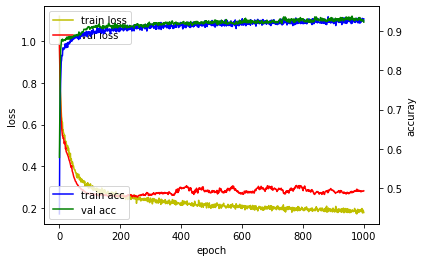

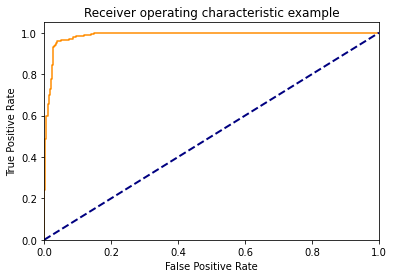


fpr : [0.         0.         0.         0.00215054 0.00215054 0.00430108
 0.00430108 0.00645161 0.00645161 0.01075269 0.01075269 0.01290323
 0.01290323 0.01505376 0.01505376 0.0172043  0.0172043  0.01935484
 0.01935484 0.02150538 0.02150538 0.02365591 0.02365591 0.02580645
 0.02580645 0.02795699 0.02795699 0.03225806 0.03225806 0.0344086
 0.0344086  0.03870968 0.03870968 0.04946237 0.04946237 0.07311828
 0.07311828 0.08602151 0.08602151 0.09462366 0.09462366 0.11827957
 0.11827957 0.13978495 0.13978495 0.1483871  0.1483871  0.19139785
 0.19569892 0.27311828 0.27741935 0.30967742 0.31397849 0.47526882
 0.47956989 0.52043011 0.52473118 0.5655914  0.56989247 0.76989247
 0.77419355 0.80645161 0.81075269 0.83655914 0.84086022 0.90537634
 0.90967742 1.        ]

tpr : [0.         0.00574713 0.24137931 0.24137931 0.48850575 0.48850575
 0.56321839 0.56321839 0.59770115 0.59770115 0.65517241 0.65517241
 0.6954023  0.6954023  0.70114943 0.70114943 0.72988506 0.72988506
 0.77011494 0.77011494 0.

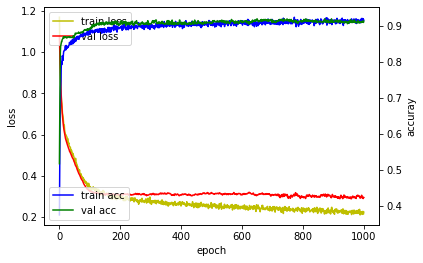

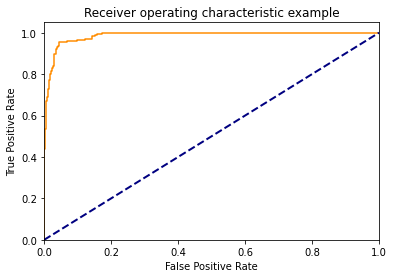


fpr : [0.         0.         0.         0.00215054 0.00215054 0.00430108
 0.00430108 0.00645161 0.00645161 0.00860215 0.00860215 0.01075269
 0.01075269 0.01290323 0.01290323 0.01505376 0.01505376 0.0172043
 0.0172043  0.01935484 0.01935484 0.02150538 0.02150538 0.02365591
 0.02365591 0.02580645 0.02580645 0.03010753 0.03010753 0.0344086
 0.0344086  0.03655914 0.03655914 0.03870968 0.03870968 0.04086022
 0.04086022 0.04301075 0.04301075 0.06666667 0.06666667 0.09892473
 0.09892473 0.12258065 0.12258065 0.14193548 0.14193548 0.14408602
 0.14408602 0.15268817 0.15268817 0.15913978 0.15913978 0.17204301
 0.17204301 0.25376344 0.25806452 0.49462366 0.49892473 0.50537634
 0.50967742 0.60430108 0.60860215 0.66021505 0.66451613 0.72473118
 0.72903226 0.75483871 0.75913978 0.80645161 0.81075269 0.82150538
 0.83010753 0.91397849 0.91827957 0.95698925 0.96129032 1.        ]

tpr : [0.         0.00574713 0.43678161 0.43678161 0.53448276 0.53448276
 0.57471264 0.57471264 0.67241379 0.67241379 0.68

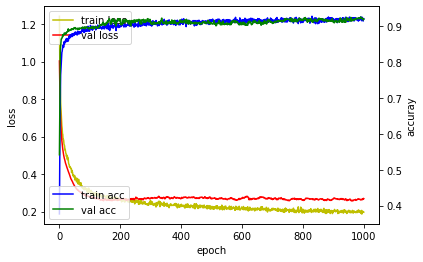

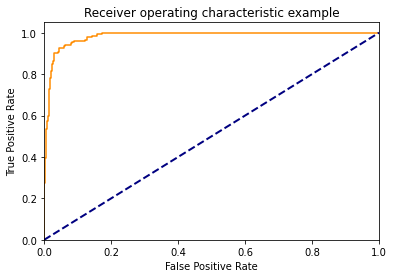


fpr : [0.         0.         0.         0.00215054 0.00215054 0.00430108
 0.00430108 0.00645161 0.00645161 0.00860215 0.00860215 0.01075269
 0.01075269 0.01290323 0.01290323 0.01505376 0.01505376 0.0172043
 0.0172043  0.01935484 0.01935484 0.02150538 0.02150538 0.02365591
 0.02365591 0.02580645 0.02580645 0.02795699 0.02795699 0.04086022
 0.04086022 0.04516129 0.04516129 0.05806452 0.05806452 0.06236559
 0.06236559 0.07956989 0.07956989 0.08172043 0.08172043 0.09032258
 0.09032258 0.12258065 0.12258065 0.12903226 0.12903226 0.14193548
 0.14193548 0.15698925 0.15698925 0.15913978 0.15913978 0.17204301
 0.17204301 0.19784946 0.20215054 0.25591398 0.26021505 0.47526882
 0.47956989 0.49032258 0.49462366 0.55913978 0.56344086 0.63870968
 0.64301075 0.80215054 0.81075269 0.88602151 0.89032258 1.        ]

tpr : [0.         0.00574713 0.27586207 0.27586207 0.39655172 0.39655172
 0.4137931  0.4137931  0.53448276 0.53448276 0.57471264 0.57471264
 0.59770115 0.59770115 0.66091954 0.66091954 0.7

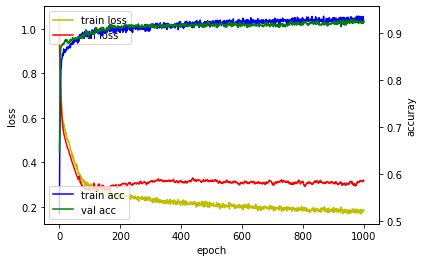

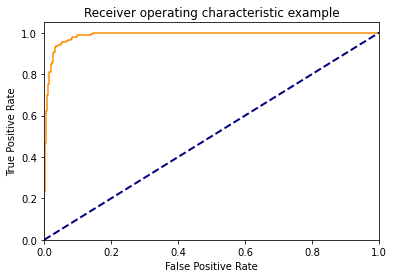


fpr : [0.         0.         0.         0.00215054 0.00215054 0.00430108
 0.00430108 0.00645161 0.00645161 0.00860215 0.00860215 0.01075269
 0.01075269 0.01290323 0.01290323 0.01505376 0.01505376 0.01935484
 0.01935484 0.02150538 0.02150538 0.02365591 0.02365591 0.02580645
 0.02580645 0.03010753 0.03010753 0.03225806 0.03225806 0.03655914
 0.03655914 0.04086022 0.04086022 0.04946237 0.04946237 0.05376344
 0.05376344 0.06451613 0.06451613 0.07096774 0.07096774 0.07956989
 0.07956989 0.08172043 0.08172043 0.09677419 0.09677419 0.13978495
 0.13978495 0.14623656 0.14623656 0.18924731 0.19354839 0.43655914
 0.44516129 0.46236559 0.46666667 0.51182796 0.51612903 0.55913978
 0.56344086 0.57419355 0.57849462 0.64946237 0.65376344 0.7483871
 0.75698925 0.76774194 0.77204301 0.82580645 0.83010753 0.83225806
 0.83655914 0.94193548 0.94623656 1.        ]

tpr : [0.         0.01149425 0.23563218 0.23563218 0.46551724 0.46551724
 0.61494253 0.61494253 0.62068966 0.62068966 0.70114943 0.70114943
 0.

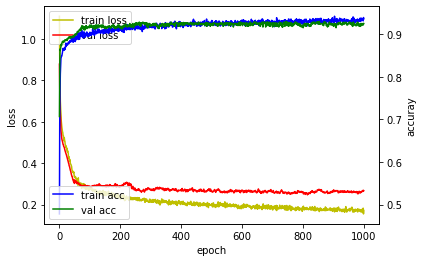

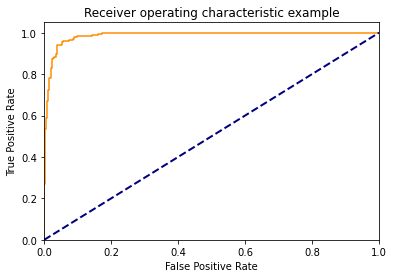


fpr : [0.         0.         0.         0.00215054 0.00215054 0.00430108
 0.00430108 0.00645161 0.00645161 0.00860215 0.00860215 0.01075269
 0.01075269 0.01290323 0.01290323 0.01505376 0.01505376 0.01935484
 0.01935484 0.02150538 0.02150538 0.02365591 0.02365591 0.02580645
 0.02580645 0.03010753 0.03010753 0.0344086  0.0344086  0.03655914
 0.03655914 0.03870968 0.03870968 0.05376344 0.05376344 0.05591398
 0.05591398 0.07311828 0.07311828 0.08602151 0.08602151 0.09032258
 0.09032258 0.09892473 0.09892473 0.14193548 0.14193548 0.16129032
 0.16129032 0.17204301 0.17204301 0.17634409 0.18064516 0.3655914
 0.36989247 0.4688172  0.47311828 0.49247312 0.49677419 0.52903226
 0.53333333 0.67741935 0.68172043 0.70967742 0.71397849 0.76344086
 0.76774194 0.81290323 0.8172043  0.82795699 0.83225806 0.90107527
 0.90537634 0.94408602 0.9483871  0.95698925 0.96129032 1.        ]

tpr : [0.         0.00574713 0.27011494 0.27011494 0.53448276 0.53448276
 0.55747126 0.55747126 0.5862069  0.5862069  0.6

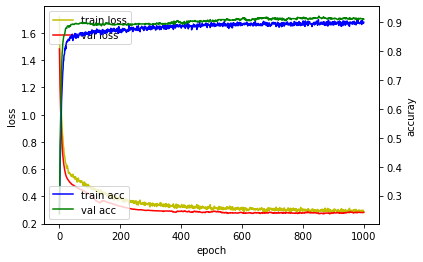

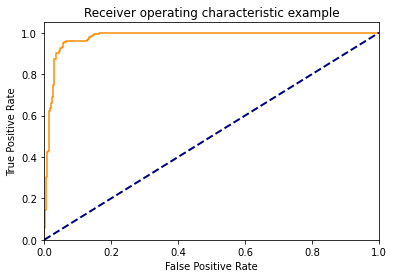


fpr : [0.         0.         0.         0.00215054 0.00215054 0.00430108
 0.00430108 0.00645161 0.00645161 0.00860215 0.00860215 0.01075269
 0.01075269 0.01290323 0.01290323 0.01505376 0.01505376 0.0172043
 0.0172043  0.01935484 0.01935484 0.02150538 0.02150538 0.02365591
 0.02365591 0.02580645 0.02580645 0.02795699 0.02795699 0.03010753
 0.03010753 0.0344086  0.0344086  0.03655914 0.03655914 0.04516129
 0.04516129 0.04731183 0.04731183 0.05376344 0.05376344 0.05591398
 0.05591398 0.05806452 0.05806452 0.06451613 0.06451613 0.12903226
 0.12903226 0.1311828  0.1311828  0.13333333 0.13333333 0.13978495
 0.13978495 0.14623656 0.14623656 0.1483871  0.1483871  0.16344086
 0.16344086 0.2516129  0.25591398 0.29677419 0.30107527 0.46021505
 0.46451613 0.47956989 0.48387097 0.63225806 0.63655914 0.6688172
 0.67311828 0.73978495 0.74408602 0.8516129  0.85591398 0.91397849
 0.91827957 0.96344086 0.96774194 1.        ]

tpr : [0.         0.00574713 0.05747126 0.05747126 0.14367816 0.14367816
 0.2

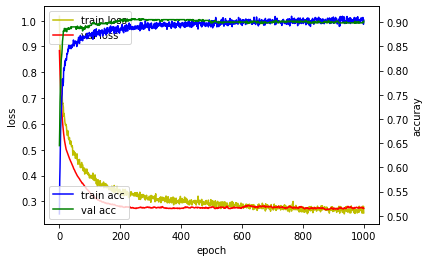

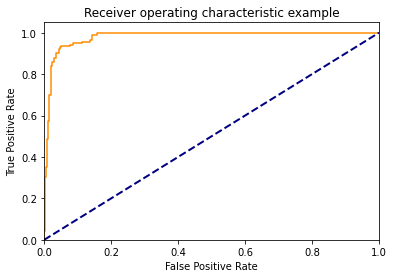


fpr : [0.         0.         0.         0.00215054 0.00215054 0.00430108
 0.00430108 0.00645161 0.00645161 0.00860215 0.00860215 0.01075269
 0.01075269 0.01290323 0.01290323 0.01505376 0.01505376 0.01935484
 0.01935484 0.02150538 0.02150538 0.02365591 0.02365591 0.02795699
 0.02795699 0.03010753 0.03010753 0.0344086  0.0344086  0.03655914
 0.03655914 0.04301075 0.04301075 0.04516129 0.04516129 0.04731183
 0.04731183 0.04946237 0.04946237 0.07741935 0.07741935 0.08602151
 0.08602151 0.11397849 0.11397849 0.13763441 0.13763441 0.14193548
 0.14193548 0.15698925 0.15698925 0.21935484 0.22365591 0.24301075
 0.24731183 0.4516129  0.45591398 0.46236559 0.46666667 0.54408602
 0.5483871  0.64946237 0.65806452 0.67526882 0.67956989 0.80215054
 0.80645161 0.83010753 0.8344086  0.87096774 0.87526882 0.88602151
 0.89032258 1.        ]

tpr : [0.         0.00574713 0.04022989 0.04022989 0.3045977  0.3045977
 0.32758621 0.32758621 0.35057471 0.35057471 0.48850575 0.48850575
 0.57471264 0.57471264 0.

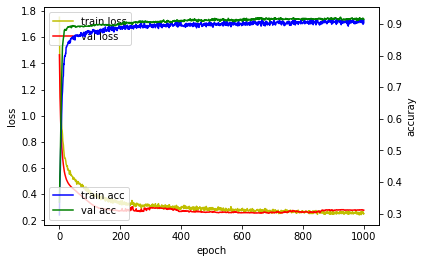

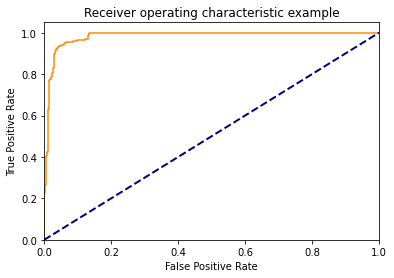


fpr : [0.         0.         0.         0.00215054 0.00215054 0.00430108
 0.00430108 0.00645161 0.00645161 0.00860215 0.00860215 0.01075269
 0.01075269 0.01290323 0.01290323 0.01505376 0.01505376 0.0172043
 0.0172043  0.01935484 0.01935484 0.02365591 0.02365591 0.02580645
 0.02580645 0.02795699 0.02795699 0.03010753 0.03010753 0.03225806
 0.03225806 0.0344086  0.0344086  0.03870968 0.03870968 0.04086022
 0.04086022 0.04516129 0.04516129 0.04946237 0.04946237 0.06021505
 0.06021505 0.06451613 0.06451613 0.08602151 0.08602151 0.09892473
 0.09892473 0.12043011 0.12043011 0.1311828  0.1311828  0.13333333
 0.13333333 0.21290323 0.2172043  0.24731183 0.2516129  0.47526882
 0.47956989 0.58064516 0.58494624 0.61935484 0.62365591 0.69247312
 0.69677419 0.71827957 0.72258065 0.77634409 0.78064516 0.80430108
 0.80860215 0.81935484 0.82365591 1.        ]

tpr : [0.         0.00574713 0.22413793 0.22413793 0.26436782 0.26436782
 0.33908046 0.33908046 0.40229885 0.40229885 0.42528736 0.42528736
 0.

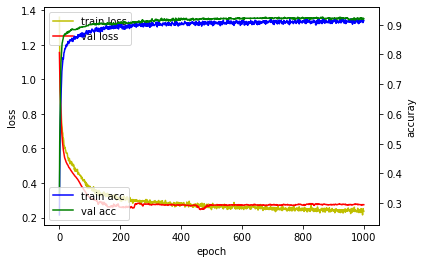

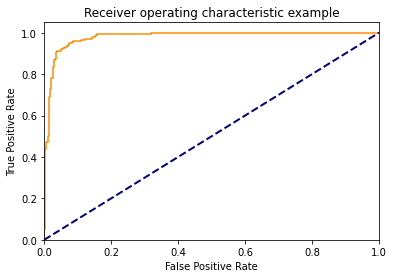


fpr : [0.         0.         0.         0.00215054 0.00215054 0.00430108
 0.00430108 0.00645161 0.00645161 0.01075269 0.01075269 0.01290323
 0.01290323 0.01505376 0.01505376 0.0172043  0.0172043  0.01935484
 0.01935484 0.02150538 0.02150538 0.02580645 0.02580645 0.02795699
 0.02795699 0.03010753 0.03010753 0.03225806 0.03225806 0.0344086
 0.0344086  0.03870968 0.03870968 0.04946237 0.04946237 0.05591398
 0.05591398 0.06236559 0.06236559 0.06666667 0.06666667 0.07096774
 0.07096774 0.07311828 0.07311828 0.08387097 0.08387097 0.08602151
 0.08602151 0.10967742 0.10967742 0.12043011 0.12043011 0.14193548
 0.14193548 0.15268817 0.15268817 0.15483871 0.15483871 0.15698925
 0.15698925 0.22150538 0.22580645 0.31827957 0.31827957 0.37849462
 0.3827957  0.45376344 0.45806452 0.5483871  0.55268817 0.61075269
 0.61505376 0.66666667 0.67096774 0.72473118 0.72903226 0.8172043
 0.82150538 0.83010753 0.8344086  0.91827957 0.92258065 1.        ]

tpr : [0.         0.00574713 0.05172414 0.05172414 0.43

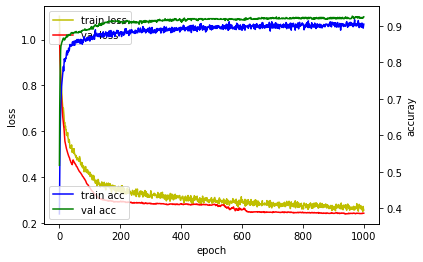

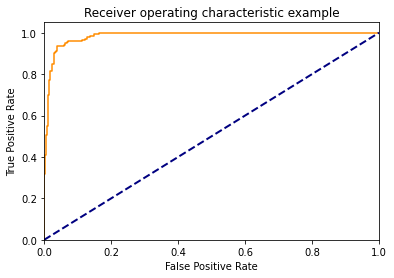


fpr : [0.         0.         0.         0.00215054 0.00215054 0.00645161
 0.00645161 0.00860215 0.00860215 0.01075269 0.01075269 0.01290323
 0.01290323 0.01505376 0.01505376 0.0172043  0.0172043  0.02365591
 0.02365591 0.02795699 0.02795699 0.03225806 0.03225806 0.03655914
 0.03655914 0.03870968 0.03870968 0.06021505 0.06021505 0.06236559
 0.06236559 0.0688172  0.0688172  0.07096774 0.07096774 0.11182796
 0.11182796 0.12258065 0.12258065 0.12903226 0.12903226 0.13763441
 0.13763441 0.1483871  0.1483871  0.16344086 0.16344086 0.24731183
 0.2516129  0.30537634 0.30967742 0.34193548 0.34623656 0.42795699
 0.43225806 0.53333333 0.53763441 0.54408602 0.5483871  0.58709677
 0.59139785 0.8344086  0.83870968 0.95053763 0.95483871 1.        ]

tpr : [0.         0.00574713 0.31609195 0.31609195 0.40804598 0.40804598
 0.50574713 0.50574713 0.55172414 0.55172414 0.70114943 0.70114943
 0.70689655 0.70689655 0.77011494 0.77011494 0.81609195 0.81609195
 0.85057471 0.85057471 0.90229885 0.90229885 0.

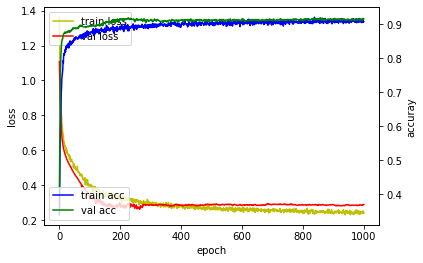

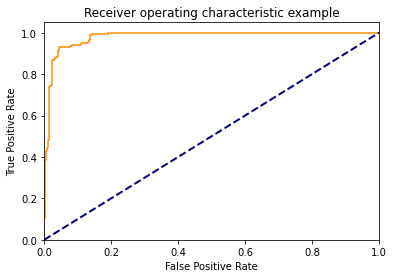


fpr : [0.         0.         0.         0.00215054 0.00215054 0.00430108
 0.00430108 0.00860215 0.00860215 0.01075269 0.01075269 0.01290323
 0.01290323 0.01505376 0.01505376 0.0172043  0.0172043  0.02150538
 0.02150538 0.02365591 0.02365591 0.02795699 0.02795699 0.03225806
 0.03225806 0.0344086  0.0344086  0.04086022 0.04086022 0.04301075
 0.04301075 0.07741935 0.07741935 0.08172043 0.08172043 0.10967742
 0.10967742 0.1311828  0.1311828  0.13333333 0.13333333 0.13548387
 0.13548387 0.13763441 0.13763441 0.14408602 0.14408602 0.19139785
 0.19139785 0.26666667 0.27526882 0.40215054 0.40645161 0.48172043
 0.48602151 0.58709677 0.59139785 0.59784946 0.60215054 0.61505376
 0.61935484 0.66021505 0.66451613 0.72043011 0.72473118 0.78494624
 0.79354839 1.        ]

tpr : [0.         0.00574713 0.10344828 0.10344828 0.38505747 0.38505747
 0.43103448 0.43103448 0.44252874 0.44252874 0.48275862 0.48275862
 0.61494253 0.61494253 0.73563218 0.73563218 0.74137931 0.74137931
 0.74712644 0.74712644 0

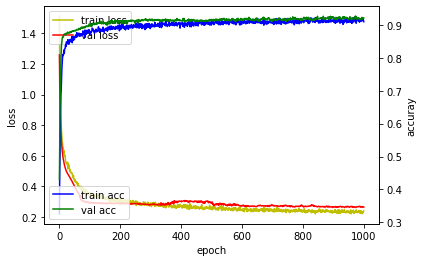

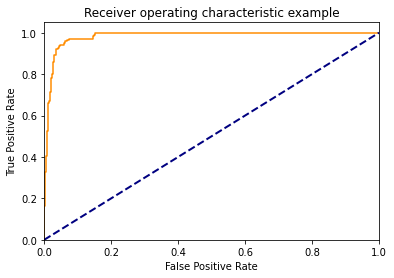


fpr : [0.         0.         0.         0.00215054 0.00215054 0.00430108
 0.00430108 0.00645161 0.00645161 0.00860215 0.00860215 0.01075269
 0.01075269 0.01290323 0.01290323 0.0172043  0.0172043  0.01935484
 0.01935484 0.02365591 0.02365591 0.02580645 0.02580645 0.02795699
 0.02795699 0.0344086  0.0344086  0.03655914 0.03655914 0.04086022
 0.04086022 0.04516129 0.04516129 0.04731183 0.04731183 0.06021505
 0.06021505 0.06236559 0.06236559 0.0688172  0.0688172  0.07526882
 0.07526882 0.14623656 0.14623656 0.1483871  0.1483871  0.15053763
 0.15053763 0.2        0.20430108 0.31612903 0.32043011 0.45376344
 0.45806452 0.51182796 0.51612903 0.61935484 0.62365591 0.68172043
 0.68602151 0.74623656 0.75053763 0.81075269 0.81505376 0.8516129
 0.85591398 0.95483871 0.95913978 1.        ]

tpr : [0.         0.00574713 0.16091954 0.16091954 0.32758621 0.32758621
 0.3908046  0.3908046  0.40229885 0.40229885 0.52298851 0.52298851
 0.66091954 0.66091954 0.67241379 0.67241379 0.71264368 0.71264368
 0.

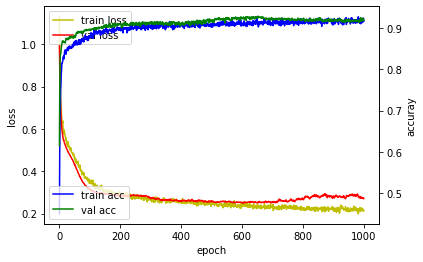

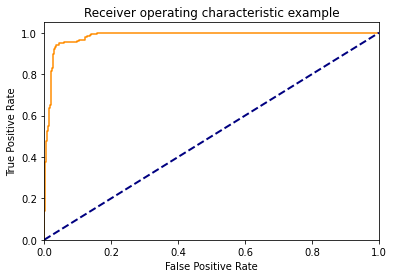


fpr : [0.         0.         0.         0.00215054 0.00215054 0.00430108
 0.00430108 0.00645161 0.00645161 0.00860215 0.00860215 0.01075269
 0.01075269 0.01290323 0.01290323 0.0172043  0.0172043  0.01935484
 0.01935484 0.02150538 0.02150538 0.02365591 0.02365591 0.02580645
 0.02580645 0.03010753 0.03010753 0.03225806 0.03225806 0.0344086
 0.0344086  0.04301075 0.04301075 0.06021505 0.06021505 0.09677419
 0.09677419 0.10537634 0.10537634 0.12258065 0.12258065 0.12688172
 0.12688172 0.13763441 0.13763441 0.13978495 0.13978495 0.15913978
 0.15913978 0.18064516 0.18494624 0.28817204 0.29247312 0.41935484
 0.42365591 0.55913978 0.56344086 0.58064516 0.58494624 0.58709677
 0.59139785 0.73763441 0.74193548 0.76989247 0.77419355 0.84731183
 0.8516129  0.90752688 0.91182796 1.        ]

tpr : [0.         0.00574713 0.13793103 0.13793103 0.37356322 0.37356322
 0.44827586 0.44827586 0.47701149 0.47701149 0.52298851 0.52298851
 0.55172414 0.55172414 0.63793103 0.63793103 0.64942529 0.64942529
 0.

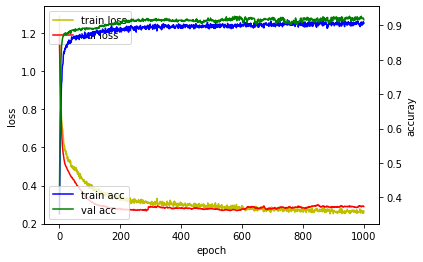

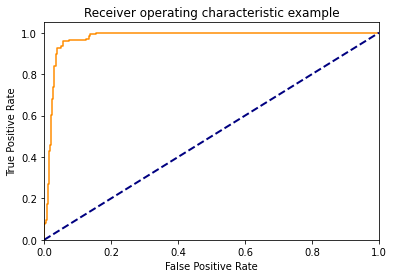


fpr : [0.         0.         0.         0.00215054 0.00215054 0.00430108
 0.00430108 0.00645161 0.00645161 0.00860215 0.00860215 0.01075269
 0.01075269 0.01290323 0.01290323 0.01505376 0.01505376 0.0172043
 0.0172043  0.01935484 0.01935484 0.02150538 0.02150538 0.02365591
 0.02365591 0.02580645 0.02580645 0.02795699 0.02795699 0.03010753
 0.03010753 0.0344086  0.0344086  0.03655914 0.03655914 0.03870968
 0.03870968 0.04946237 0.04946237 0.0516129  0.0516129  0.05591398
 0.05591398 0.07526882 0.07526882 0.12473118 0.12473118 0.13333333
 0.13333333 0.13548387 0.13548387 0.15483871 0.15483871 0.23225806
 0.23655914 0.25806452 0.26236559 0.36989247 0.37419355 0.5827957
 0.58709677 0.6        0.60430108 0.63655914 0.64086022 0.69892473
 0.70322581 0.71827957 0.72258065 0.73333333 0.73763441 0.8688172
 0.87311828 0.94193548 0.94623656 1.        ]

tpr : [0.         0.00574713 0.07471264 0.07471264 0.08045977 0.08045977
 0.0862069  0.0862069  0.09770115 0.09770115 0.17241379 0.17241379
 0.27

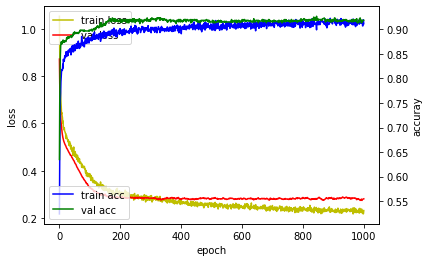

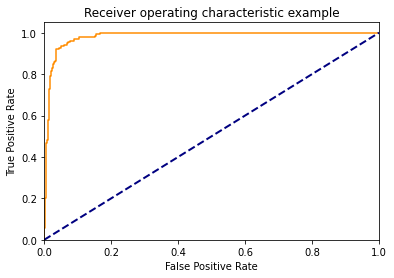


fpr : [0.         0.         0.         0.00215054 0.00215054 0.00430108
 0.00430108 0.00645161 0.00645161 0.00860215 0.00860215 0.01075269
 0.01075269 0.01290323 0.01290323 0.01505376 0.01505376 0.0172043
 0.0172043  0.01935484 0.01935484 0.02365591 0.02365591 0.02580645
 0.02580645 0.02795699 0.02795699 0.03225806 0.03225806 0.0344086
 0.0344086  0.03655914 0.03655914 0.04516129 0.04516129 0.04946237
 0.04946237 0.0516129  0.0516129  0.05806452 0.05806452 0.06666667
 0.06666667 0.07096774 0.07096774 0.07741935 0.07741935 0.08817204
 0.08817204 0.10537634 0.10537634 0.15268817 0.15268817 0.15483871
 0.15483871 0.16774194 0.16774194 0.21075269 0.21505376 0.33978495
 0.34408602 0.37204301 0.37634409 0.4        0.40430108 0.50752688
 0.51182796 0.64731183 0.6516129  0.70107527 0.70537634 0.71612903
 0.72043011 0.72473118 0.72903226 0.90537634 0.90967742 0.91612903
 0.92043011 1.        ]

tpr : [0.         0.00574713 0.05747126 0.05747126 0.20114943 0.20114943
 0.42528736 0.42528736 0.4

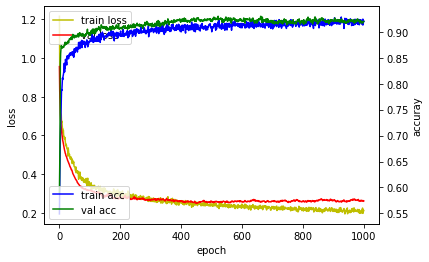

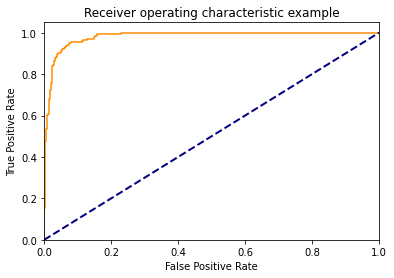


fpr : [0.         0.         0.         0.00215054 0.00215054 0.00430108
 0.00430108 0.00645161 0.00645161 0.00860215 0.00860215 0.01075269
 0.01075269 0.01290323 0.01290323 0.01505376 0.01505376 0.0172043
 0.0172043  0.01935484 0.01935484 0.02365591 0.02365591 0.02580645
 0.02580645 0.02795699 0.02795699 0.03010753 0.03010753 0.03225806
 0.03225806 0.03655914 0.03655914 0.03870968 0.03870968 0.04086022
 0.04086022 0.04946237 0.04946237 0.05376344 0.05376344 0.05806452
 0.05806452 0.06236559 0.06236559 0.06451613 0.06451613 0.06666667
 0.06666667 0.07311828 0.07311828 0.07956989 0.07956989 0.11397849
 0.11397849 0.11612903 0.11612903 0.12688172 0.12688172 0.1483871
 0.1483871  0.15053763 0.15053763 0.15698925 0.15698925 0.21935484
 0.22365591 0.23010753 0.23010753 0.34193548 0.34623656 0.47741935
 0.48172043 0.52043011 0.52473118 0.53333333 0.53763441 0.65591398
 0.66021505 0.73978495 0.74408602 0.75698925 0.76129032 0.85376344
 0.85806452 0.89032258 0.89462366 1.        ]

tpr : [0. 

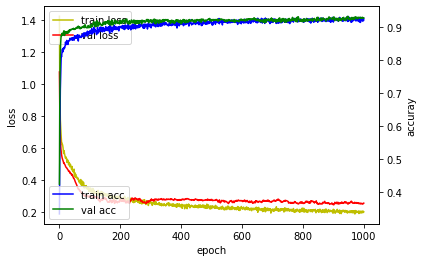

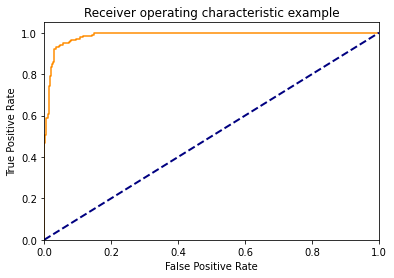


fpr : [0.         0.         0.         0.00215054 0.00215054 0.00430108
 0.00430108 0.01075269 0.01075269 0.01290323 0.01290323 0.01505376
 0.01505376 0.0172043  0.0172043  0.01935484 0.01935484 0.02150538
 0.02150538 0.02365591 0.02365591 0.02580645 0.02580645 0.02795699
 0.02795699 0.03010753 0.03010753 0.0344086  0.0344086  0.04301075
 0.04301075 0.04731183 0.04731183 0.05591398 0.05591398 0.07311828
 0.07311828 0.07741935 0.07741935 0.07956989 0.07956989 0.09462366
 0.09462366 0.10752688 0.10752688 0.11612903 0.11612903 0.14193548
 0.14193548 0.1483871  0.1483871  0.19784946 0.20215054 0.38924731
 0.39354839 0.42150538 0.42580645 0.49462366 0.49892473 0.52258065
 0.52688172 0.56344086 0.56774194 0.72473118 0.72903226 0.76344086
 0.76774194 0.77849462 0.7827957  0.8516129  0.85591398 1.        ]

tpr : [0.         0.00574713 0.46551724 0.46551724 0.50574713 0.50574713
 0.5862069  0.5862069  0.6091954  0.6091954  0.67816092 0.67816092
 0.74137931 0.74137931 0.79310345 0.79310345 0.

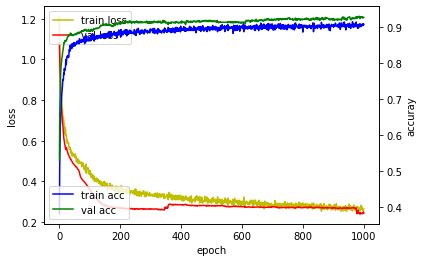

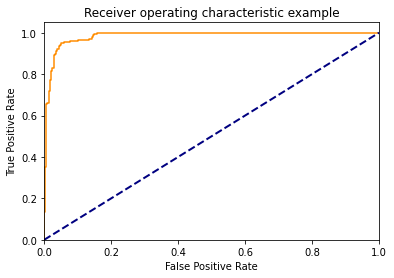


fpr : [0.         0.         0.         0.00215054 0.00215054 0.00430108
 0.00430108 0.00645161 0.00645161 0.00860215 0.00860215 0.01290323
 0.01290323 0.01505376 0.01505376 0.0172043  0.0172043  0.01935484
 0.01935484 0.02150538 0.02150538 0.02365591 0.02365591 0.02795699
 0.02795699 0.03010753 0.03010753 0.03225806 0.03225806 0.0344086
 0.0344086  0.03870968 0.03870968 0.04301075 0.04301075 0.04516129
 0.04516129 0.04731183 0.04731183 0.04946237 0.04946237 0.06021505
 0.06021505 0.07741935 0.07741935 0.10107527 0.10107527 0.13333333
 0.13333333 0.14193548 0.14193548 0.14623656 0.14623656 0.1483871
 0.1483871  0.15913978 0.15913978 0.22795699 0.23225806 0.25376344
 0.25806452 0.28817204 0.29247312 0.33333333 0.33763441 0.38709677
 0.39139785 0.69247312 0.69677419 0.7483871  0.75268817 0.77634409
 0.78064516 0.8516129  0.85591398 0.98064516 0.98494624 0.98924731
 0.99354839 1.        ]

tpr : [0.         0.00574713 0.13218391 0.13218391 0.35057471 0.35057471
 0.45402299 0.45402299 0.6

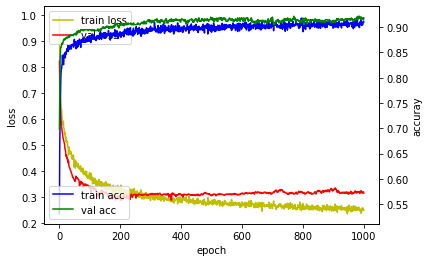

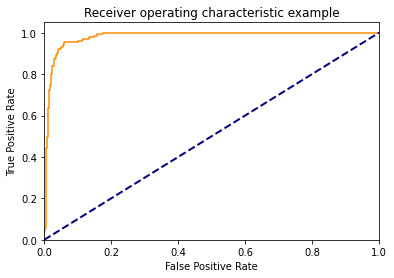


fpr : [0.         0.         0.         0.00215054 0.00215054 0.00430108
 0.00430108 0.00645161 0.00645161 0.00860215 0.00860215 0.01075269
 0.01075269 0.01290323 0.01290323 0.01505376 0.01505376 0.0172043
 0.0172043  0.01935484 0.01935484 0.02365591 0.02365591 0.02795699
 0.02795699 0.03010753 0.03010753 0.03225806 0.03225806 0.03655914
 0.03655914 0.03870968 0.03870968 0.04086022 0.04086022 0.04946237
 0.04946237 0.0516129  0.0516129  0.05591398 0.05591398 0.06021505
 0.06021505 0.10107527 0.10107527 0.11182796 0.11182796 0.11612903
 0.11612903 0.13333333 0.13333333 0.1483871  0.1483871  0.15913978
 0.15913978 0.17419355 0.17419355 0.25591398 0.26021505 0.2688172
 0.27311828 0.40860215 0.41290323 0.47956989 0.48387097 0.60215054
 0.60645161 0.64301075 0.64731183 0.6516129  0.65591398 0.76989247
 0.77419355 0.80645161 0.81075269 0.85376344 0.85806452 1.        ]

tpr : [0.         0.00574713 0.04022989 0.04022989 0.05747126 0.05747126
 0.27586207 0.27586207 0.44252874 0.44252874 0.49

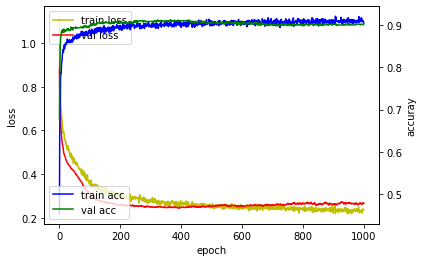

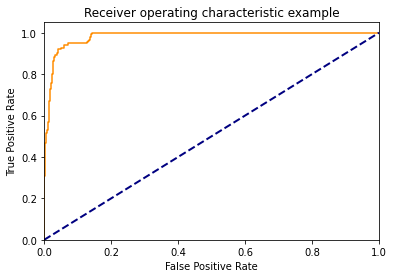


fpr : [0.         0.         0.         0.00215054 0.00215054 0.00430108
 0.00430108 0.00645161 0.00645161 0.00860215 0.00860215 0.01075269
 0.01075269 0.01290323 0.01290323 0.01505376 0.01505376 0.0172043
 0.0172043  0.01935484 0.01935484 0.02150538 0.02150538 0.02365591
 0.02365591 0.02580645 0.02580645 0.02795699 0.02795699 0.03010753
 0.03010753 0.03225806 0.03225806 0.03870968 0.03870968 0.04086022
 0.04086022 0.0516129  0.0516129  0.06021505 0.06021505 0.07096774
 0.07096774 0.12903226 0.12903226 0.1311828  0.1311828  0.13333333
 0.13333333 0.13763441 0.13763441 0.13978495 0.13978495 0.14408602
 0.14408602 0.22795699 0.23225806 0.27526882 0.27956989 0.48602151
 0.49032258 0.56344086 0.56774194 0.60430108 0.60860215 0.61290323
 0.6172043  0.71397849 0.71827957 0.7311828  0.73548387 0.82150538
 0.82580645 0.88602151 0.89032258 1.        ]

tpr : [0.         0.00574713 0.31034483 0.31034483 0.46551724 0.46551724
 0.50574713 0.50574713 0.51724138 0.51724138 0.52873563 0.52873563
 0.

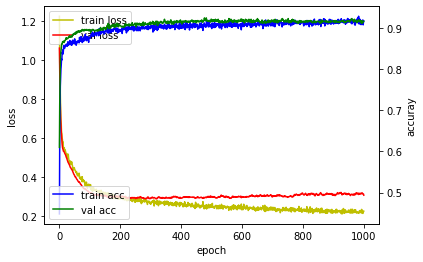

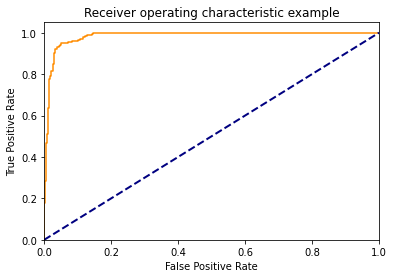


fpr : [0.         0.         0.         0.00215054 0.00215054 0.00430108
 0.00430108 0.00645161 0.00645161 0.00860215 0.00860215 0.01075269
 0.01075269 0.01290323 0.01290323 0.01505376 0.01505376 0.0172043
 0.0172043  0.02150538 0.02150538 0.02580645 0.02580645 0.02795699
 0.02795699 0.03010753 0.03010753 0.03225806 0.03225806 0.03870968
 0.03870968 0.04301075 0.04301075 0.04731183 0.04731183 0.0516129
 0.0516129  0.07096774 0.07096774 0.08387097 0.08387097 0.10107527
 0.10107527 0.10752688 0.10752688 0.11612903 0.11612903 0.12258065
 0.12258065 0.12903226 0.12903226 0.14193548 0.14193548 0.14623656
 0.14623656 0.21075269 0.21505376 0.34623656 0.35053763 0.40430108
 0.40860215 0.58064516 0.58494624 0.6172043  0.62150538 0.69892473
 0.70322581 0.70967742 0.71397849 0.71827957 0.72258065 0.80430108
 0.80860215 0.93333333 0.93763441 1.        ]

tpr : [0.         0.00574713 0.17816092 0.17816092 0.2816092  0.2816092
 0.37356322 0.37356322 0.46551724 0.46551724 0.51149425 0.51149425
 0.63

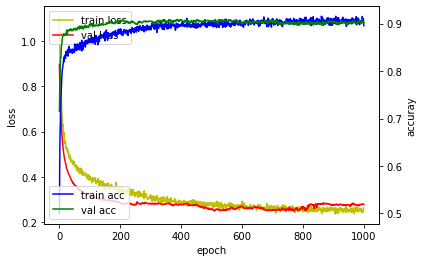

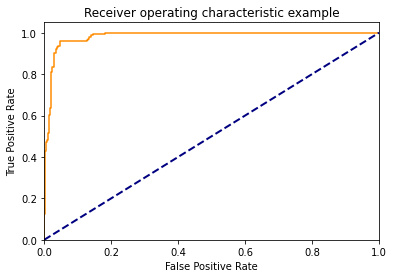


fpr : [0.         0.         0.         0.00215054 0.00215054 0.00430108
 0.00430108 0.00645161 0.00645161 0.00860215 0.00860215 0.01075269
 0.01075269 0.01290323 0.01290323 0.01505376 0.01505376 0.0172043
 0.0172043  0.01935484 0.01935484 0.02150538 0.02150538 0.02365591
 0.02365591 0.02795699 0.02795699 0.03010753 0.03010753 0.0344086
 0.0344086  0.03870968 0.03870968 0.04086022 0.04086022 0.04731183
 0.04731183 0.12688172 0.12688172 0.1311828  0.1311828  0.13333333
 0.13333333 0.13978495 0.13978495 0.14623656 0.14623656 0.18064516
 0.18064516 0.19784946 0.20215054 0.25806452 0.26236559 0.43010753
 0.4344086  0.49032258 0.49462366 0.57634409 0.58064516 0.61290323
 0.6172043  0.63870968 0.64301075 0.67096774 0.67526882 0.71182796
 0.71612903 0.77419355 0.77849462 1.        ]

tpr : [0.         0.00574713 0.12643678 0.12643678 0.43103448 0.43103448
 0.44252874 0.44252874 0.47126437 0.47126437 0.48275862 0.48275862
 0.51724138 0.51724138 0.59195402 0.59195402 0.60344828 0.60344828
 0.6

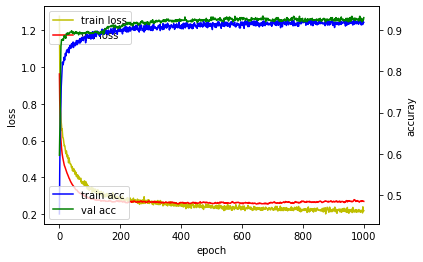

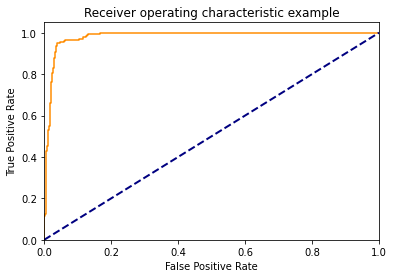


fpr : [0.         0.         0.         0.00215054 0.00215054 0.00430108
 0.00430108 0.00645161 0.00645161 0.00860215 0.00860215 0.01075269
 0.01075269 0.01290323 0.01290323 0.01505376 0.01505376 0.0172043
 0.0172043  0.01935484 0.01935484 0.02150538 0.02150538 0.02365591
 0.02365591 0.02580645 0.02580645 0.02795699 0.02795699 0.03010753
 0.03010753 0.03225806 0.03225806 0.03655914 0.03655914 0.03870968
 0.03870968 0.04731183 0.04731183 0.05806452 0.05806452 0.06236559
 0.06236559 0.10537634 0.10537634 0.11612903 0.11612903 0.12473118
 0.12473118 0.12903226 0.12903226 0.1311828  0.1311828  0.1655914
 0.1655914  0.20215054 0.20645161 0.30967742 0.31397849 0.43870968
 0.44301075 0.44946237 0.45376344 0.55698925 0.56129032 0.57419355
 0.57849462 0.62580645 0.63010753 0.73333333 0.73763441 0.80860215
 0.81290323 0.8516129  0.85591398 0.97849462 0.9827957  1.        ]

tpr : [0.         0.00574713 0.11494253 0.11494253 0.12643678 0.12643678
 0.32758621 0.32758621 0.43103448 0.43103448 0.45

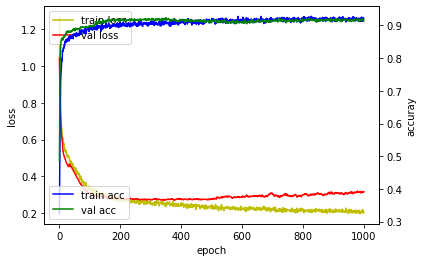

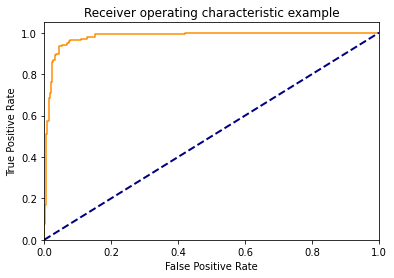


fpr : [0.         0.         0.         0.00215054 0.00215054 0.00430108
 0.00430108 0.00645161 0.00645161 0.00860215 0.00860215 0.01290323
 0.01290323 0.0172043  0.0172043  0.01935484 0.01935484 0.02150538
 0.02150538 0.02365591 0.02365591 0.02580645 0.02580645 0.03225806
 0.03225806 0.0344086  0.0344086  0.04301075 0.04301075 0.04516129
 0.04516129 0.05376344 0.05376344 0.0688172  0.0688172  0.07311828
 0.07311828 0.07526882 0.07526882 0.07741935 0.07741935 0.10967742
 0.10967742 0.12903226 0.12903226 0.15268817 0.15268817 0.21505376
 0.21935484 0.22150538 0.22580645 0.37419355 0.37849462 0.4
 0.40430108 0.41935484 0.41935484 0.49677419 0.50107527 0.57634409
 0.58064516 0.61935484 0.62365591 0.77419355 0.77849462 0.78494624
 0.78924731 0.83870968 0.84301075 1.        ]

tpr : [0.         0.00574713 0.07471264 0.07471264 0.16666667 0.16666667
 0.49425287 0.49425287 0.51149425 0.51149425 0.57471264 0.57471264
 0.68390805 0.68390805 0.70689655 0.70689655 0.7183908  0.7183908
 0.7643678

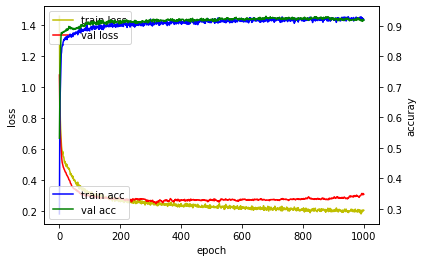

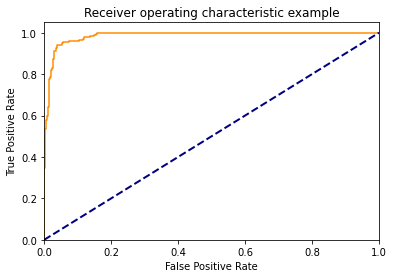


fpr : [0.         0.         0.         0.00215054 0.00215054 0.00645161
 0.00645161 0.00860215 0.00860215 0.01075269 0.01075269 0.01290323
 0.01290323 0.01505376 0.01505376 0.0172043  0.0172043  0.01935484
 0.01935484 0.02150538 0.02150538 0.02365591 0.02365591 0.02580645
 0.02580645 0.03010753 0.03010753 0.0344086  0.0344086  0.03870968
 0.03870968 0.05376344 0.05376344 0.05591398 0.05591398 0.07311828
 0.07311828 0.10322581 0.10322581 0.11612903 0.11612903 0.11827957
 0.11827957 0.13763441 0.13763441 0.1483871  0.1483871  0.15483871
 0.15483871 0.15698925 0.15698925 0.19784946 0.20215054 0.31182796
 0.31612903 0.36344086 0.36774194 0.46666667 0.47096774 0.50322581
 0.50752688 0.64301075 0.64731183 0.7311828  0.73548387 0.7483871
 0.75268817 0.85591398 0.86021505 1.        ]

tpr : [0.         0.00574713 0.34482759 0.34482759 0.53448276 0.53448276
 0.58045977 0.58045977 0.59770115 0.59770115 0.64367816 0.64367816
 0.74137931 0.74137931 0.77586207 0.77586207 0.78735632 0.78735632
 0.

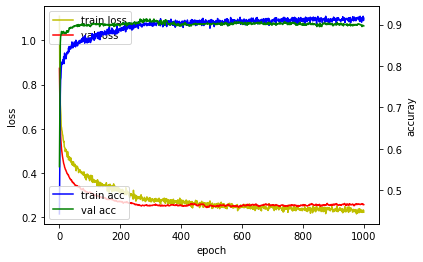

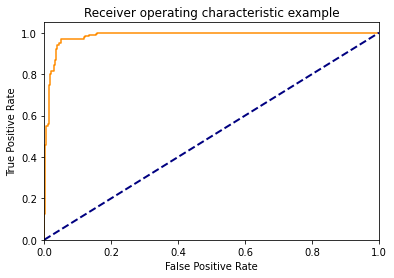


fpr : [0.         0.         0.         0.00215054 0.00215054 0.00430108
 0.00430108 0.00645161 0.00645161 0.01075269 0.01075269 0.01290323
 0.01290323 0.01505376 0.01505376 0.0172043  0.0172043  0.01935484
 0.01935484 0.02795699 0.02795699 0.03010753 0.03010753 0.03225806
 0.03225806 0.0344086  0.0344086  0.03655914 0.03655914 0.03870968
 0.03870968 0.04301075 0.04301075 0.04946237 0.04946237 0.0516129
 0.0516129  0.11827957 0.11827957 0.12258065 0.12258065 0.13333333
 0.13333333 0.15483871 0.15483871 0.15698925 0.15698925 0.18494624
 0.18924731 0.42150538 0.42580645 0.46021505 0.46451613 0.48387097
 0.48817204 0.51612903 0.52043011 0.54193548 0.54623656 0.55053763
 0.55483871 0.73333333 0.73763441 0.79354839 0.79784946 1.        ]

tpr : [0.         0.00574713 0.12643678 0.12643678 0.45977011 0.45977011
 0.47126437 0.47126437 0.55172414 0.55172414 0.55747126 0.55747126
 0.58045977 0.58045977 0.74712644 0.74712644 0.79885057 0.79885057
 0.81609195 0.81609195 0.83908046 0.83908046 0.8

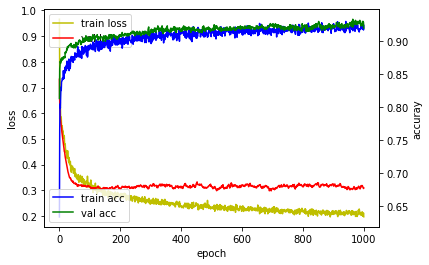

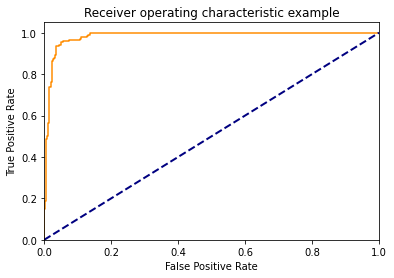


fpr : [0.         0.         0.         0.00215054 0.00215054 0.00430108
 0.00430108 0.00645161 0.00645161 0.00860215 0.00860215 0.01075269
 0.01075269 0.01290323 0.01290323 0.01505376 0.01505376 0.01935484
 0.01935484 0.02150538 0.02150538 0.02365591 0.02365591 0.02580645
 0.02580645 0.02795699 0.02795699 0.03225806 0.03225806 0.0344086
 0.0344086  0.03655914 0.03655914 0.04301075 0.04301075 0.04946237
 0.04946237 0.05591398 0.05591398 0.07526882 0.07526882 0.10752688
 0.10752688 0.10967742 0.10967742 0.12903226 0.12903226 0.1311828
 0.1311828  0.13548387 0.13548387 0.13763441 0.13763441 0.22150538
 0.22580645 0.4        0.40430108 0.44301075 0.44731183 0.47311828
 0.47741935 0.58494624 0.58924731 0.6        0.60430108 0.69892473
 0.70322581 0.76129032 0.7655914  0.80645161 0.81505376 0.82365591
 0.82795699 1.        ]

tpr : [0.         0.00574713 0.14942529 0.14942529 0.18965517 0.18965517
 0.29885057 0.29885057 0.48850575 0.48850575 0.5        0.5
 0.56321839 0.56321839 0.72988506

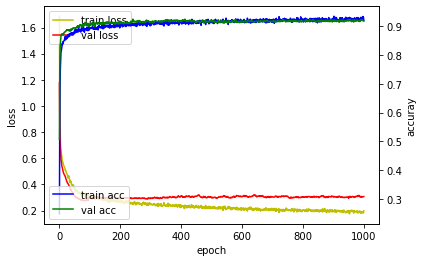

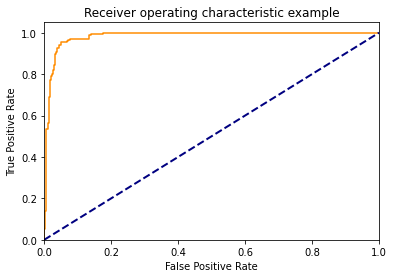


fpr : [0.         0.         0.         0.00215054 0.00215054 0.00430108
 0.00430108 0.00645161 0.00645161 0.01075269 0.01075269 0.01290323
 0.01290323 0.01505376 0.01505376 0.0172043  0.0172043  0.01935484
 0.01935484 0.02150538 0.02150538 0.02365591 0.02365591 0.02580645
 0.02580645 0.02795699 0.02795699 0.03010753 0.03010753 0.03225806
 0.03225806 0.03655914 0.03655914 0.03870968 0.03870968 0.04301075
 0.04301075 0.04516129 0.04516129 0.04946237 0.04946237 0.06666667
 0.06666667 0.07096774 0.07096774 0.07741935 0.07741935 0.13333333
 0.13333333 0.13978495 0.13978495 0.17419355 0.17419355 0.19354839
 0.19784946 0.31827957 0.32258065 0.49032258 0.49462366 0.55698925
 0.56129032 0.56344086 0.56774194 0.66236559 0.66666667 0.77419355
 0.77849462 0.81935484 0.82365591 0.86021505 0.86451613 0.90322581
 0.90752688 1.        ]

tpr : [0.         0.00574713 0.05172414 0.05172414 0.13793103 0.13793103
 0.52298851 0.52298851 0.53448276 0.53448276 0.56321839 0.56321839
 0.62643678 0.62643678 0

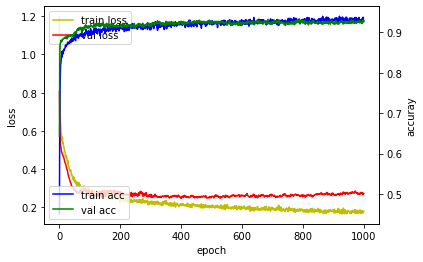

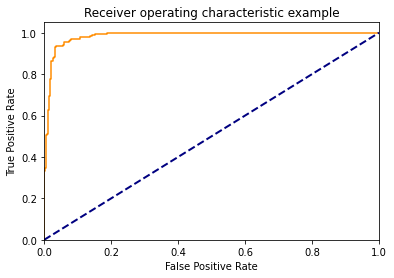


fpr : [0.         0.         0.         0.00215054 0.00215054 0.00430108
 0.00430108 0.00645161 0.00645161 0.00860215 0.00860215 0.01075269
 0.01075269 0.01290323 0.01290323 0.01505376 0.01505376 0.0172043
 0.0172043  0.01935484 0.01935484 0.02150538 0.02150538 0.02580645
 0.02580645 0.03010753 0.03010753 0.03225806 0.03225806 0.03655914
 0.03655914 0.05591398 0.05591398 0.05806452 0.05806452 0.07526882
 0.07526882 0.07741935 0.07741935 0.07956989 0.07956989 0.10752688
 0.10752688 0.13763441 0.13763441 0.14408602 0.14408602 0.15268817
 0.15268817 0.18709677 0.18709677 0.19139785 0.19569892 0.39569892
 0.4        0.41075269 0.41505376 0.41935484 0.42365591 0.45591398
 0.46021505 0.47956989 0.48387097 0.49032258 0.49462366 0.49892473
 0.50322581 0.67311828 0.67741935 0.72043011 0.72473118 0.79139785
 0.79569892 0.83225806 0.83655914 1.        ]

tpr : [0.         0.00574713 0.33333333 0.33333333 0.34482759 0.34482759
 0.45402299 0.45402299 0.50574713 0.50574713 0.51149425 0.51149425
 0.

In [41]:
import numpy as np

num_epochs = 1000


actiFunc = ['relu', 'sigmoid', 'elu', 'selu']
lossFunc = ['categorical_crossentropy']
hidden = [3]
node = [
    [16, 8, 4], [16, 8, 8], [16, 8, 16], [16, 8, 32], [16, 16, 4], [16, 16, 8], [16, 16, 16], [16, 16, 32], [16, 32, 4], [16, 32, 8], [16, 32, 16], [16, 32, 32],
    [32, 8, 4], [32, 8, 8], [32, 8, 16], [32, 8, 32], [32, 16, 4], [32, 16, 8], [32, 16, 16], [32, 16, 32], [32, 32, 4], [32, 32, 8], [32, 32, 16], [32, 32, 32]
]
batchSize = [512]
dropout = [0.1]

all_acc_histories = []
all_loss_histories = []

for i in range(len(actiFunc)):
    for j in range(len(lossFunc)):
        for k in range(len(hidden)):
            for l in range(len(node)):
                for m in range(len(batchSize)):
                    for n in range(len(dropout)):
                        print('Activation:', actiFunc[i] , '  Loss:', lossFunc[j] , '  HiddenLayer:', hidden[k] , '  Node:[', node[l][0], ',', node[l][1] , ',', node[l][2], ']  BatchSize:', batchSize[m], '  Dropout:', dropout[n])
    
                        model = build_model(actiFunc[i], lossFunc[j], hidden[k], node[l], dropout[n])
                        model.summary()
                        history = model.fit(train_data, train_label, validation_data=(val_data, val_label), epochs=num_epochs, batch_size=batchSize[m], verbose=False)
    
                        acc_history = history.history['val_acc']
                        all_acc_histories.append(acc_history)
                        loss_history = history.history['val_loss']
                        all_loss_histories.append(loss_history)
    
                        print('loss min :', min(loss_history), '  acc max:', max(acc_history))
                        print('loss mean :', np.mean(loss_history), '  acc mean:', np.mean(acc_history))
            
                        fig, loss_ax = plt.subplots()
                        acc_ax = loss_ax.twinx()

                        loss_ax.plot(history.history['loss'], 'y', label='train loss')
                        loss_ax.plot(history.history['val_loss'], 'r', label='val loss')

                        acc_ax.plot(history.history['acc'], 'b', label='train acc')
                        acc_ax.plot(history.history['val_acc'], 'g', label='val acc')

                        loss_ax.set_xlabel('epoch')
                        loss_ax.set_ylabel('loss')
                        acc_ax.set_ylabel('accuray')

                        loss_ax.legend(loc='upper left')
                        acc_ax.legend(loc='lower left')

                        plt.show()
                        
                        
                        y_val_cat_prob = model.predict_proba(test_data)
                        
                        temp_test_data = []
                        temp_test_label = []
                        
                        for x in range(0, len(y_val_cat_prob)):
                            if(np.argmax(y_val_cat_prob[x]) == 2):
                                temp_test_data.append(max(y_val_cat_prob[x]))
                            else:
                                temp_test_data.append(1 - (max(y_val_cat_prob[x])))
        
                            if(testLabel[x] == 2):
                                temp_test_label.append(1)
                            else:
                                temp_test_label.append(0)
                                
                                
                        fpr, tpr, thresholds = roc_curve(temp_test_label, temp_test_data)
                        
                        
                        plt.figure()
                        lw = 2
                        plt.plot(fpr, tpr, color='darkorange')
                        plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

                        plt.xlim([0.0, 1.0])
                        plt.ylim([0.0, 1.05])

                        plt.xlabel('False Positive Rate')
                        plt.ylabel('True Positive Rate')
                        plt.title('Receiver operating characteristic example')
                        plt.show()
                        
                        print()
                        print('fpr :', fpr)
                        print()
                        print('tpr :', tpr)
                        print()
                        
                        test_loss, test_acc = model.evaluate(test_data,  test_label, verbose=1)
                        print()
                        print('test_acc : ', test_acc)
                        print()
                        
                        pred_data = model.predict(test_data)
                        
                        #print()
                        #print('pred_data : ', pred_data)
                        #print()
                        
                        temp_test_data = []
                        temp_test_label = []
                        
                        for x in range(0, len(pred_data)):
                            if(np.argmax(pred_data[x]) == 2):
                                temp_test_data.append(1)
                            else:
                                temp_test_data.append(0)
        
                            if(testLabel[x] == 2):
                                temp_test_label.append(1)
                            else:
                                temp_test_label.append(0)
                        
                        PP = 0
                        PF = 0
                        FP = 0
                        FF = 0
                        
                        for x in range(0, len(temp_test_data)):
                            if(temp_test_data[x] == 0 and temp_test_label[x] == 0):
                                PP = PP + 1
                            elif(temp_test_data[x] == 0 and temp_test_label[x] == 1):
                                PF = PF + 1
                            elif(temp_test_data[x] == 1 and temp_test_label[x] == 0):
                                FP = FP + 1
                            elif(temp_test_data[x] == 1 and temp_test_label[x] == 1):
                                FF = FF + 1
                        
                        print()
                        print('눈 깜빡임을 눈 깜빡임으로 분류 : ', PP)
                        print('눈 깜빡임을 잡파로 분류 : ', PF)
                        print('잡파를 눈 깜빡임으로 분류 : ', FP)
                        print('잡파를 잡파로 분류 : ', FF)
                        print()
                        
                        print()
                        print()
                        print('=======================================================================================================')
                        print()
                        print()